In [2]:
import rosbag
import numpy as np
import sys
import csi_utils.constants as constants
import csi_utils.transform_utils as transform_utils
import csi_utils.pipeline_utils as pipeline_utils
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.cm import ScalarMappable

In [3]:
# Define variables to store your data
comp = None
apply_nts = True
idx = 0
valid_tx_ant = [0,1,2,3]

In [40]:
def draw_channel_image_4x4(channel_1, channel_2):
    print("afad")
    num_tx_slots = channel_1.shape[2]
    num_rx_slots = channel_1.shape[1]
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    fig, axs = plt.subplots(num_tx_slots*2, num_rx_slots, figsize=(24, 24),
                            gridspec_kw={'height_ratios': [1, 0.7] * num_tx_slots})
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    amplitude_1 = 20*np.log10(np.abs(channel_1))
    amplitude_2 = 20*np.log10(np.abs(channel_2))
    min_amp = min(np.min(amplitude_1), np.min(amplitude_2))
    max_amp = max(np.max(amplitude_1), np.max(amplitude_2))
    phase_1 = np.unwrap(np.angle(channel_1))
    phase_2 = np.unwrap(np.angle(channel_2))
    min_phase = min(np.min(phase_1), np.min(phase_2))
    max_phase = max(np.max(phase_1), np.max(phase_2))
    print(min_phase, max_phase)
    for i in range(0, num_tx_slots*2, 2):
        for j in range(num_rx_slots):
            if i == 0:
                # Place Rx antenna labels at the top
                axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
            if j == 0:
                # Place Tx antenna labels on the left 
                axs[i, j].text(-0.2, 0, f"Tx Ant {i//2}", va='center', ha='center',
                               rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
            # plot magnitude
            axs[i, j].set_xlabel("Subcarrier indices")
            axs[i, j].set_ylabel("Magnitude (dB)")
            axs[i, j].set_ylim(min_amp-10, max_amp+10)
            axs[i, j].plot(20*np.log10(np.abs(channel_1[:, j, i//2])),
                           label="LOS")
            axs[i, j].plot(20*np.log10(np.abs(channel_2[:, j, i//2])),
                           label="NLOS")
            axs[i, j].legend()
            # plot phase
            axs[i+1, j].set_xlabel("Subcarrier indices")
            axs[i+1, j].set_ylabel("Phase (deg)")
            axs[i+1, j].set_ylim(min_phase, max_phase)
            axs[i+1, j].set_yticks(y_tick_positions)
            axs[i+1, j].set_yticklabels(y_tick_labels)
            # don't wrap 
            # axs[i+1, j].plot(np.angle(channel_1[:, j, i//2]),
            #                  label="LOS")
            # axs[i+1, j].plot(np.angle(channel_2[:, j, i//2]),
            #                  label="NLOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_1[:, j, i//2])),
                             label="LOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_2[:, j, i//2])),
                             label="NLOS2")
            axs[i+1, j].legend() 
    fig.set_tight_layout(True)   
    plt.savefig('40 157 los vs nlos.png')
    plt.show()
   



In [41]:
# Load the ROS bag file
bag_1 = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/20 11 los (2).bag')
bag_2 = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/20 11 nlos.bag')

afad
-8.468914777855348 7.0685834705770345


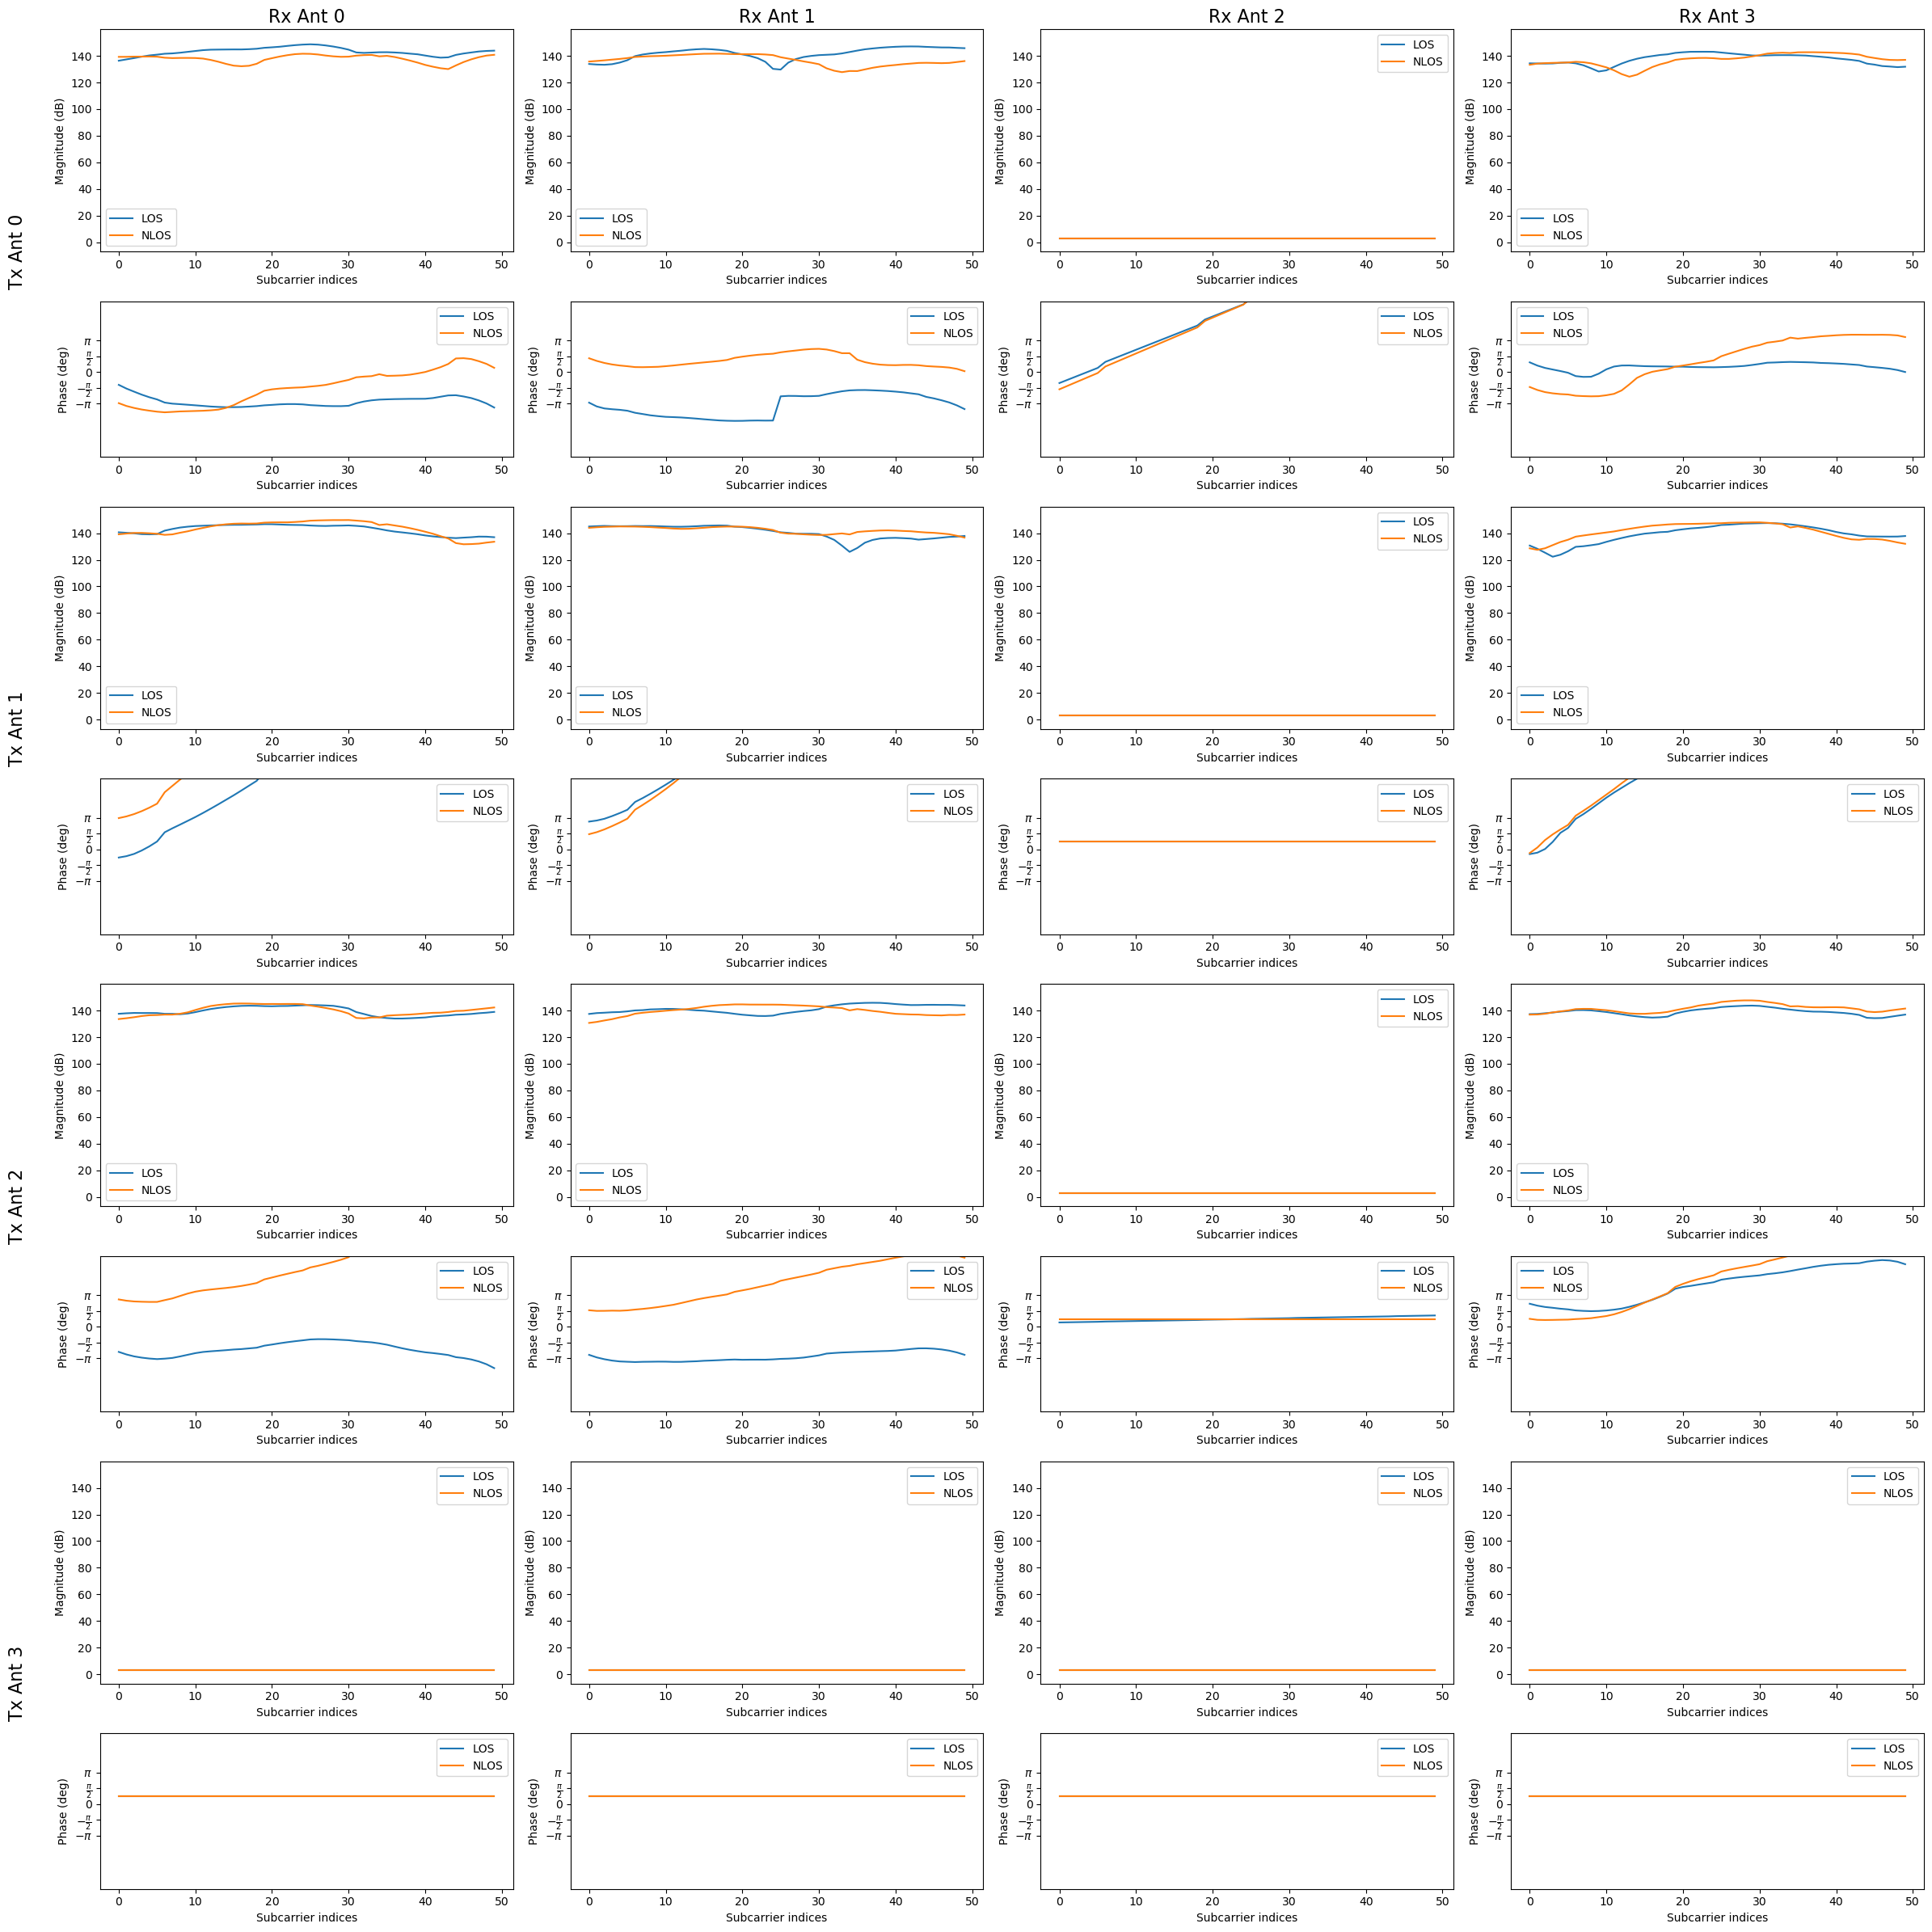

In [42]:
idx = 0
for (topic1, msg1, t1), (topic2, msg2, t2) in zip(bag_1.read_messages('/csi'), bag_2.read_messages('/csi')):
    if idx == 7:
        channel_1 = pipeline_utils.extract_csi(msg1, comp, apply_nts, valid_tx_ant)
        channel_2 = pipeline_utils.extract_csi(msg2, comp, apply_nts, valid_tx_ant)
        draw_channel_image_4x4(channel_1, channel_2)
        break
    idx+=1

3 4
-7.270905098955338 8.38294639555592


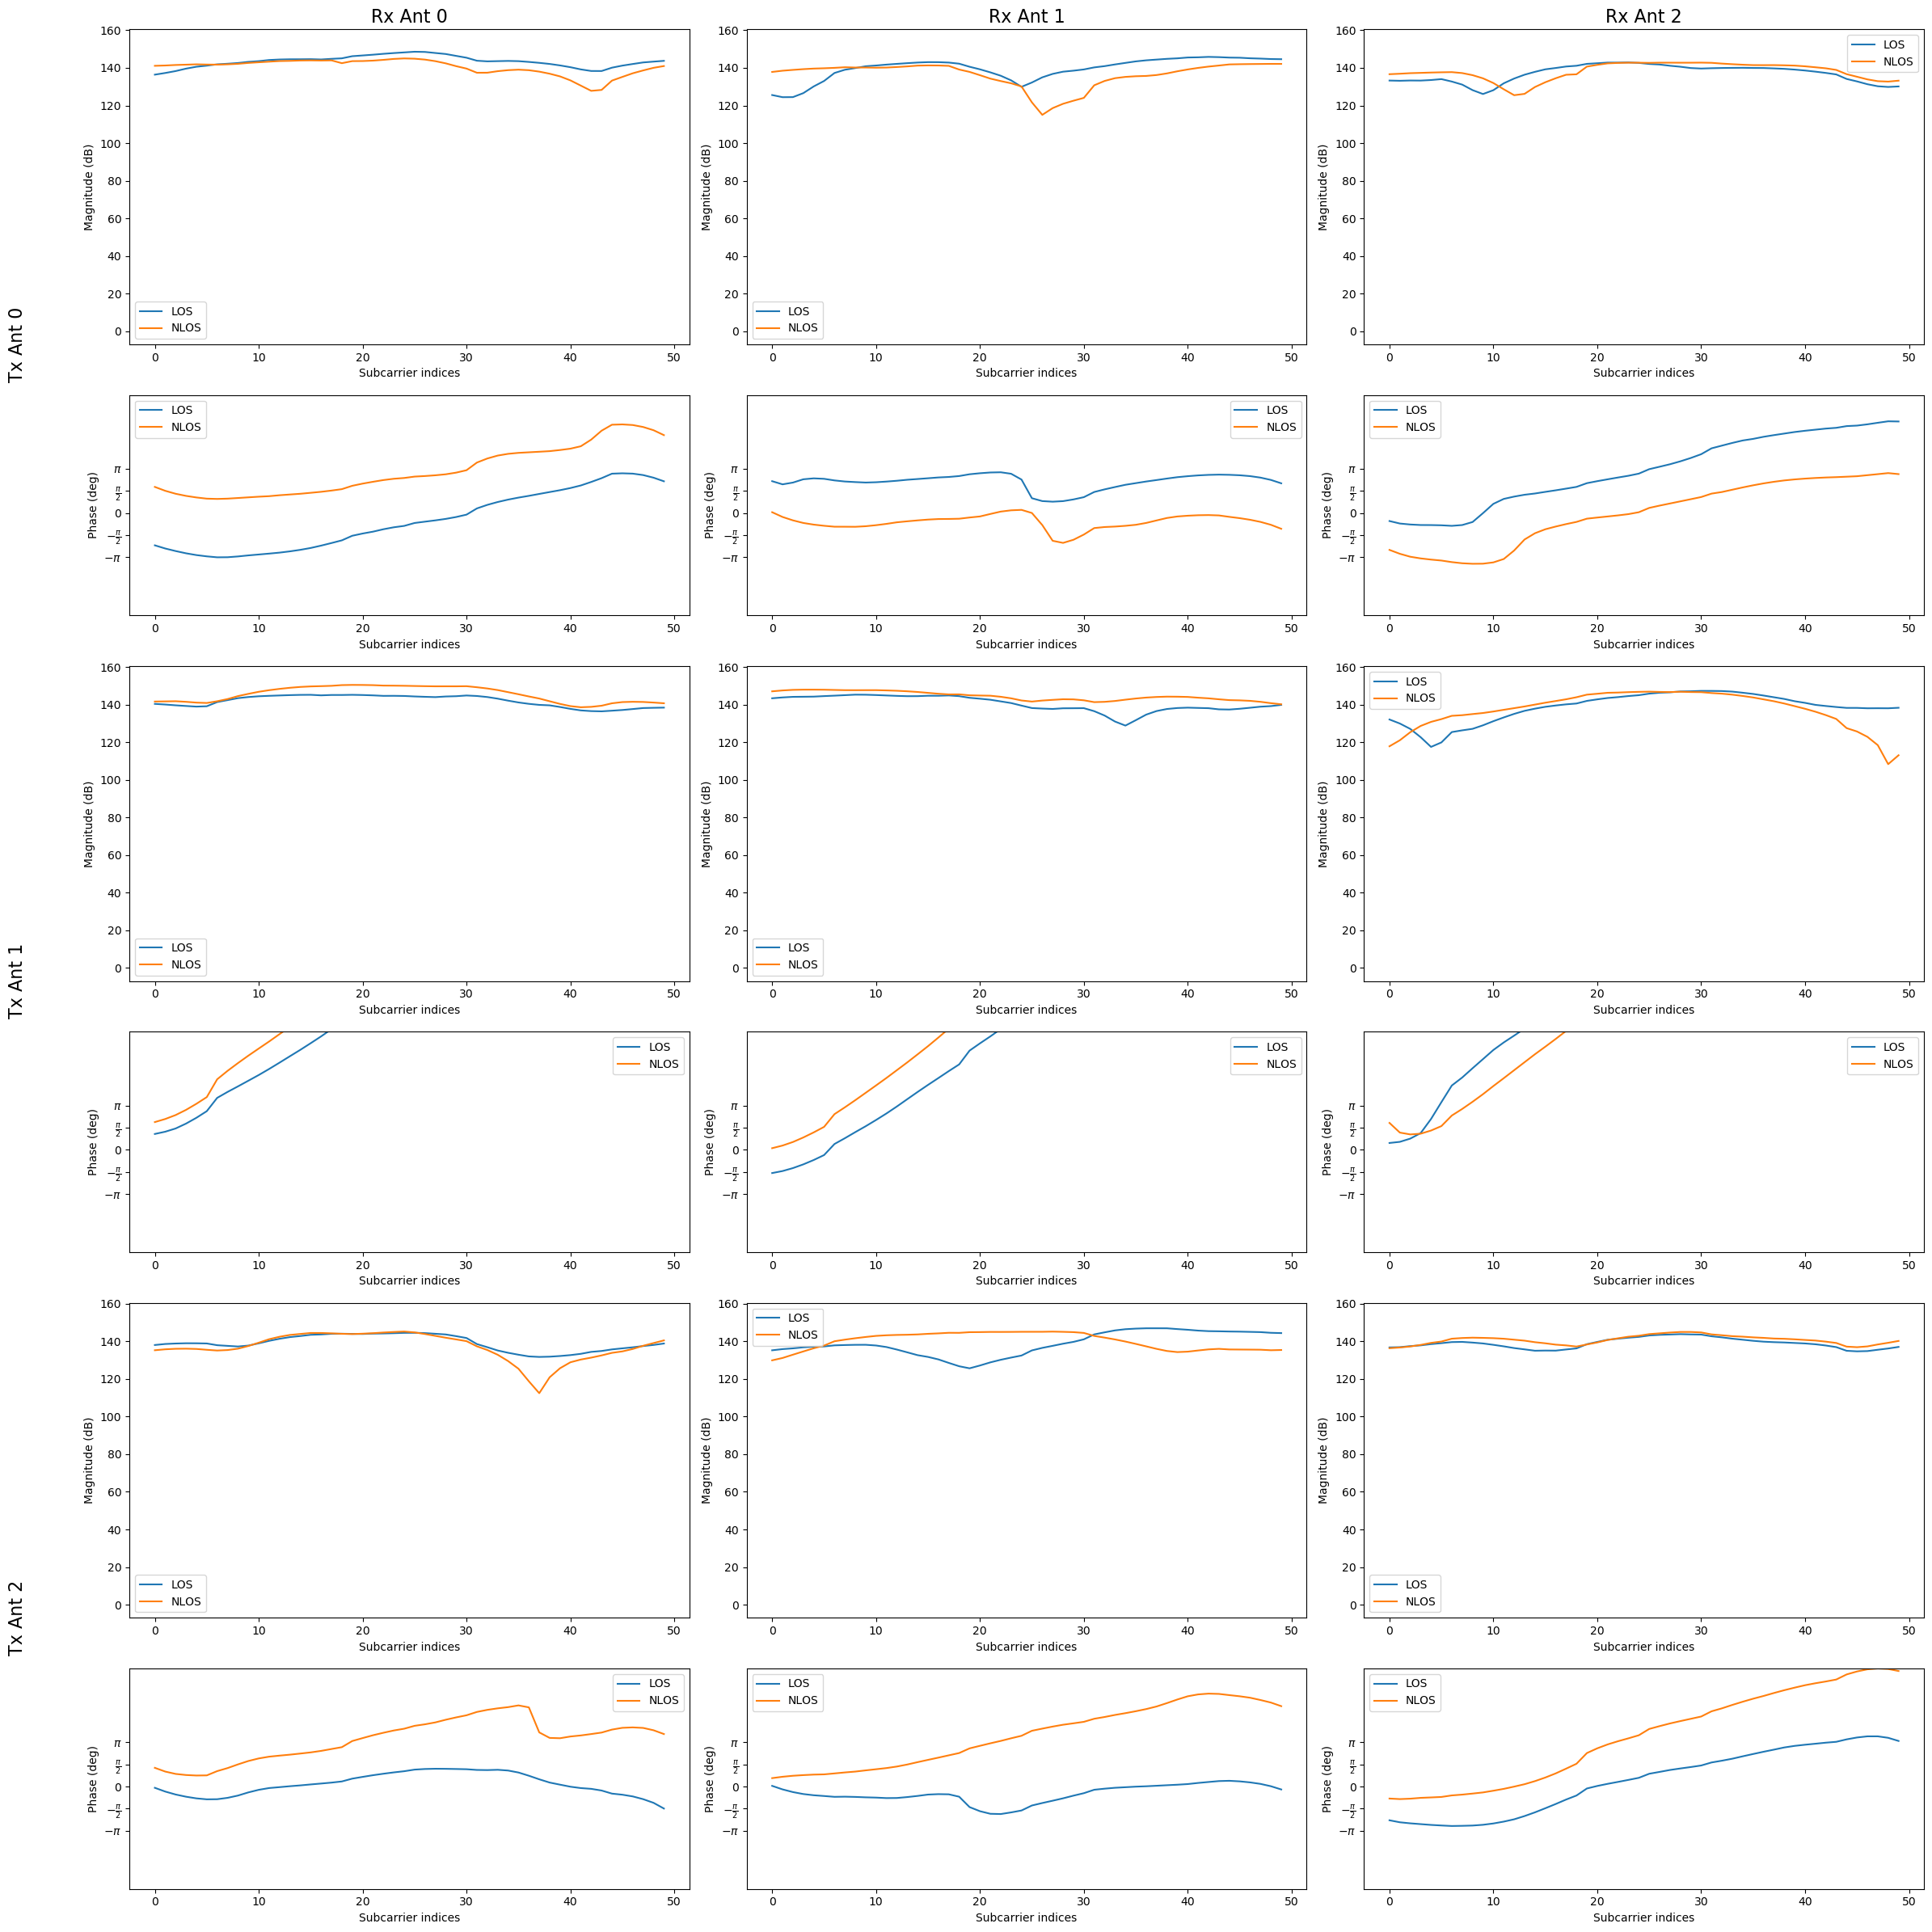

In [52]:
def draw_channel_image_3x3(channel_1, channel_2):
    num_tx_slots = channel_1.shape[2]
    num_rx_slots = channel_1.shape[1]
    print(num_tx_slots, num_rx_slots)
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    fig, axs = plt.subplots(num_tx_slots*2, 3, figsize=(24, 24),
                            gridspec_kw={'height_ratios': [1, 0.7] * num_tx_slots})
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    amplitude_1 = 20*np.log10(np.abs(channel_1))
    amplitude_2 = 20*np.log10(np.abs(channel_2))
    min_amp = min(np.min(amplitude_1), np.min(amplitude_2))
    max_amp = max(np.max(amplitude_1), np.max(amplitude_2))
    phase_1 = np.unwrap(np.angle(channel_1))
    phase_2 = np.unwrap(np.angle(channel_2))
    min_phase = min(np.min(phase_1), np.min(phase_2))
    max_phase = max(np.max(phase_1), np.max(phase_2))
    print(min_phase, max_phase)
    rx = 0
    for i in range(0, num_tx_slots*2, 2):
        for j in range(3):
            rx = j
            if i == 0:
                # Place Rx antenna labels at the top
                axs[i, j].set_title(f"Rx Ant {j}", fontsize=16)
            if j == 0:
                # Place Tx antenna labels on the left 
                axs[i, j].text(-0.2, 0, f"Tx Ant {i//2}", va='center', ha='center',
                               rotation='vertical', transform=axs[i, 0].transAxes, fontsize=16)
            if j == 2: rx+=1
            # plot magnitude
            axs[i, j].set_xlabel("Subcarrier indices")
            axs[i, j].set_ylabel("Magnitude (dB)")
            axs[i, j].set_ylim(min_amp-10, max_amp+10)
            axs[i, j].plot(20*np.log10(np.abs(channel_1[:, rx, i//2])),
                           label="LOS")
            axs[i, j].plot(20*np.log10(np.abs(channel_2[:, rx, i//2])),
                           label="NLOS")
            axs[i, j].legend()
            # plot phase
            axs[i+1, j].set_xlabel("Subcarrier indices")
            axs[i+1, j].set_ylabel("Phase (deg)")
            axs[i+1, j].set_ylim(min_phase, max_phase)
            axs[i+1, j].set_yticks(y_tick_positions)
            axs[i+1, j].set_yticklabels(y_tick_labels)
            # don't wrap 
            # axs[i+1, j].plot(np.angle(channel_1[:, j, i//2]),
            #                  label="LOS")
            # axs[i+1, j].plot(np.angle(channel_2[:, j, i//2]),
            #                  label="NLOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_1[:, rx, i//2])),
                             label="LOS")
            axs[i+1, j].plot(np.unwrap(np.angle(channel_2[:, rx, i//2])),
                             label="NLOS")
            axs[i+1, j].legend() 
    fig.set_tight_layout(True)   
    plt.savefig('20 11 los vs nlos.png')
    plt.show()

# Load the ROS bag file
bag_1 = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/40 11 los.bag')
bag_2 = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/40 11 nlos.bag')

idx = 0
for (topic1, msg1, t1), (topic2, msg2, t2) in zip(bag_1.read_messages('/csi'), bag_2.read_messages('/csi')):
    if idx == 1:
        channel_1 = pipeline_utils.extract_csi(msg1, comp, apply_nts, [0,1,2])
        channel_2 = pipeline_utils.extract_csi(msg2, comp, apply_nts, [0,1,2])
        draw_channel_image_3x3(channel_1, channel_2)
        break
    idx+=1

In [53]:
def heat_map(rosbag):
    channels = []
    idx = 0
    for topic, msg, t in bag.read_messages('/csi'):
        # if idx !=0:break
        idx+=1
        packet = pipeline_utils.extract_csi(msg, None, apply_nts, valid_tx_ant)
        subcarrier_indices = np.shape(packet)[0]
        amplitudes = 20*np.log10(np.abs(packet))
        amplitudes = np.transpose(amplitudes, (1,2,0))
        channel = amplitudes.reshape(np.shape(amplitudes)[0] * np.shape(amplitudes)[1] * np.shape(amplitudes)[2])
        channels.append(channel)
    channels = np.array(channels)
    print(channels.shape)
    num_channels = np.shape(channels)[0]
    y_range = np.shape(channels)[1]
    # print(y_range)
    channels = channels.T
    min_amp = np.min(channels)
    max_amp = np.max(channels)
    print(min_amp, max_amp)
    xgrid = np.arange(num_channels)
    ygrid = np.arange(subcarrier_indices*16)
    fig, ax = plt.subplots()
    # print(xgrid.shape, ygrid.shape, channels.shape)
    ax.pcolormesh(xgrid, ygrid, channels)
    y_tick_labels = list(range(0, subcarrier_indices, 25)) * 16
    y_tick_labels.append(subcarrier_indices)
    y_tick_labels = list(reversed(y_tick_labels))
    y_tick_positions = list(range(0, y_range+10, 25))    
    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels(y_tick_labels)
    ax.tick_params(axis='y', which='major', labelsize=8)
    fig.subplots_adjust(left=0.05, right=0.98, top=0.9, wspace=0.04)
    fig.subplots_adjust(bottom=0.15)
    fig.text(0.5, 0.1, "Packets", ha="center", va="center", fontsize=12)
    fig.text(0.0, 0.5, 'Subcarrier Indices for 16 pairs of antennas', ha="center", va="center", rotation="vertical", fontsize=12)  
    fig.suptitle("Amplitude", fontsize=16, y=0.95)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
    norm = mc.Normalize(min_amp, max_amp)
    cb = fig.colorbar(
        ScalarMappable(norm=norm, cmap="viridis"), 
        cax=cbar_ax, # Pass the new axis
        orientation = "horizontal"
    )
    # Remove tick marks
    cb.ax.xaxis.set_tick_params(size=0)
    
    # Set legend label
    cb.set_label("Count", size=12)
    fig

(43, 800)
98.53099345648982 149.68431427454613


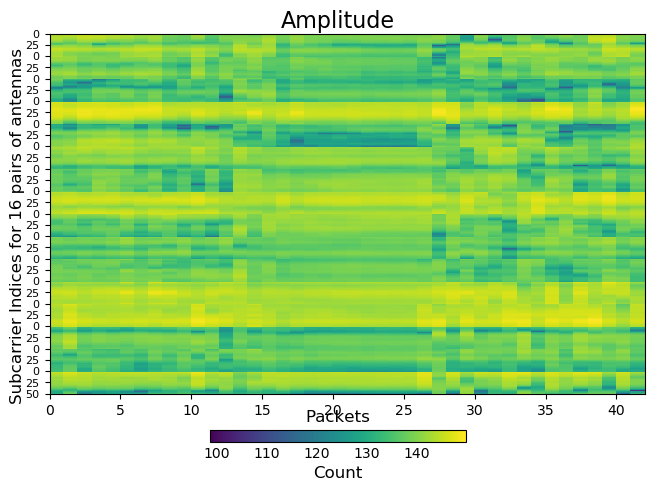

In [58]:
bag = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/20 157 w.bag')
heat_map(bag)

(107, 800)
89.15254622546045 149.51284112097792


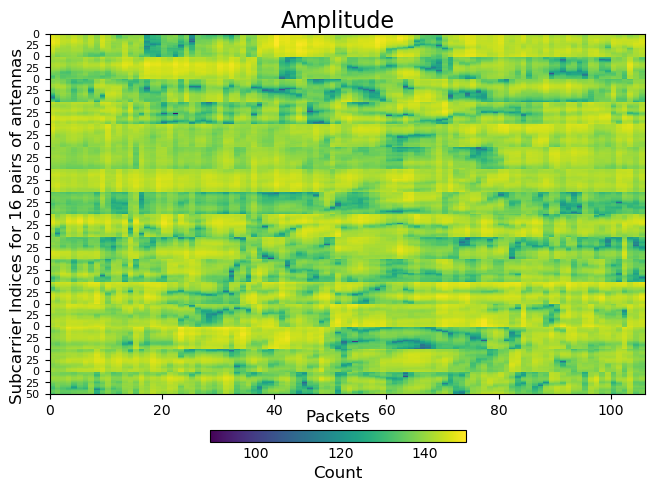

In [55]:
bag = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/20 157 movemetal rx (1).bag')
heat_map(bag)

In [10]:
def draw_channel_image(channel_1):
    num_tx_slots = channel_1.shape[2]
    num_rx_slots = channel_1.shape[1]
    tx_ant_labels = [f"Tx Ant {i}" for i in range(num_tx_slots)]
    rx_ant_labels = [f"Rx Ant {i}" for i in range(num_rx_slots)]
    fig, axs = plt.subplots(2, num_tx_slots, figsize=(24, 24))
    # add tick for phase plot
    y_tick_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    y_tick_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']
    for i in range(num_tx_slots):
        axs[0, i].set_xlabel("Subcarrier indices")
        axs[0, i].set_ylabel("Magnitude (dB)")
        # axs[0, i].set_ylim(100, 160)
        for j in range(num_rx_slots):
            axs[0, i].plot(20*np.log10(np.abs(channel_1[:, j, i])),
                           label="Channel 1")
        axs[0, i].legend()
        # plot phase
        axs[1, i].set_xlabel("Subcarrier indices")
        axs[1, i].set_ylabel("Phase (deg)")
        # axs[1, i].set_ylim(-4, 4)
        axs[1, i].set_yticks(y_tick_positions)
        axs[1, i].set_yticklabels(y_tick_labels)
        for j in range(num_rx_slots):
            axs[1, i].plot(np.unwrap(np.angle(channel_1[:, j, i]))*180/np.pi,
                           label="Channel 1")  
        axs[1, i].legend()
    fig.set_tight_layout(True)      
    plt.show()



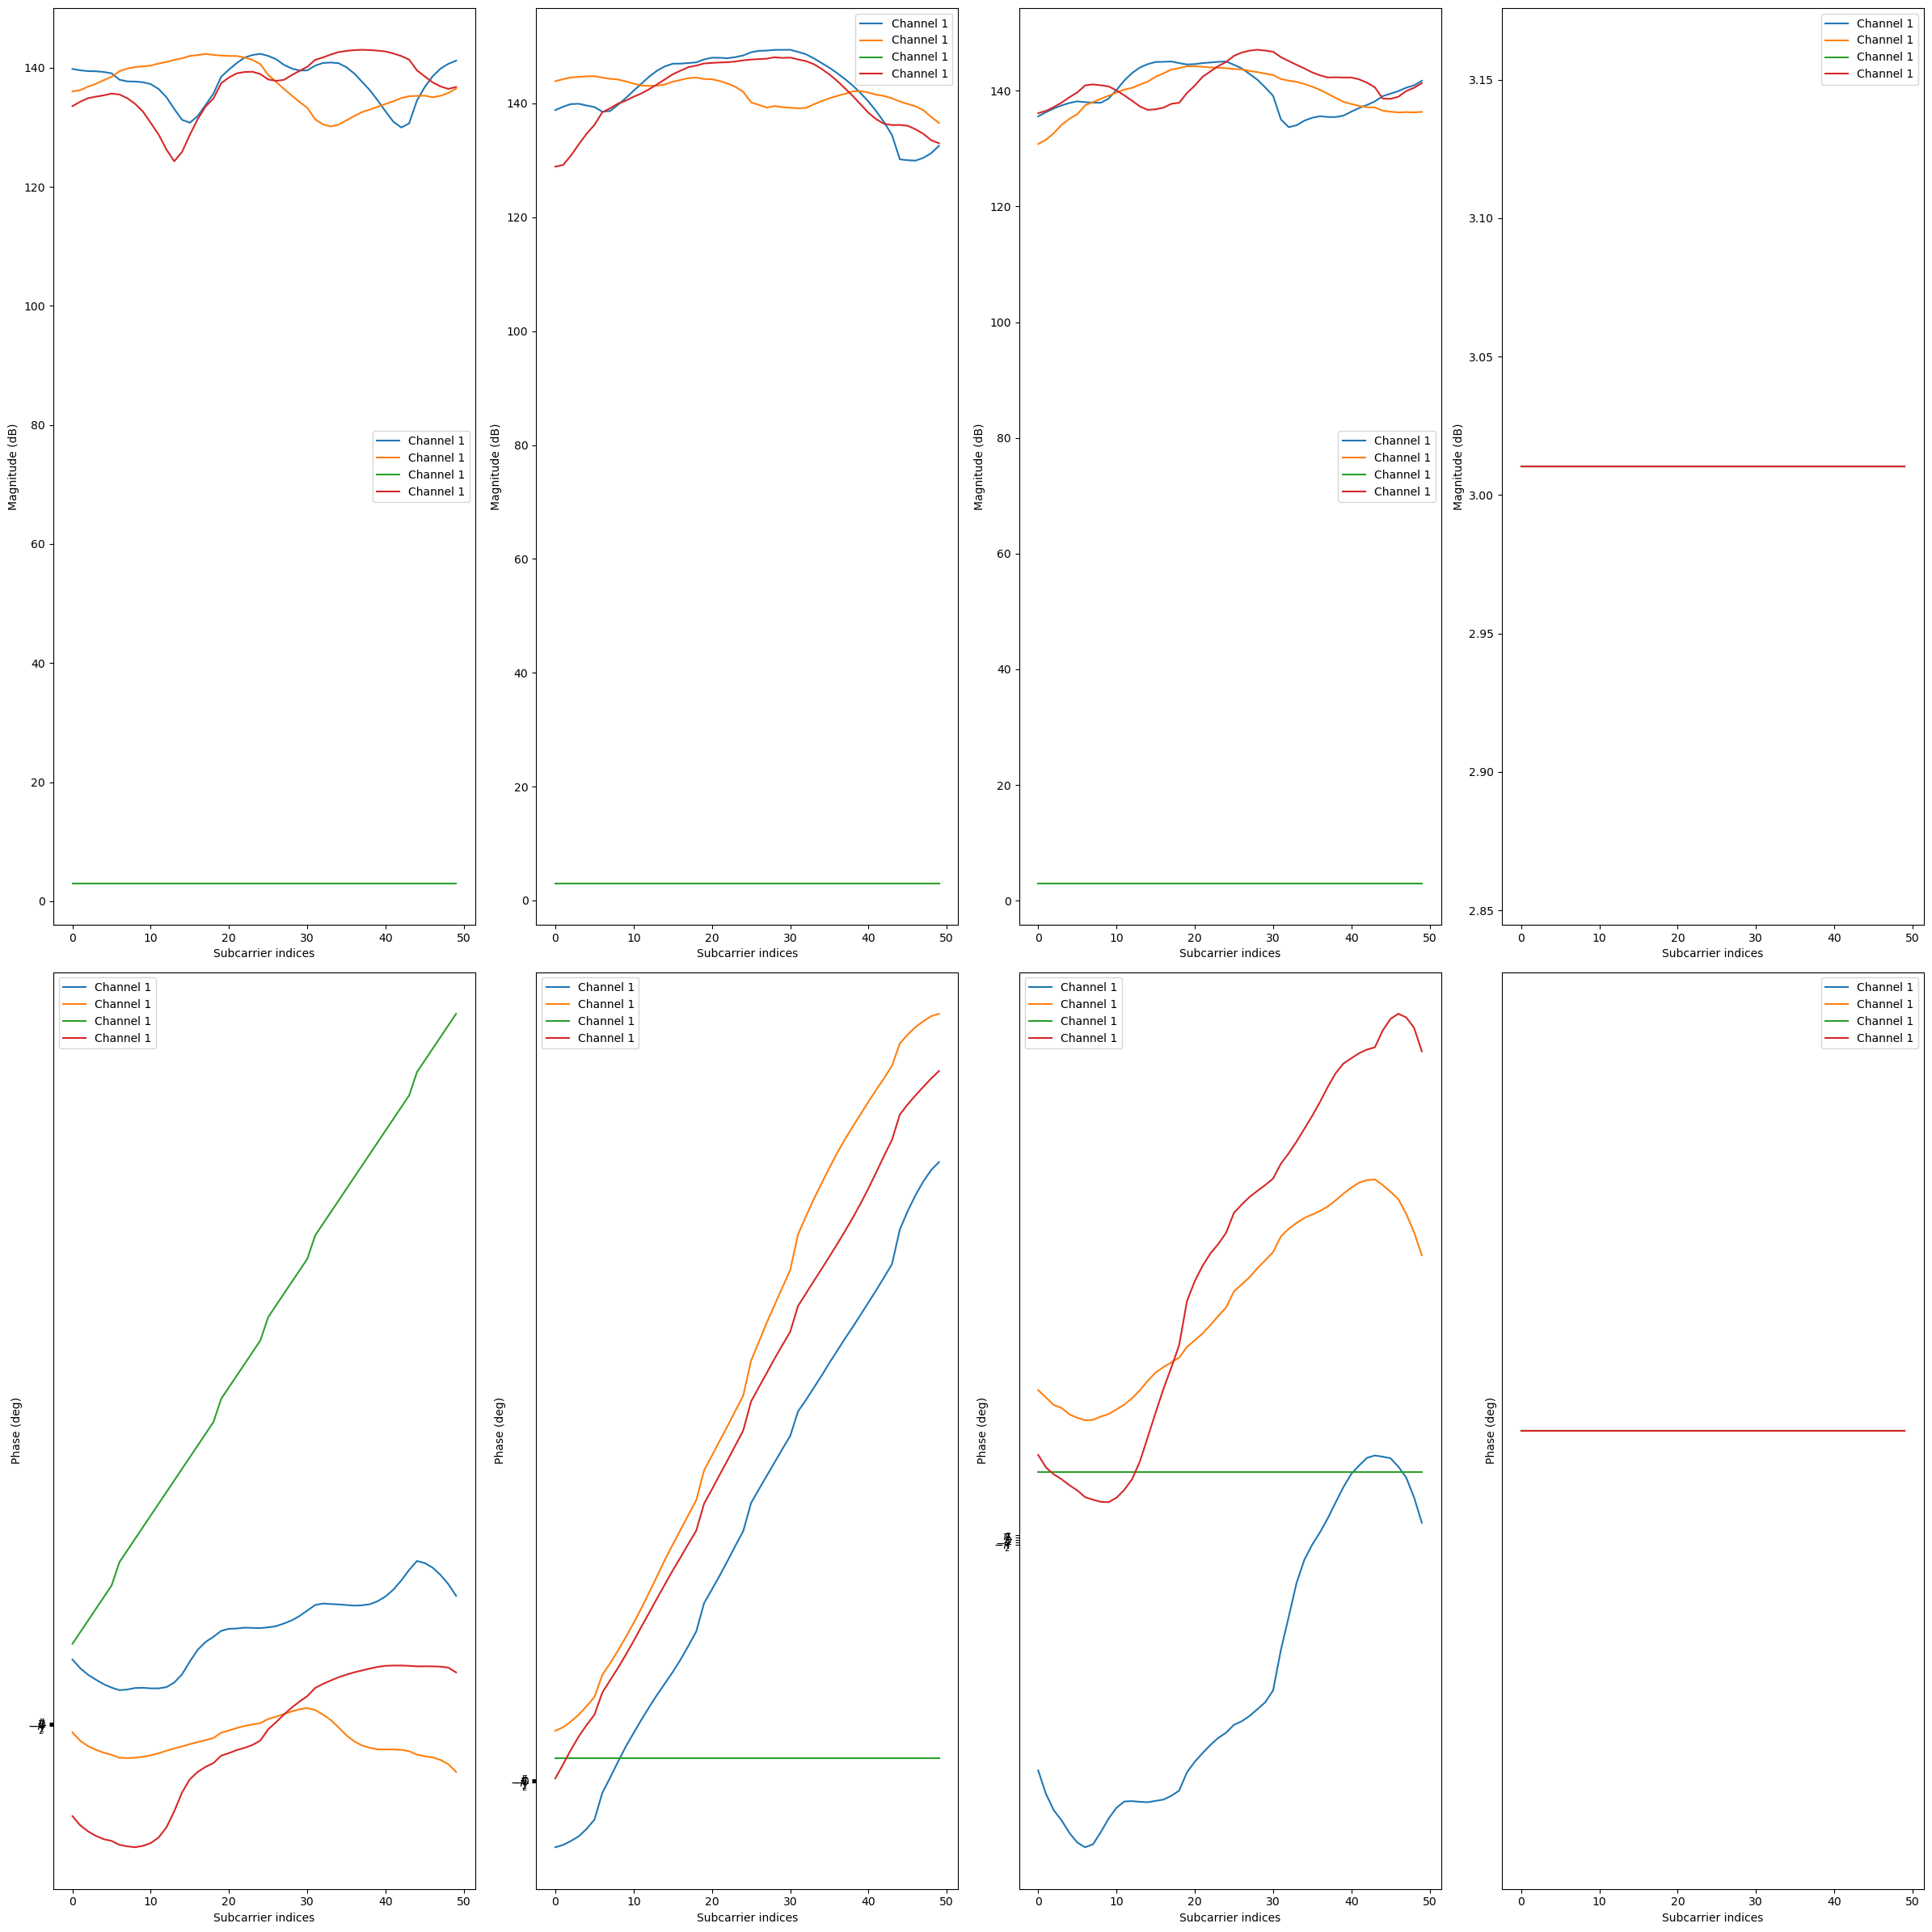

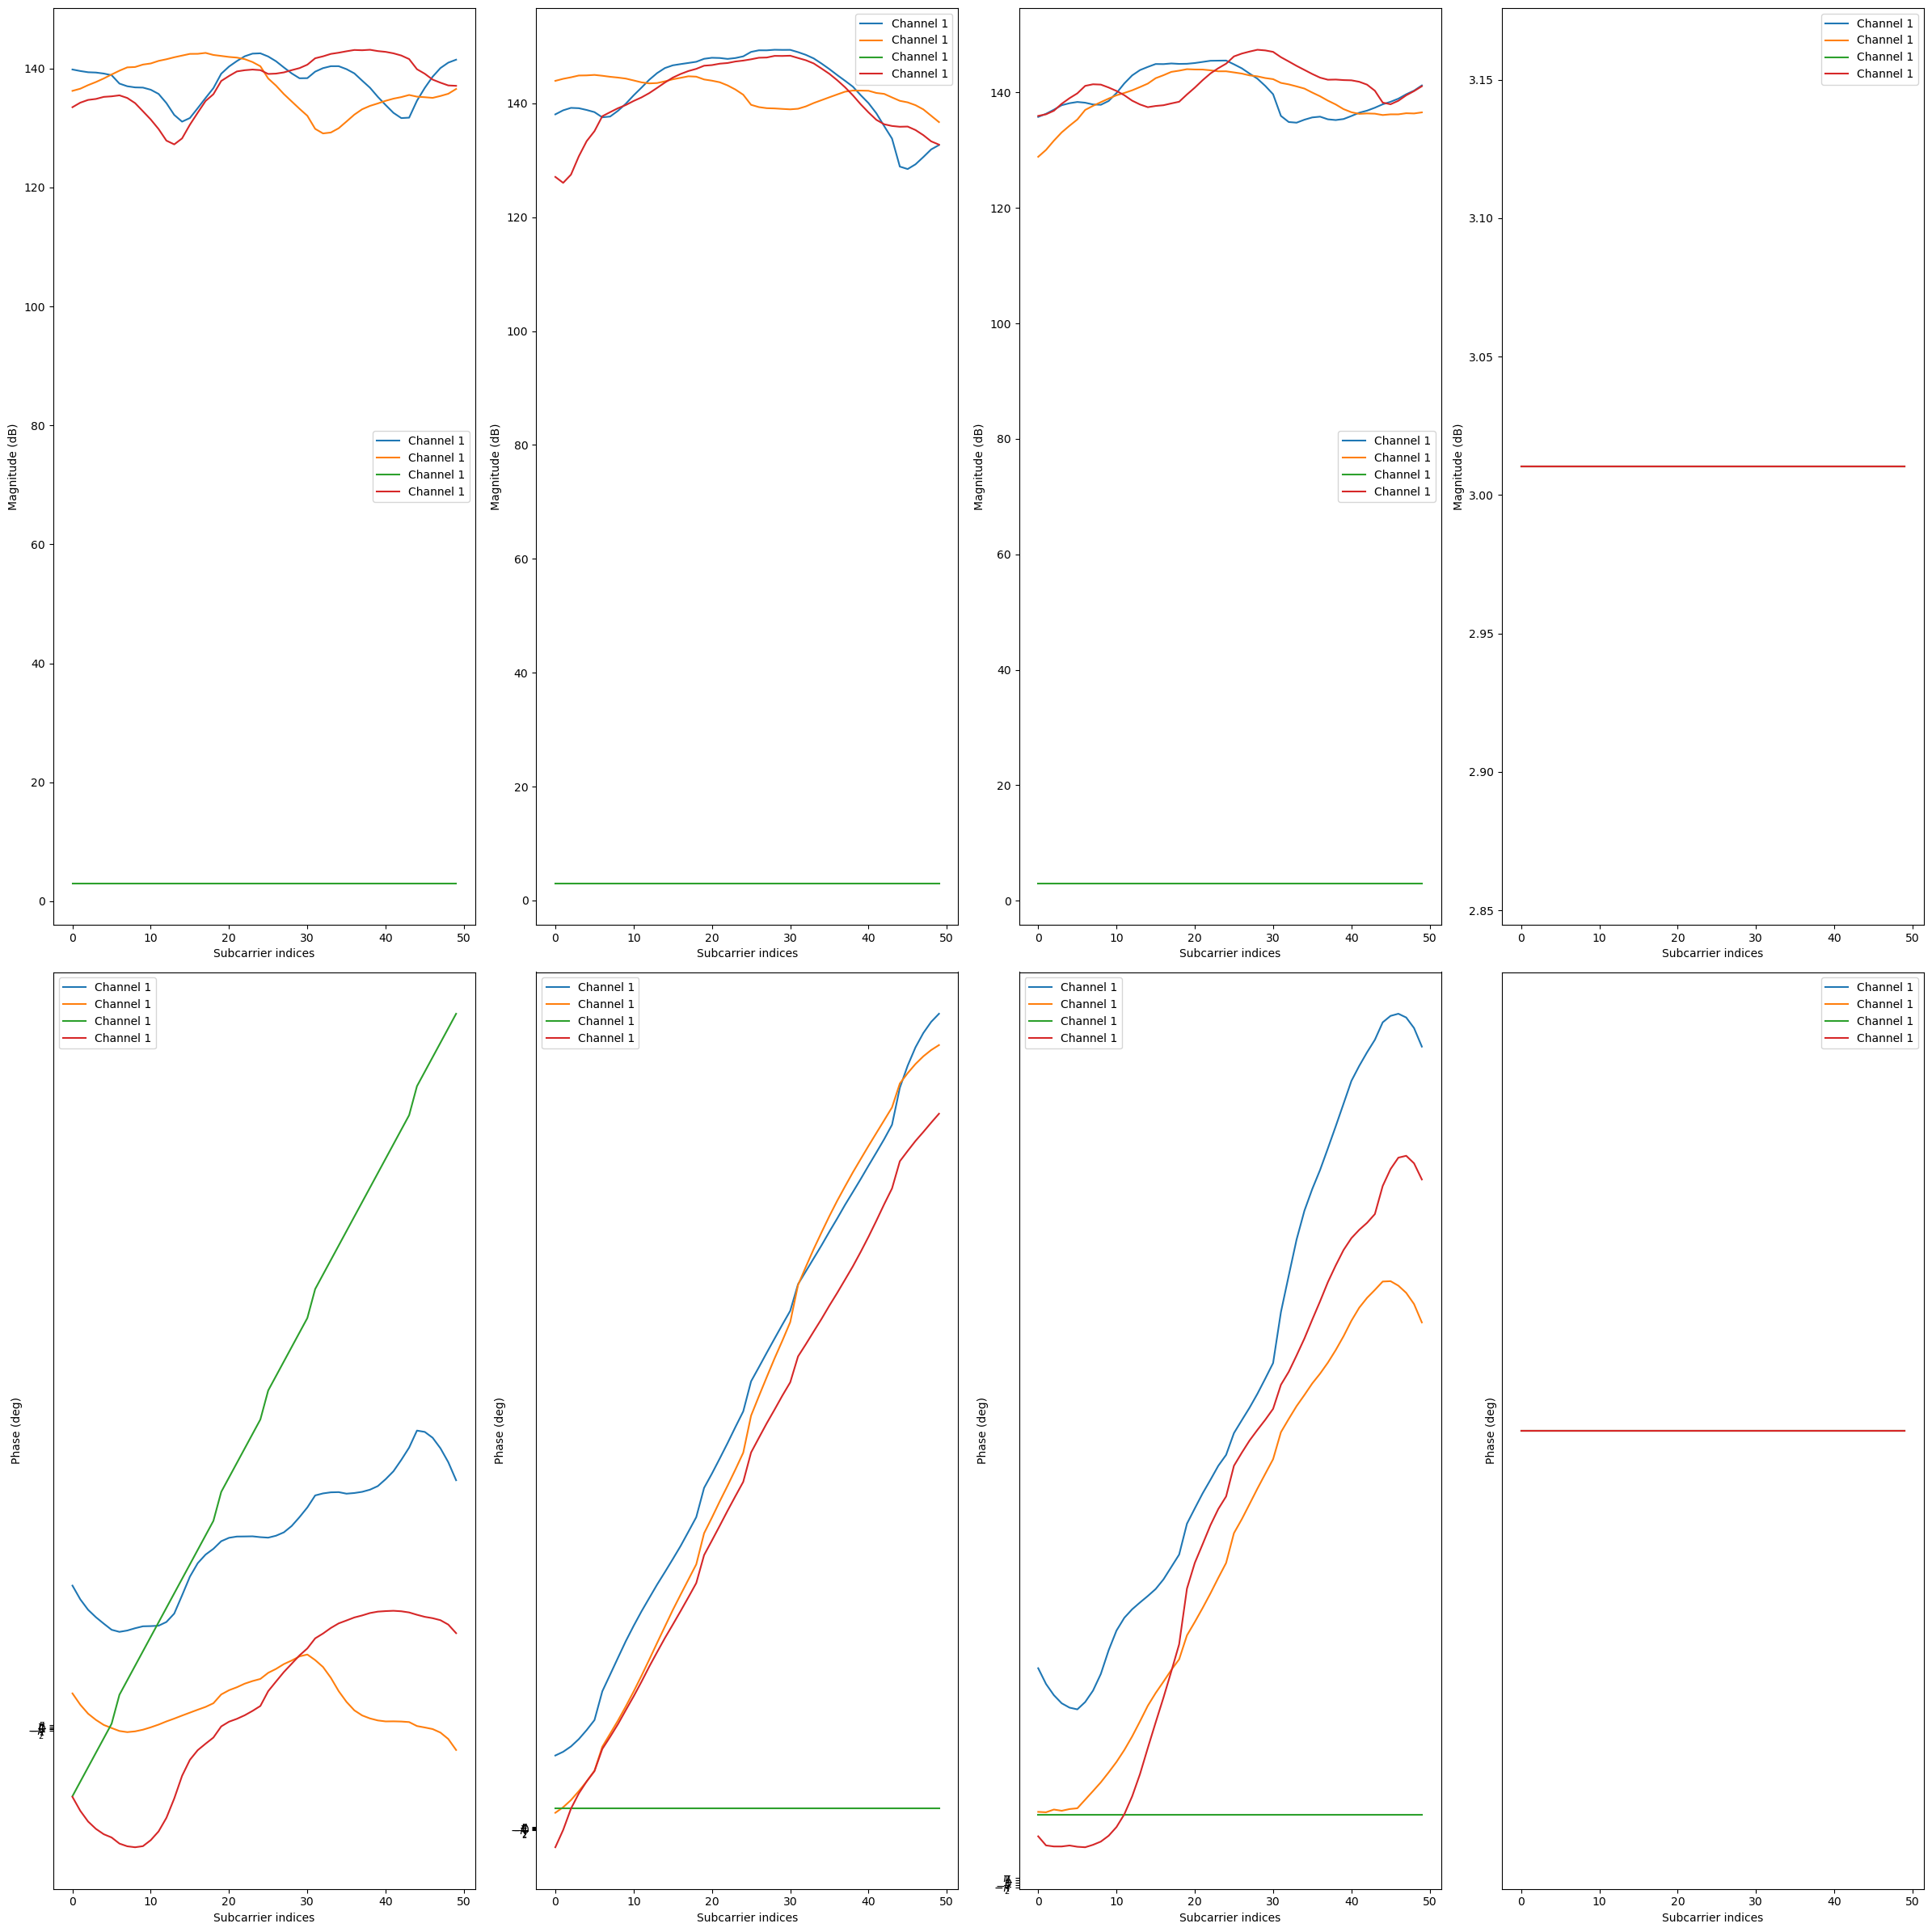

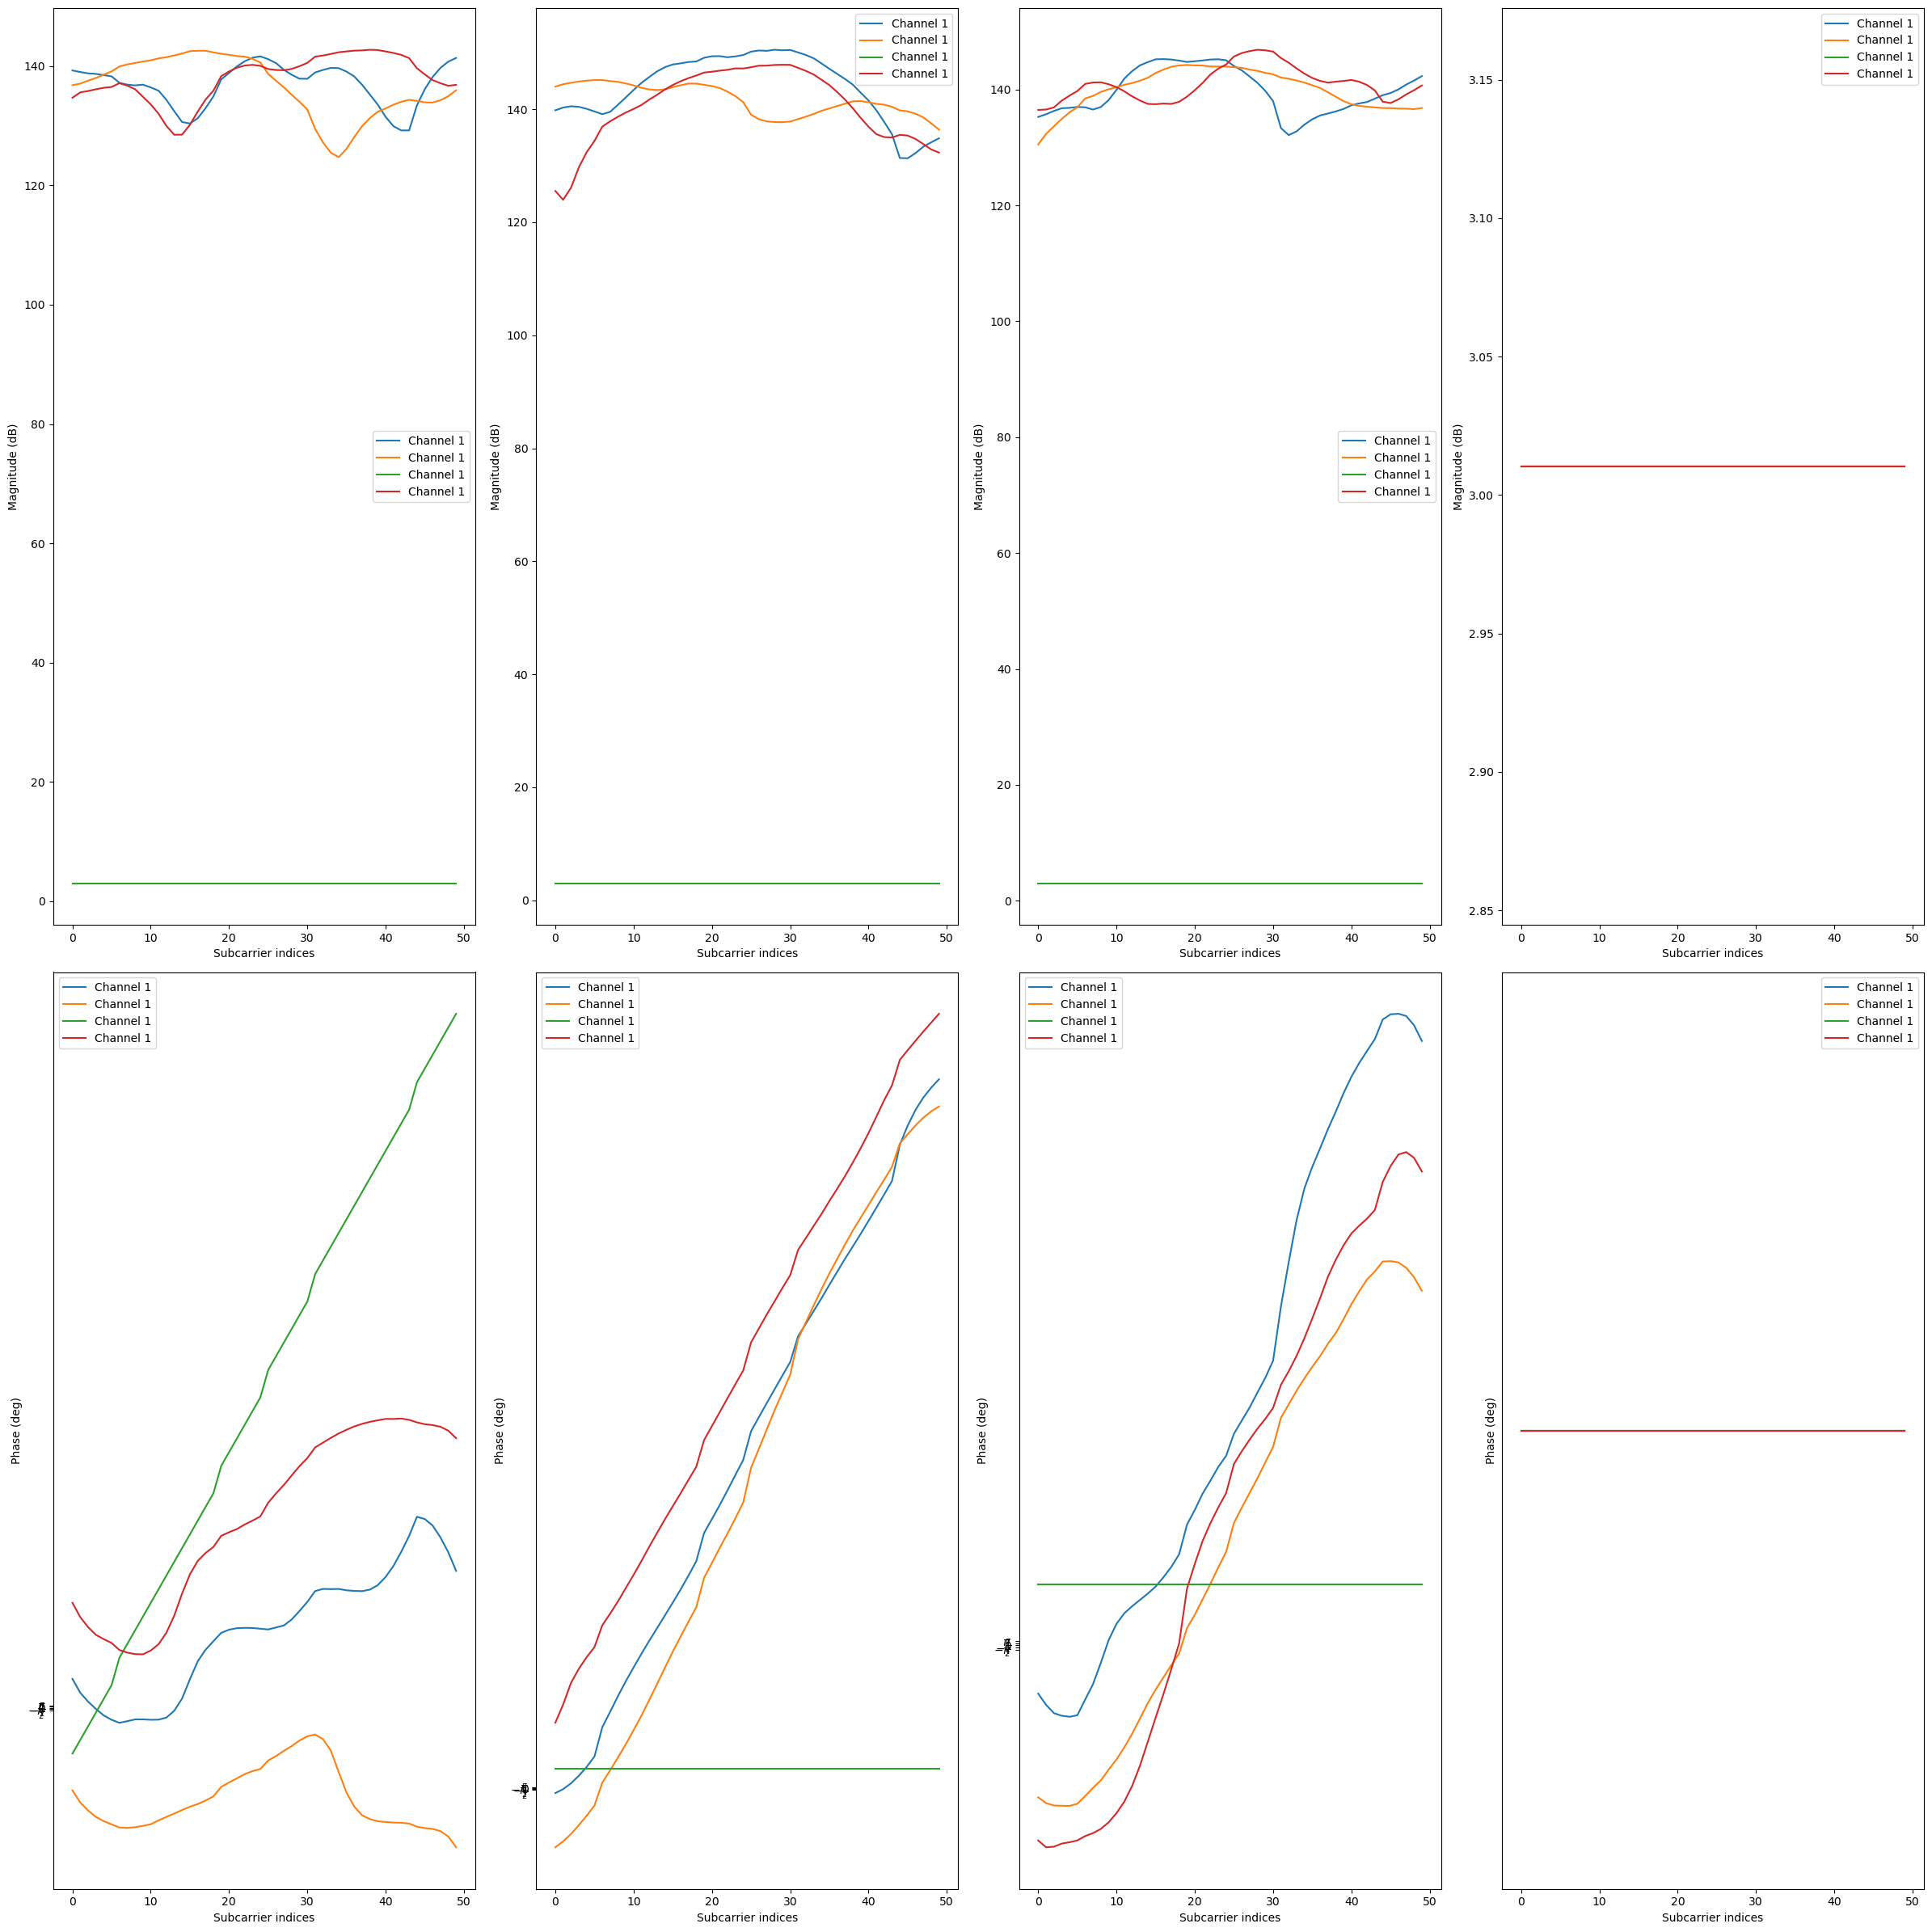

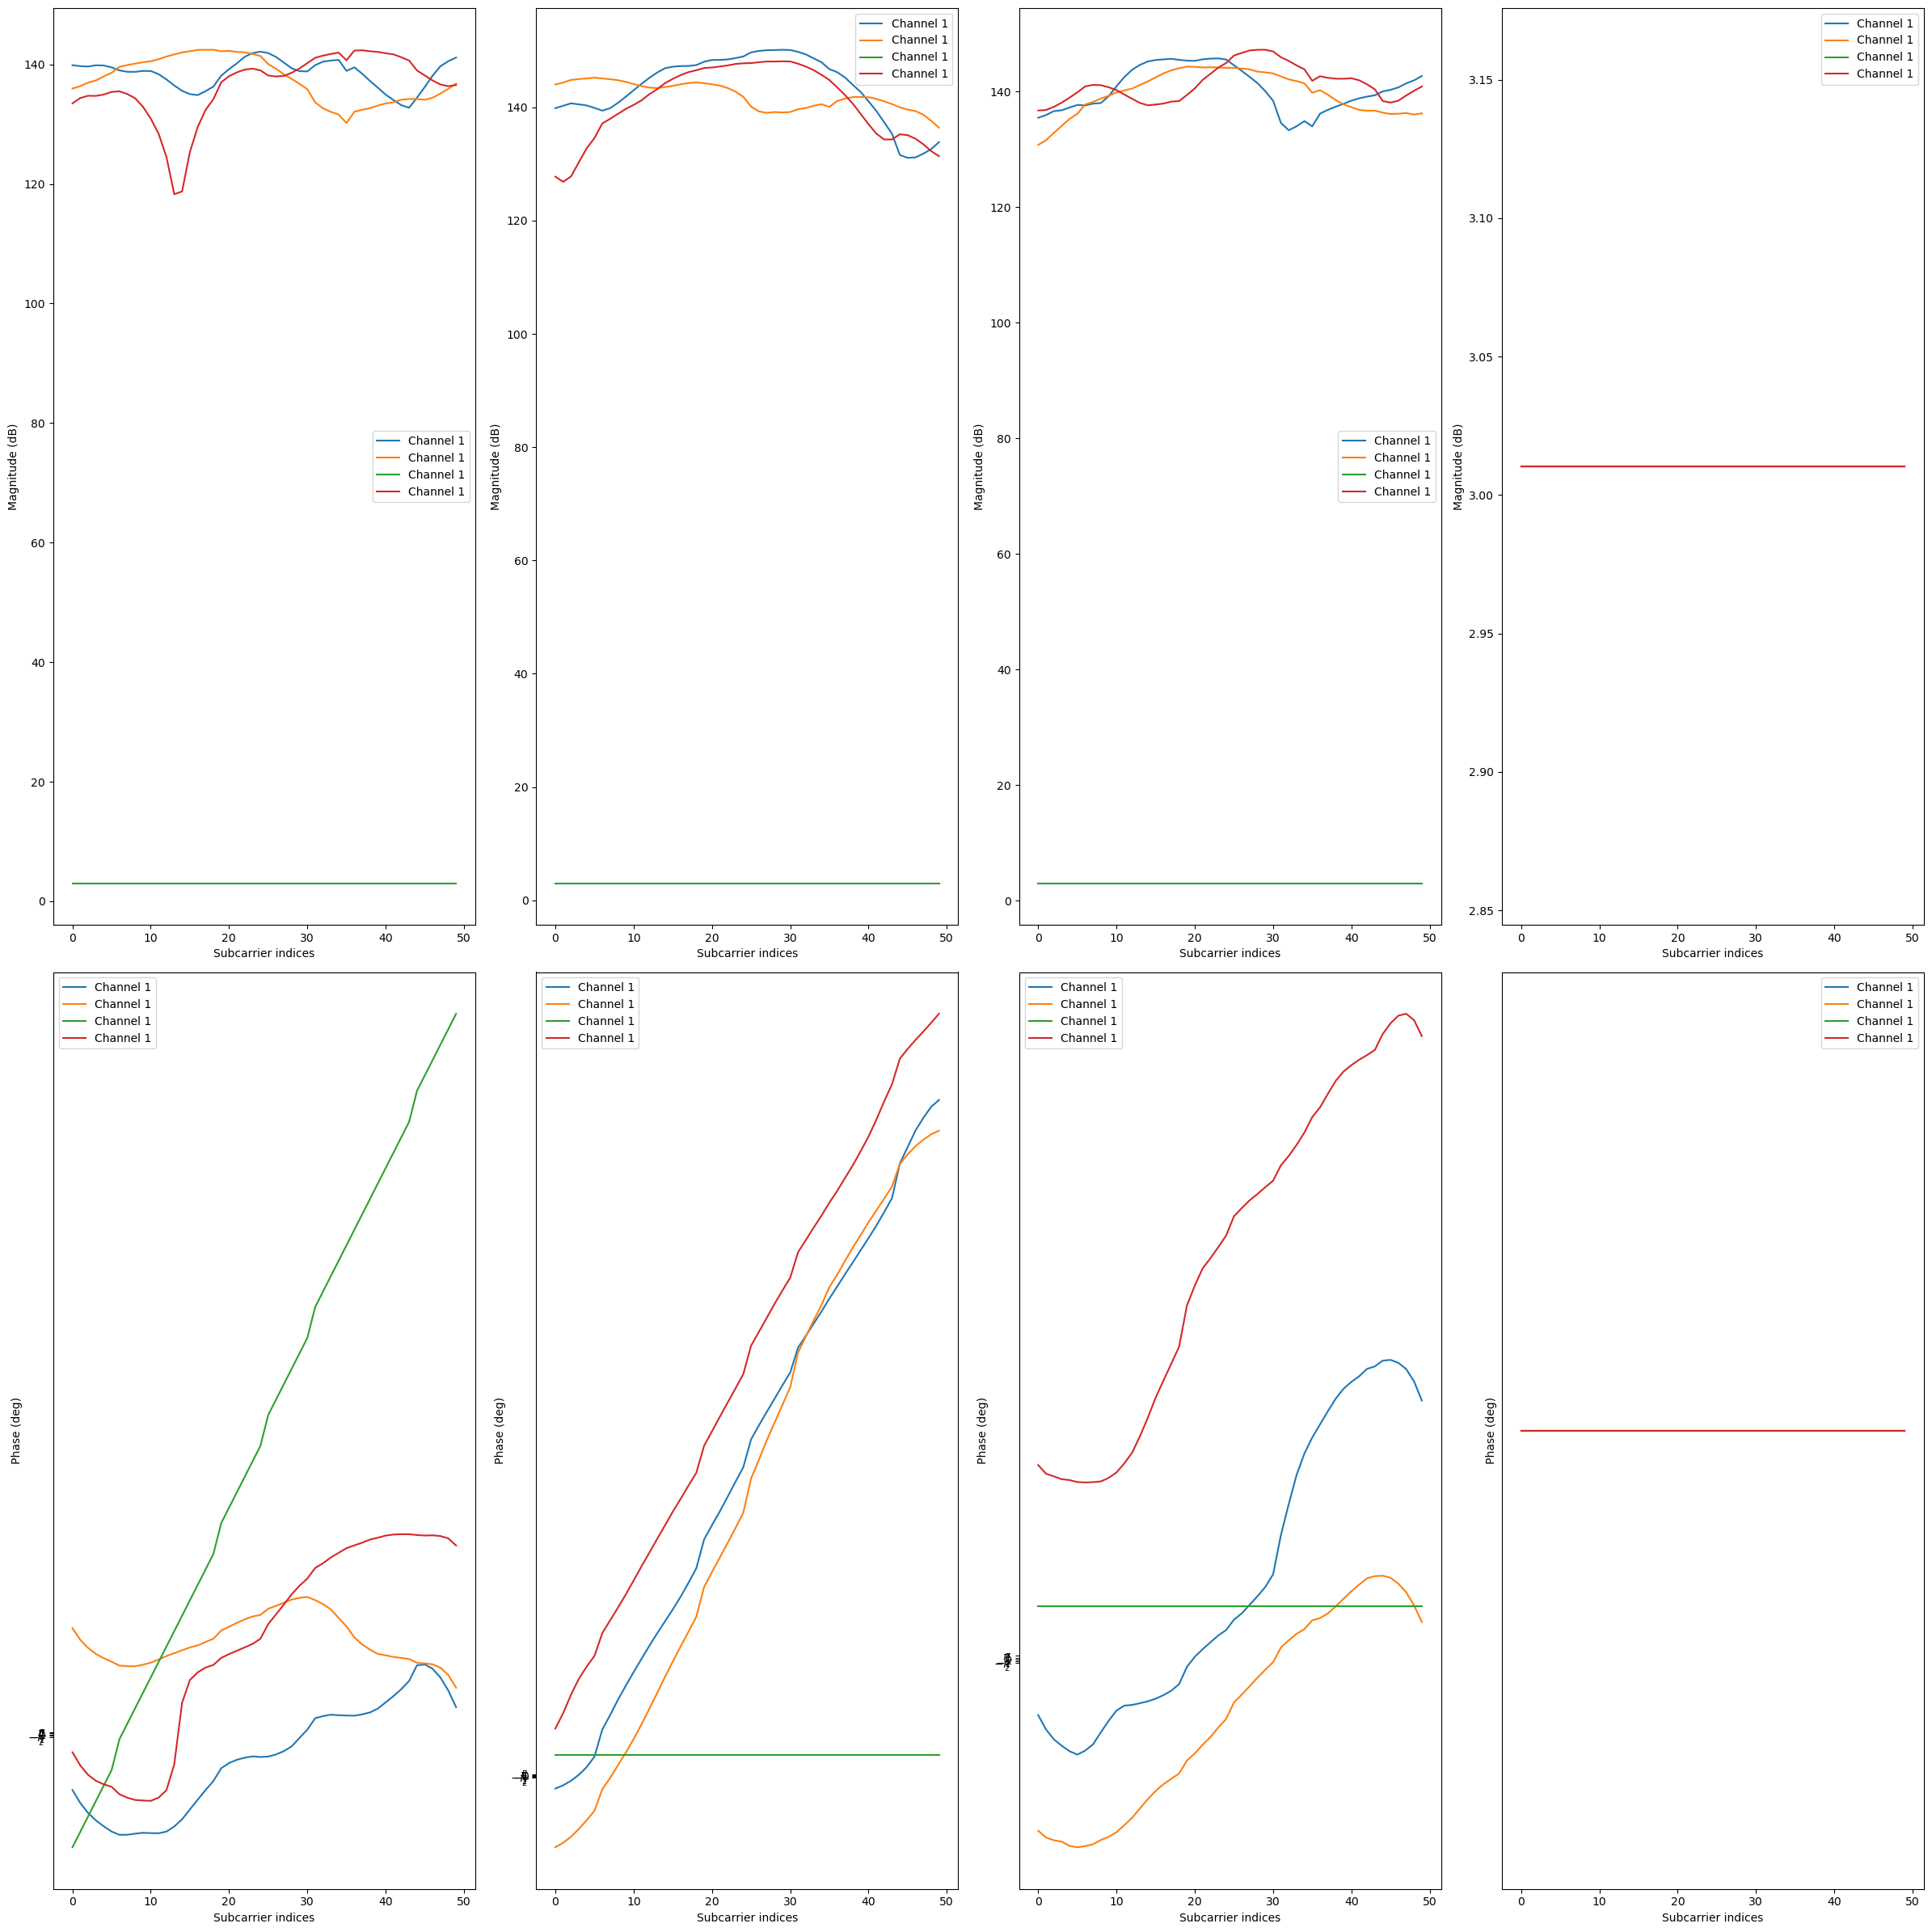

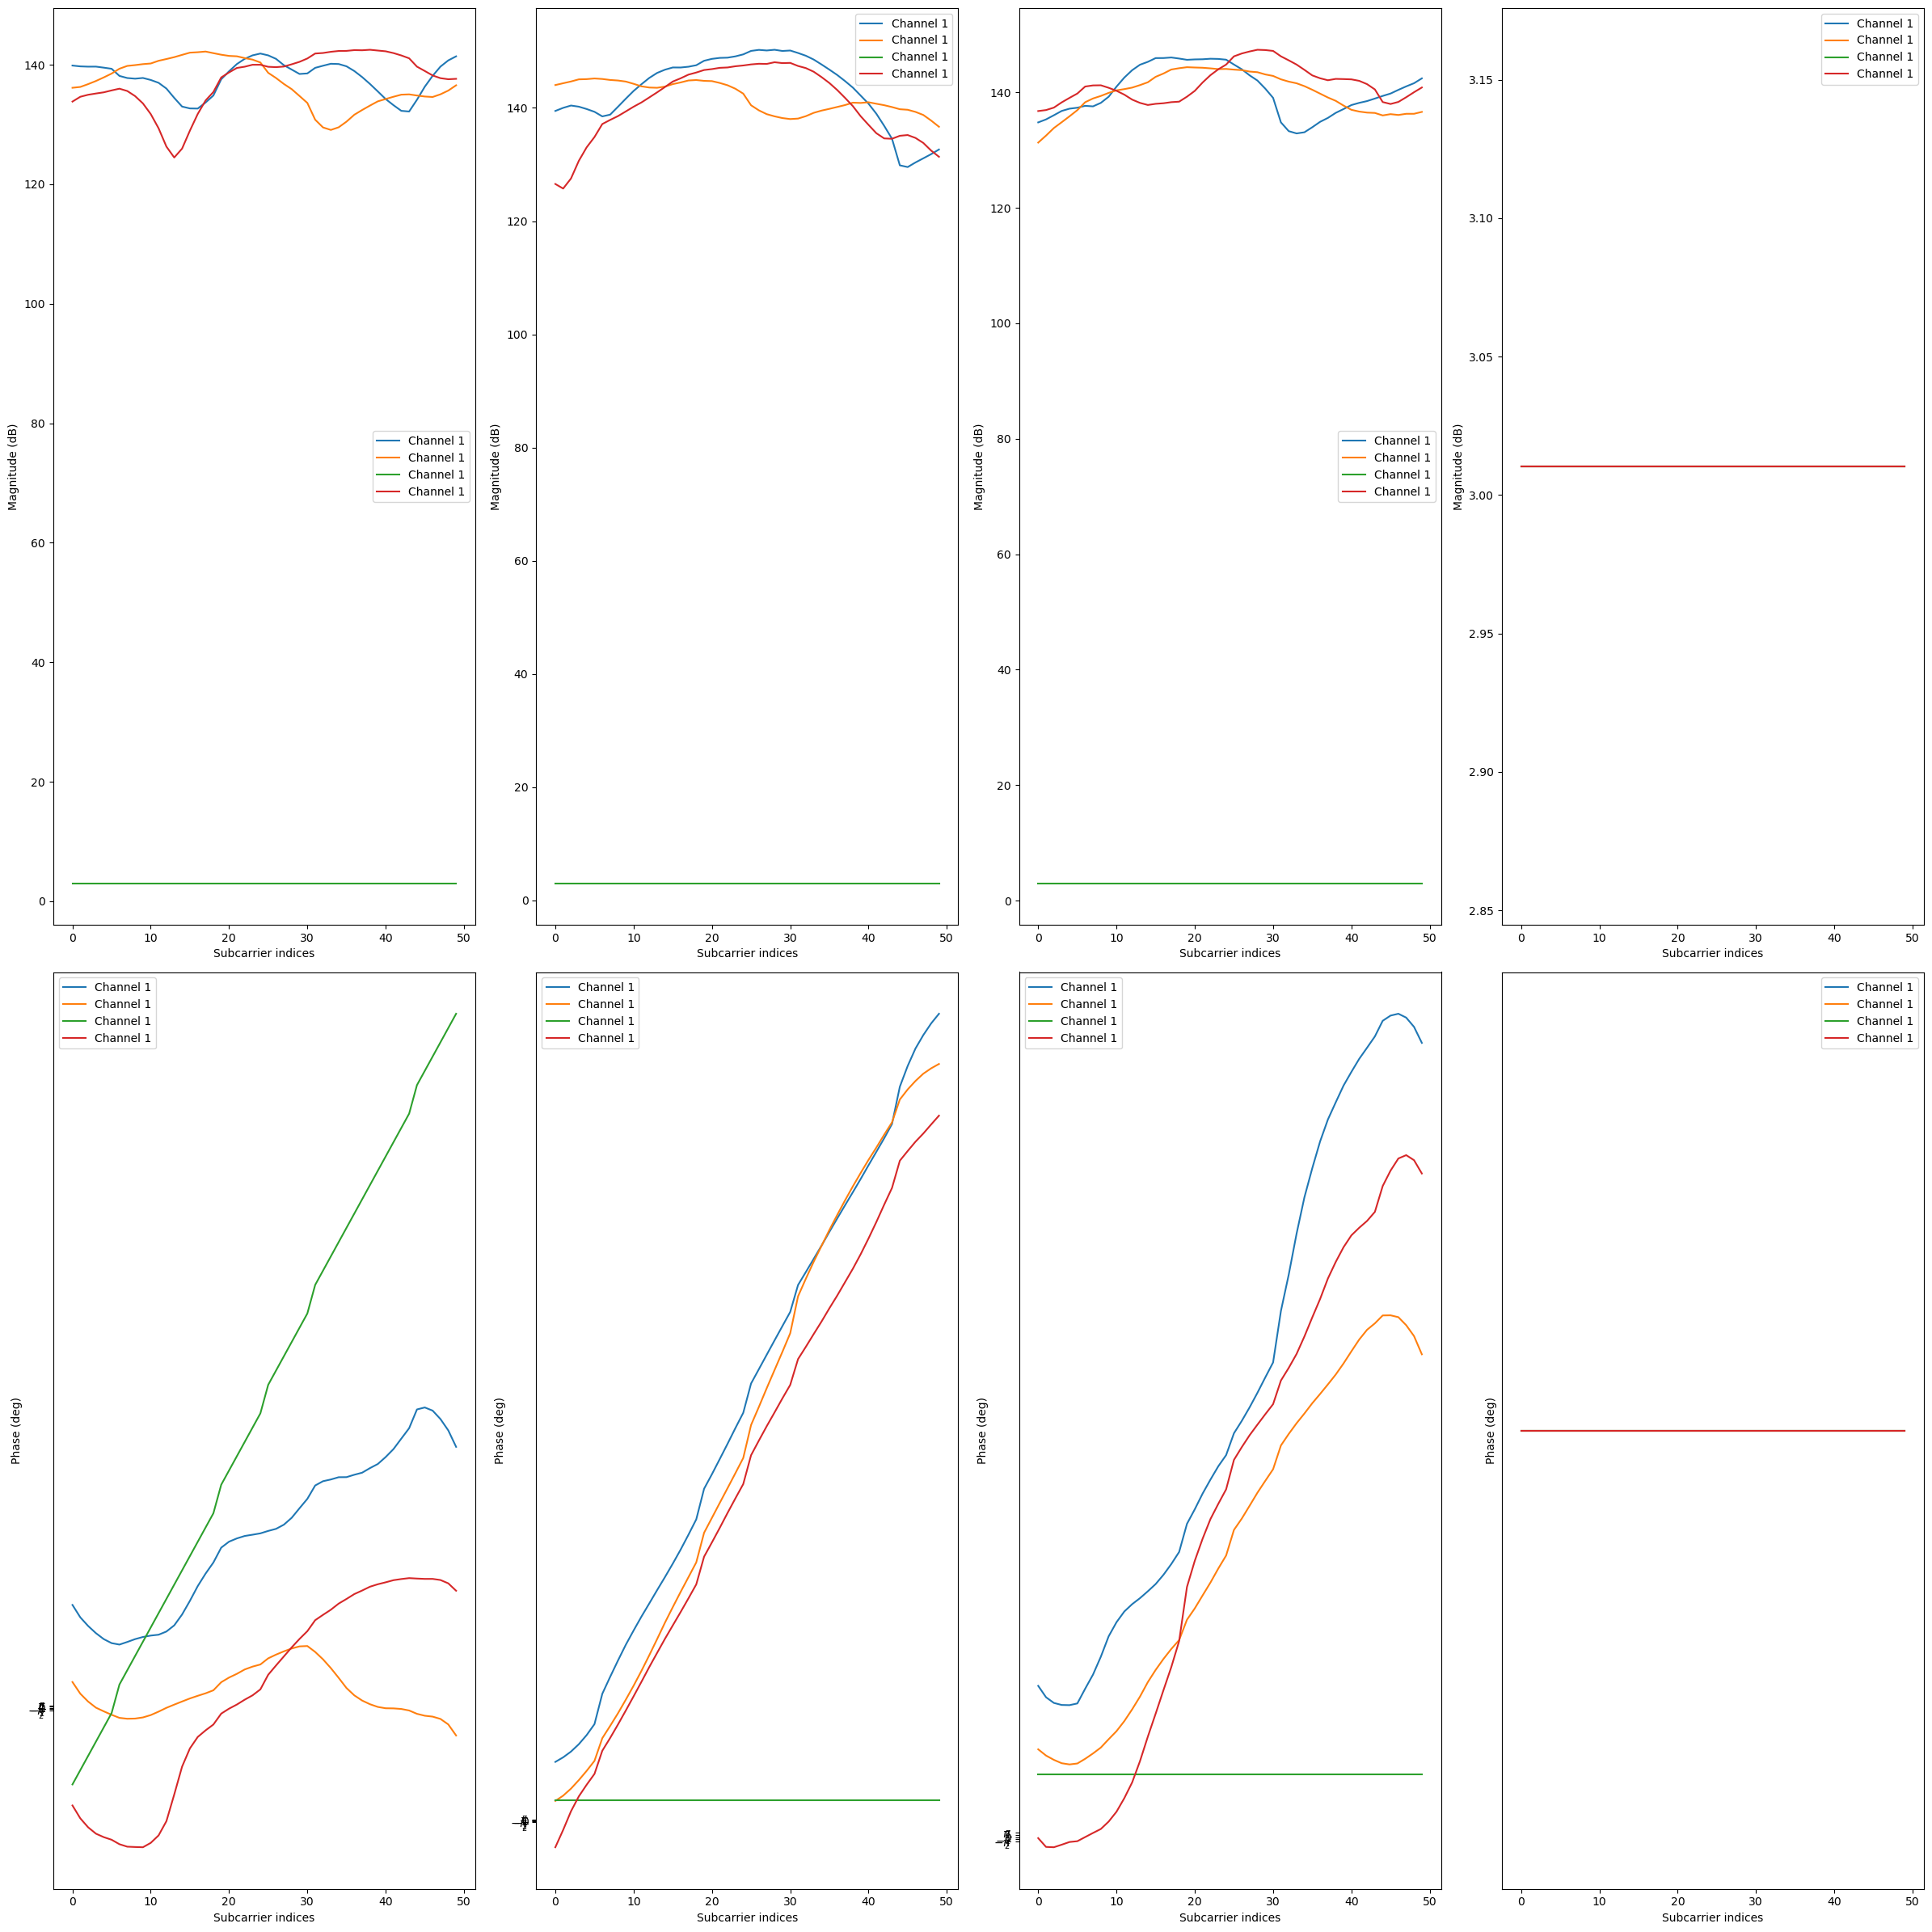

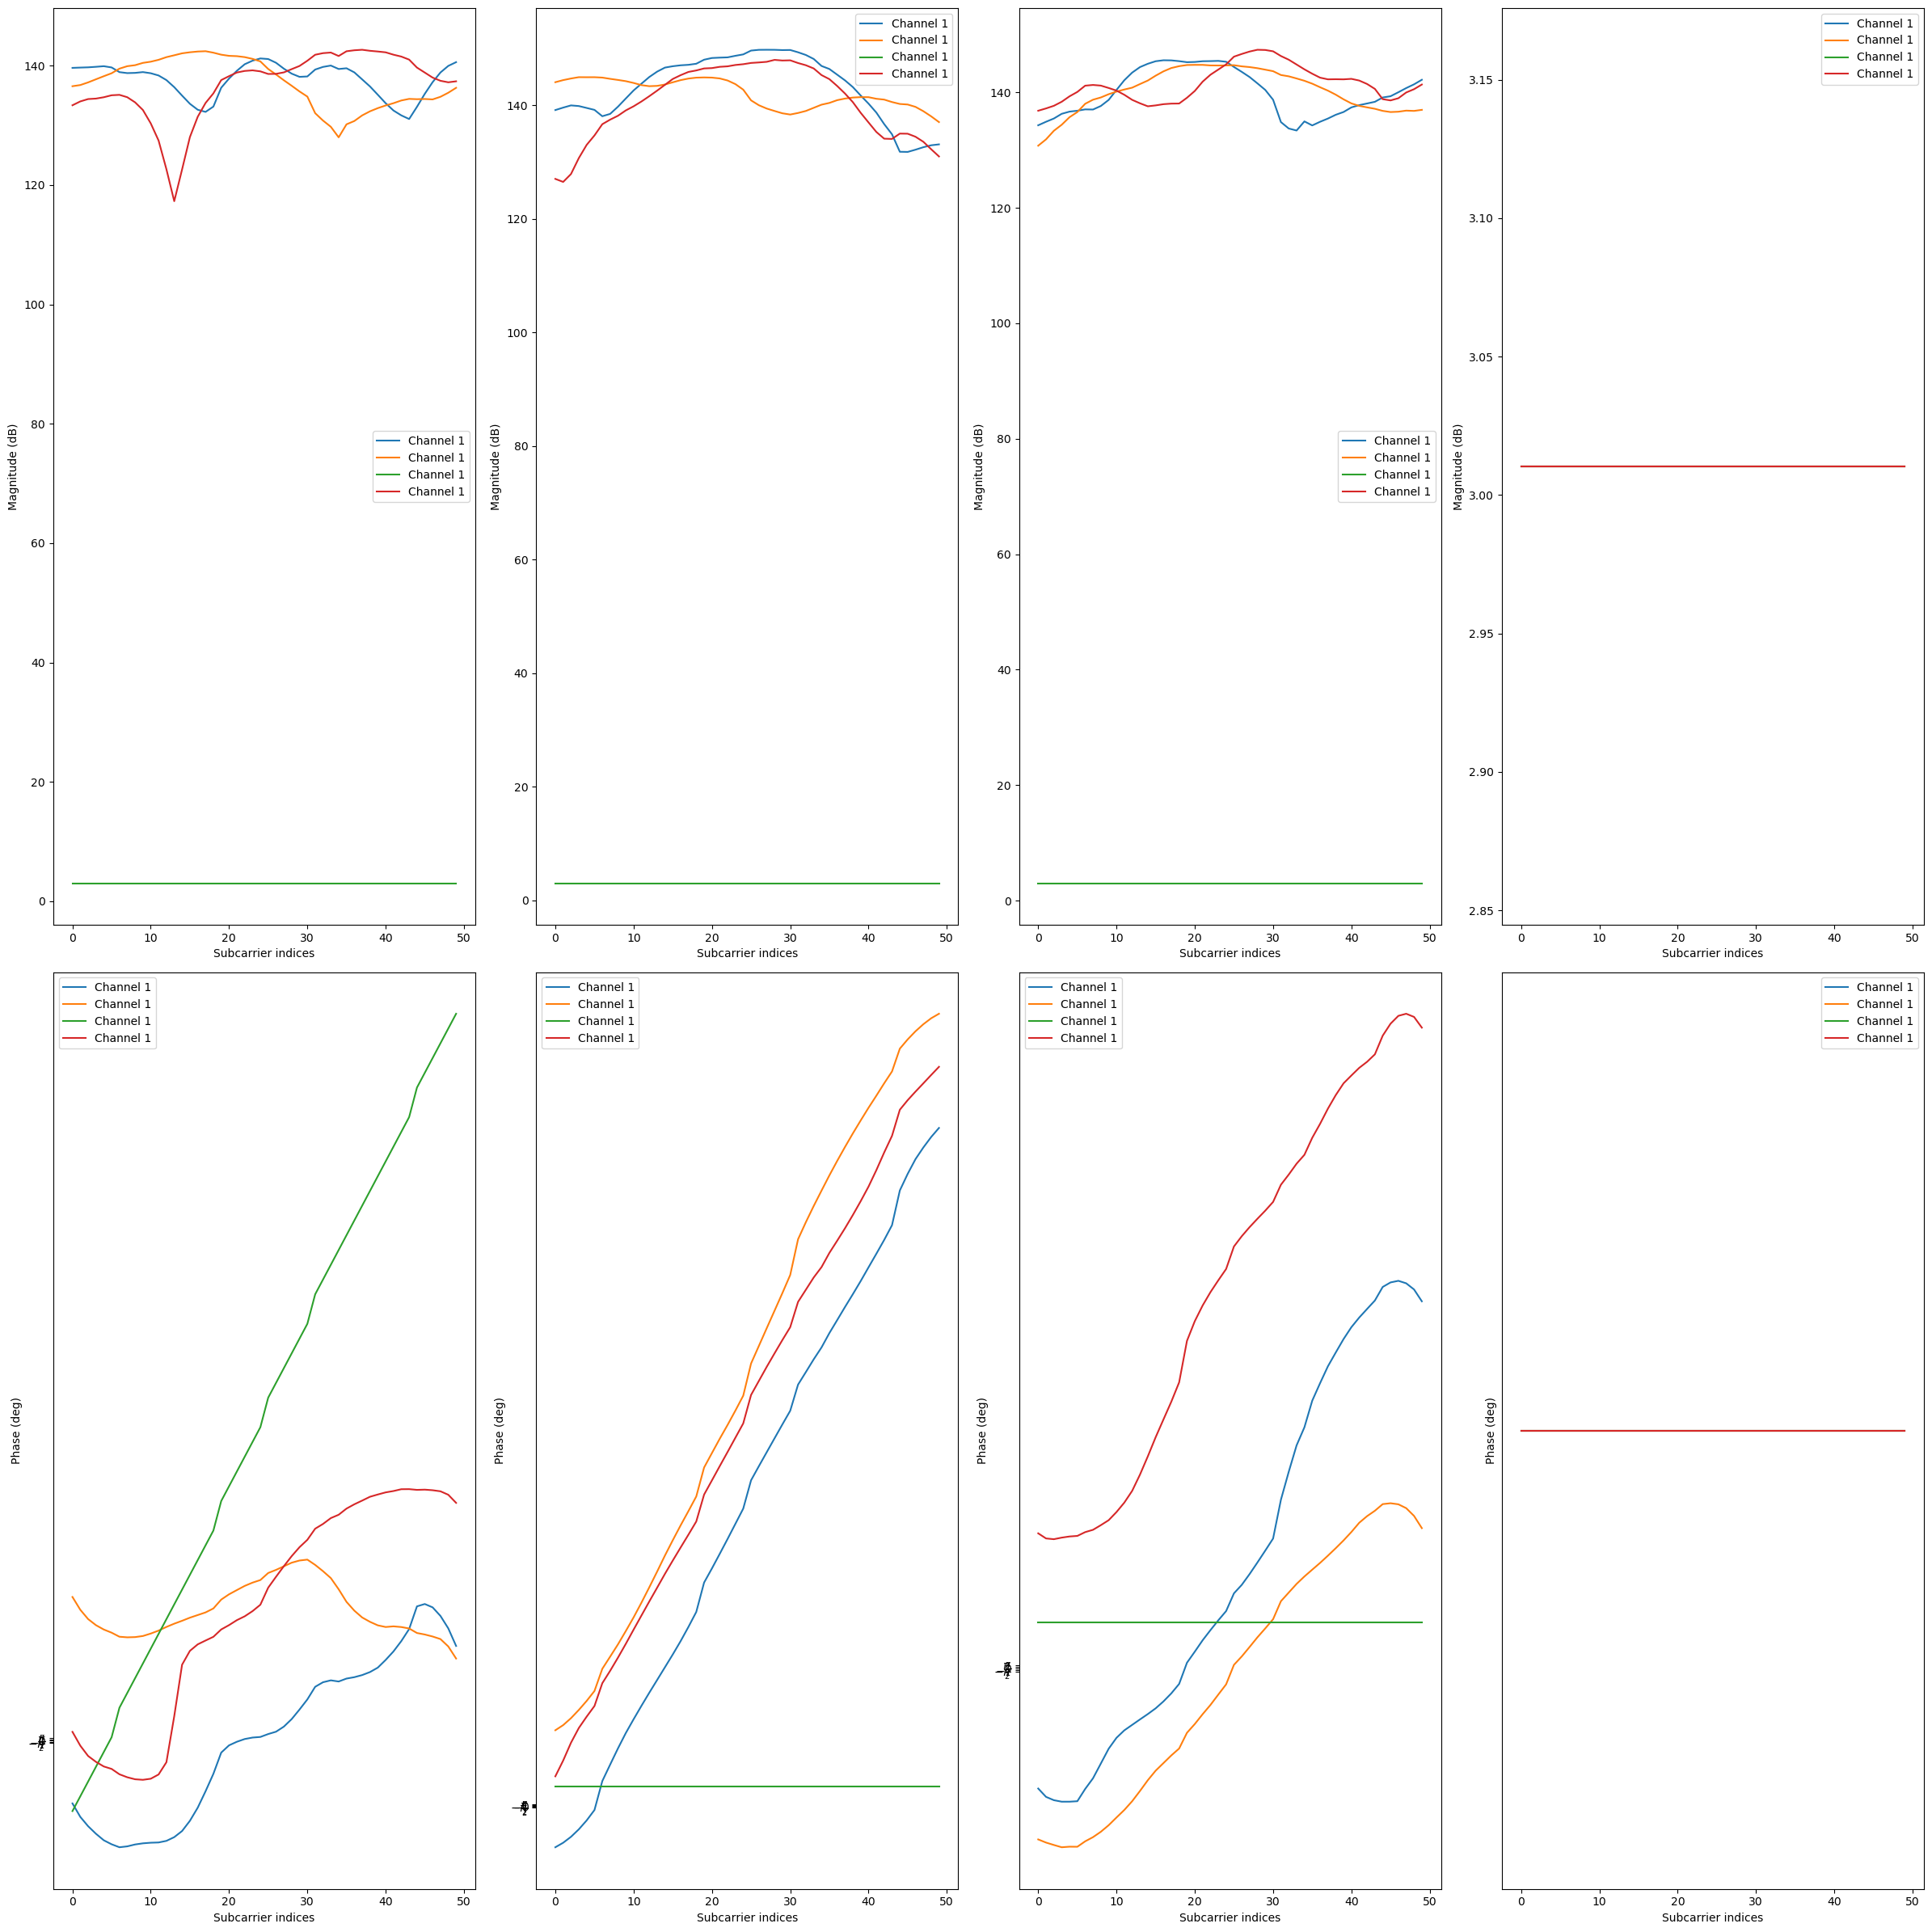

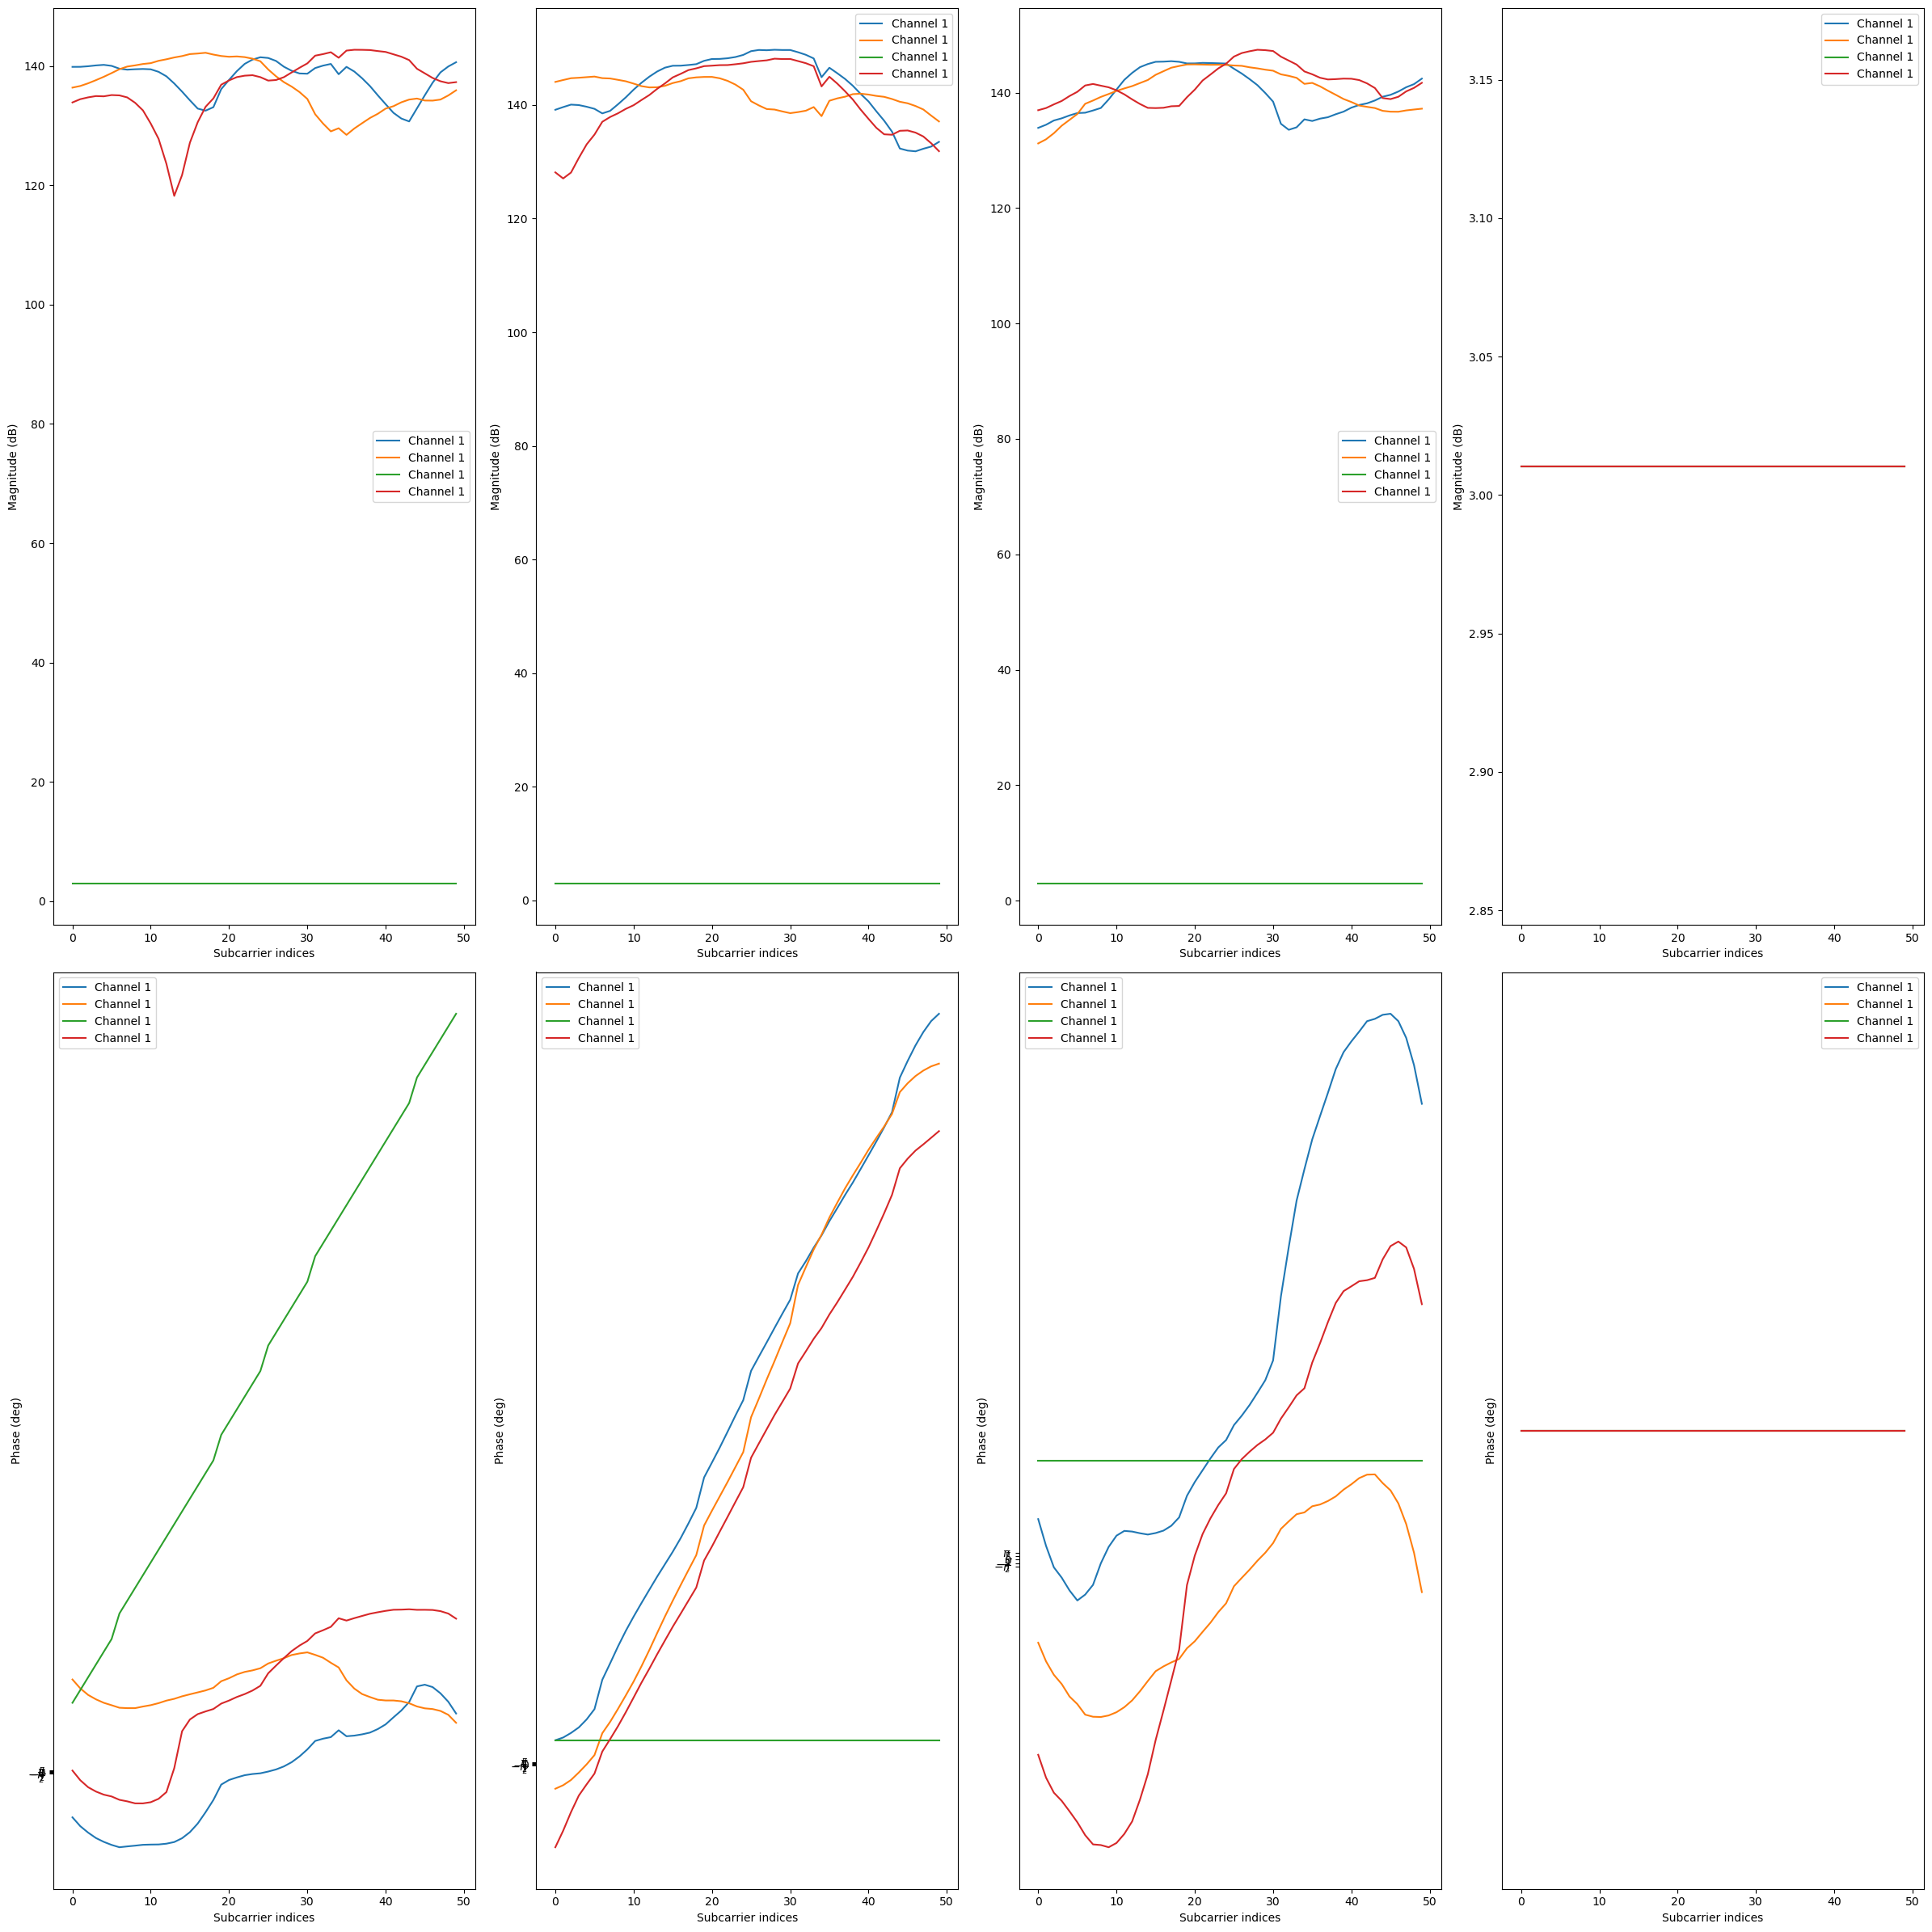

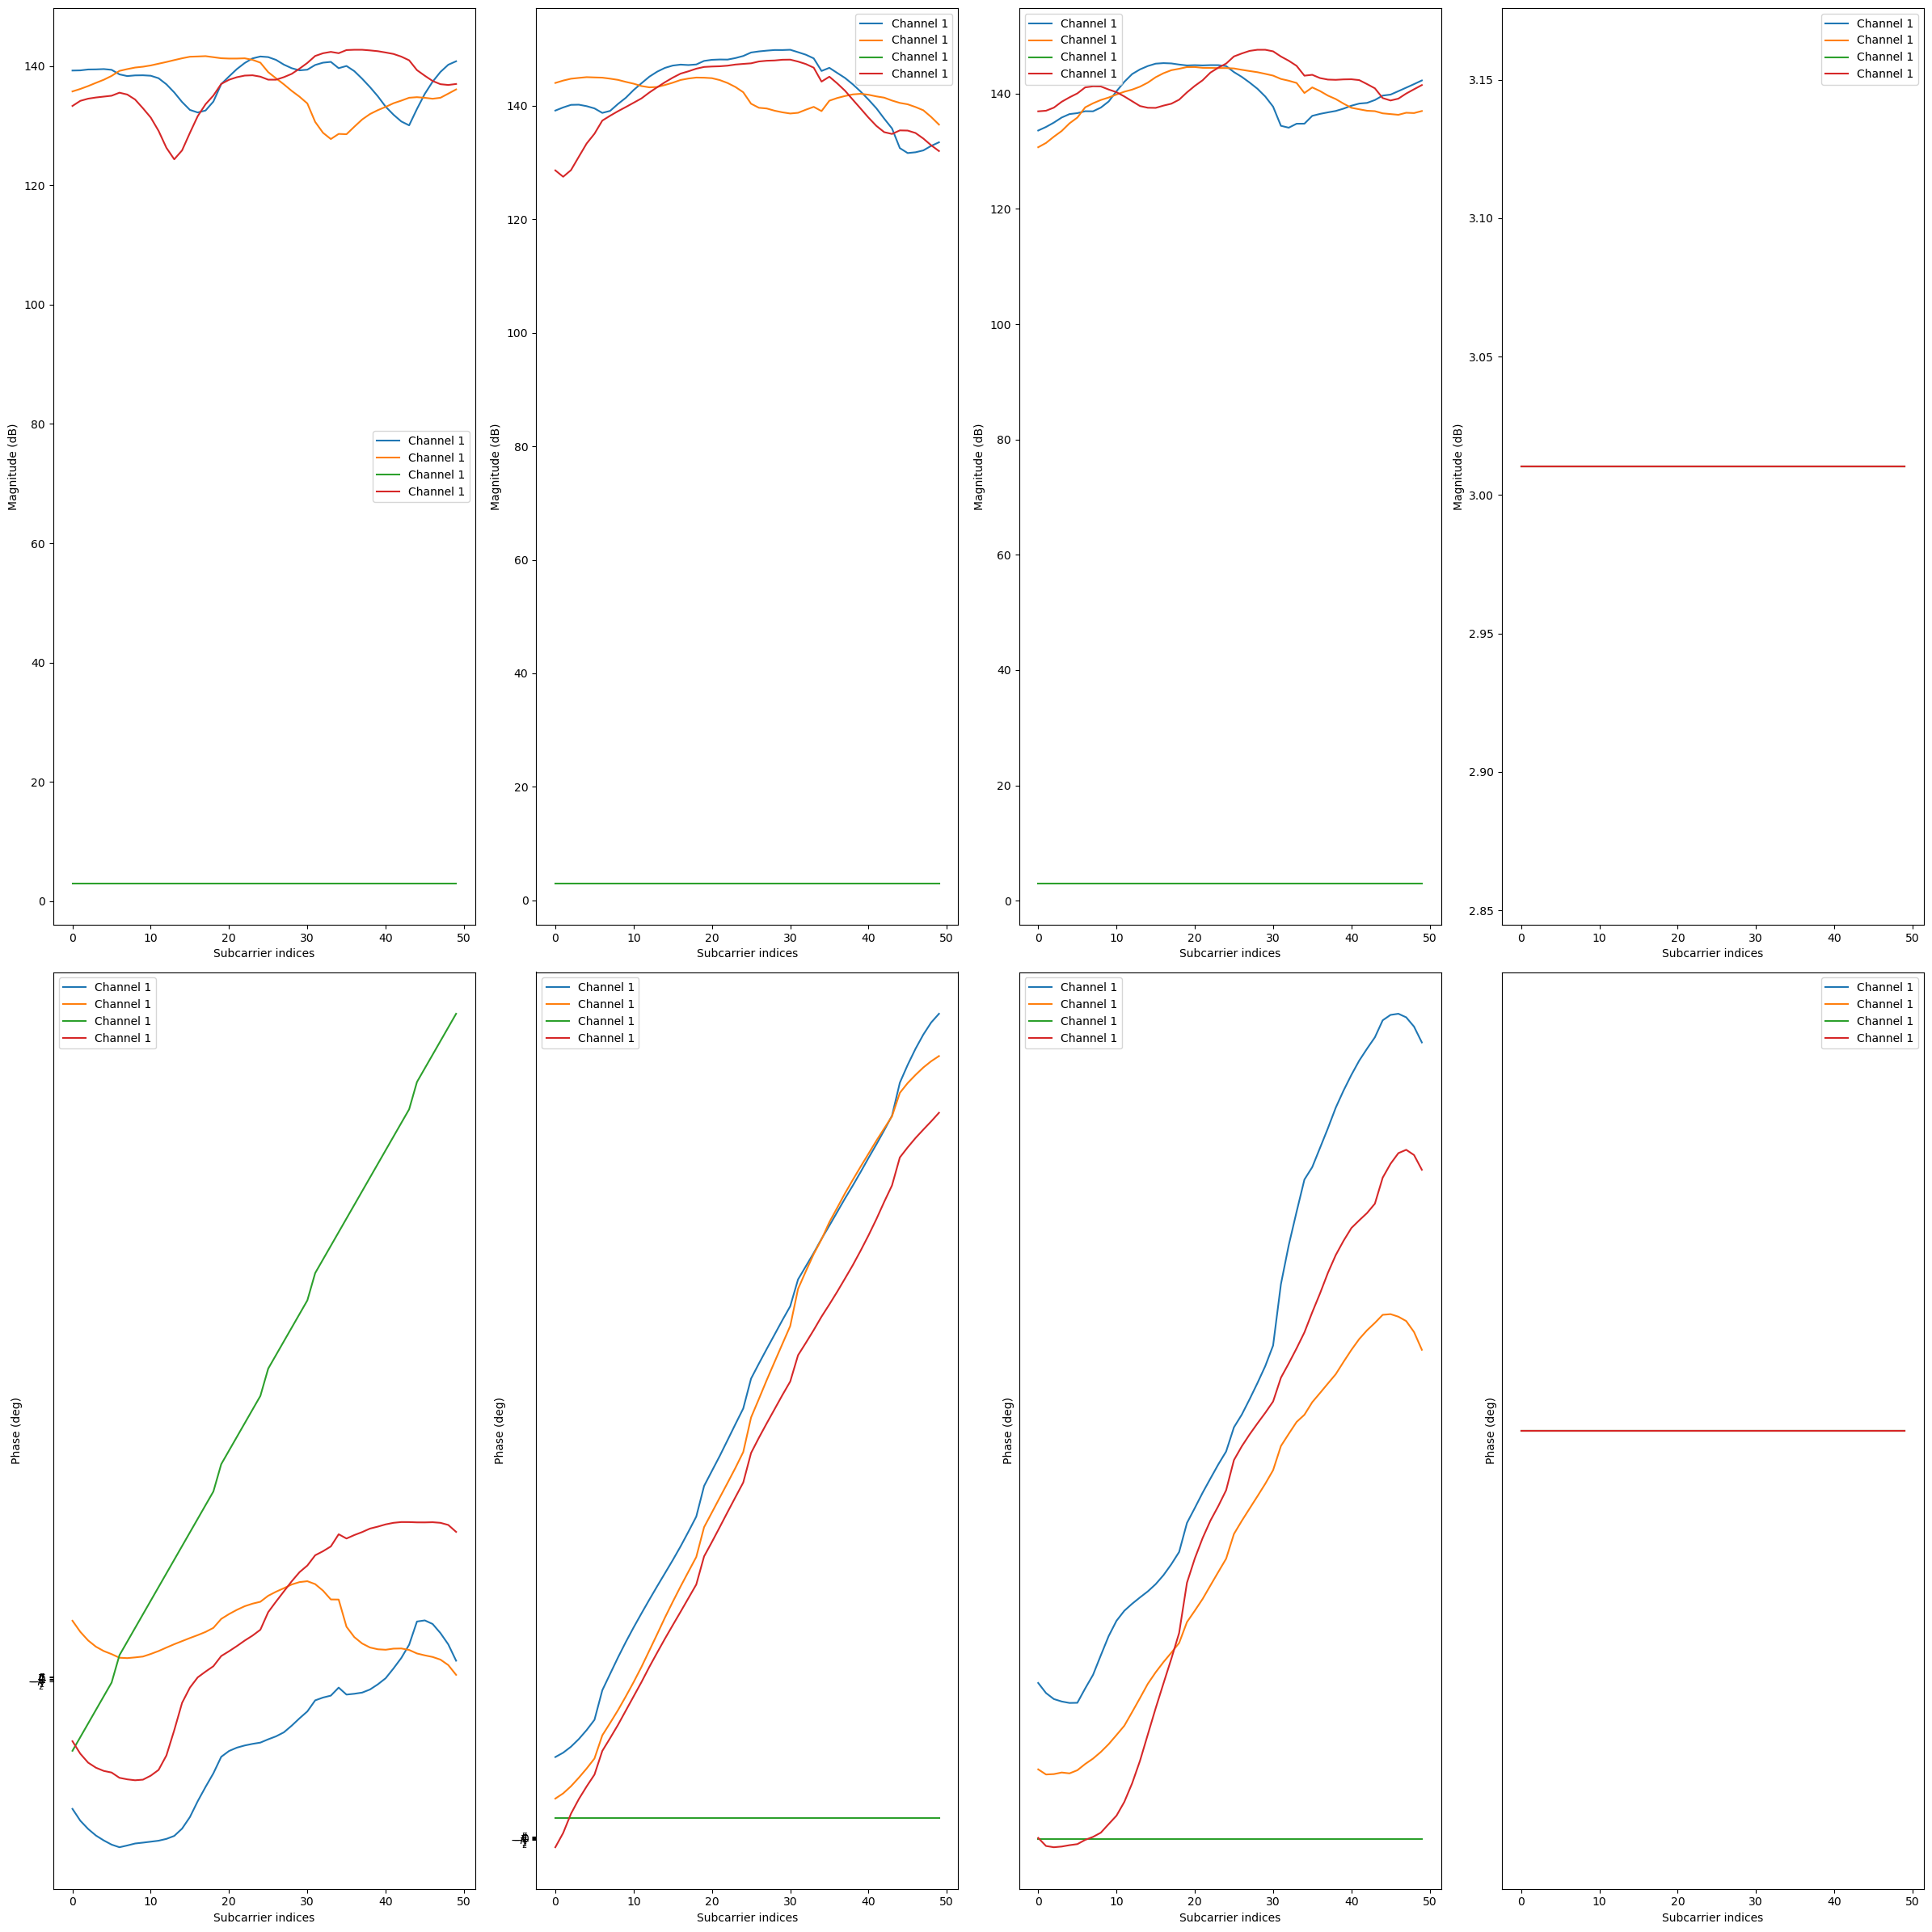

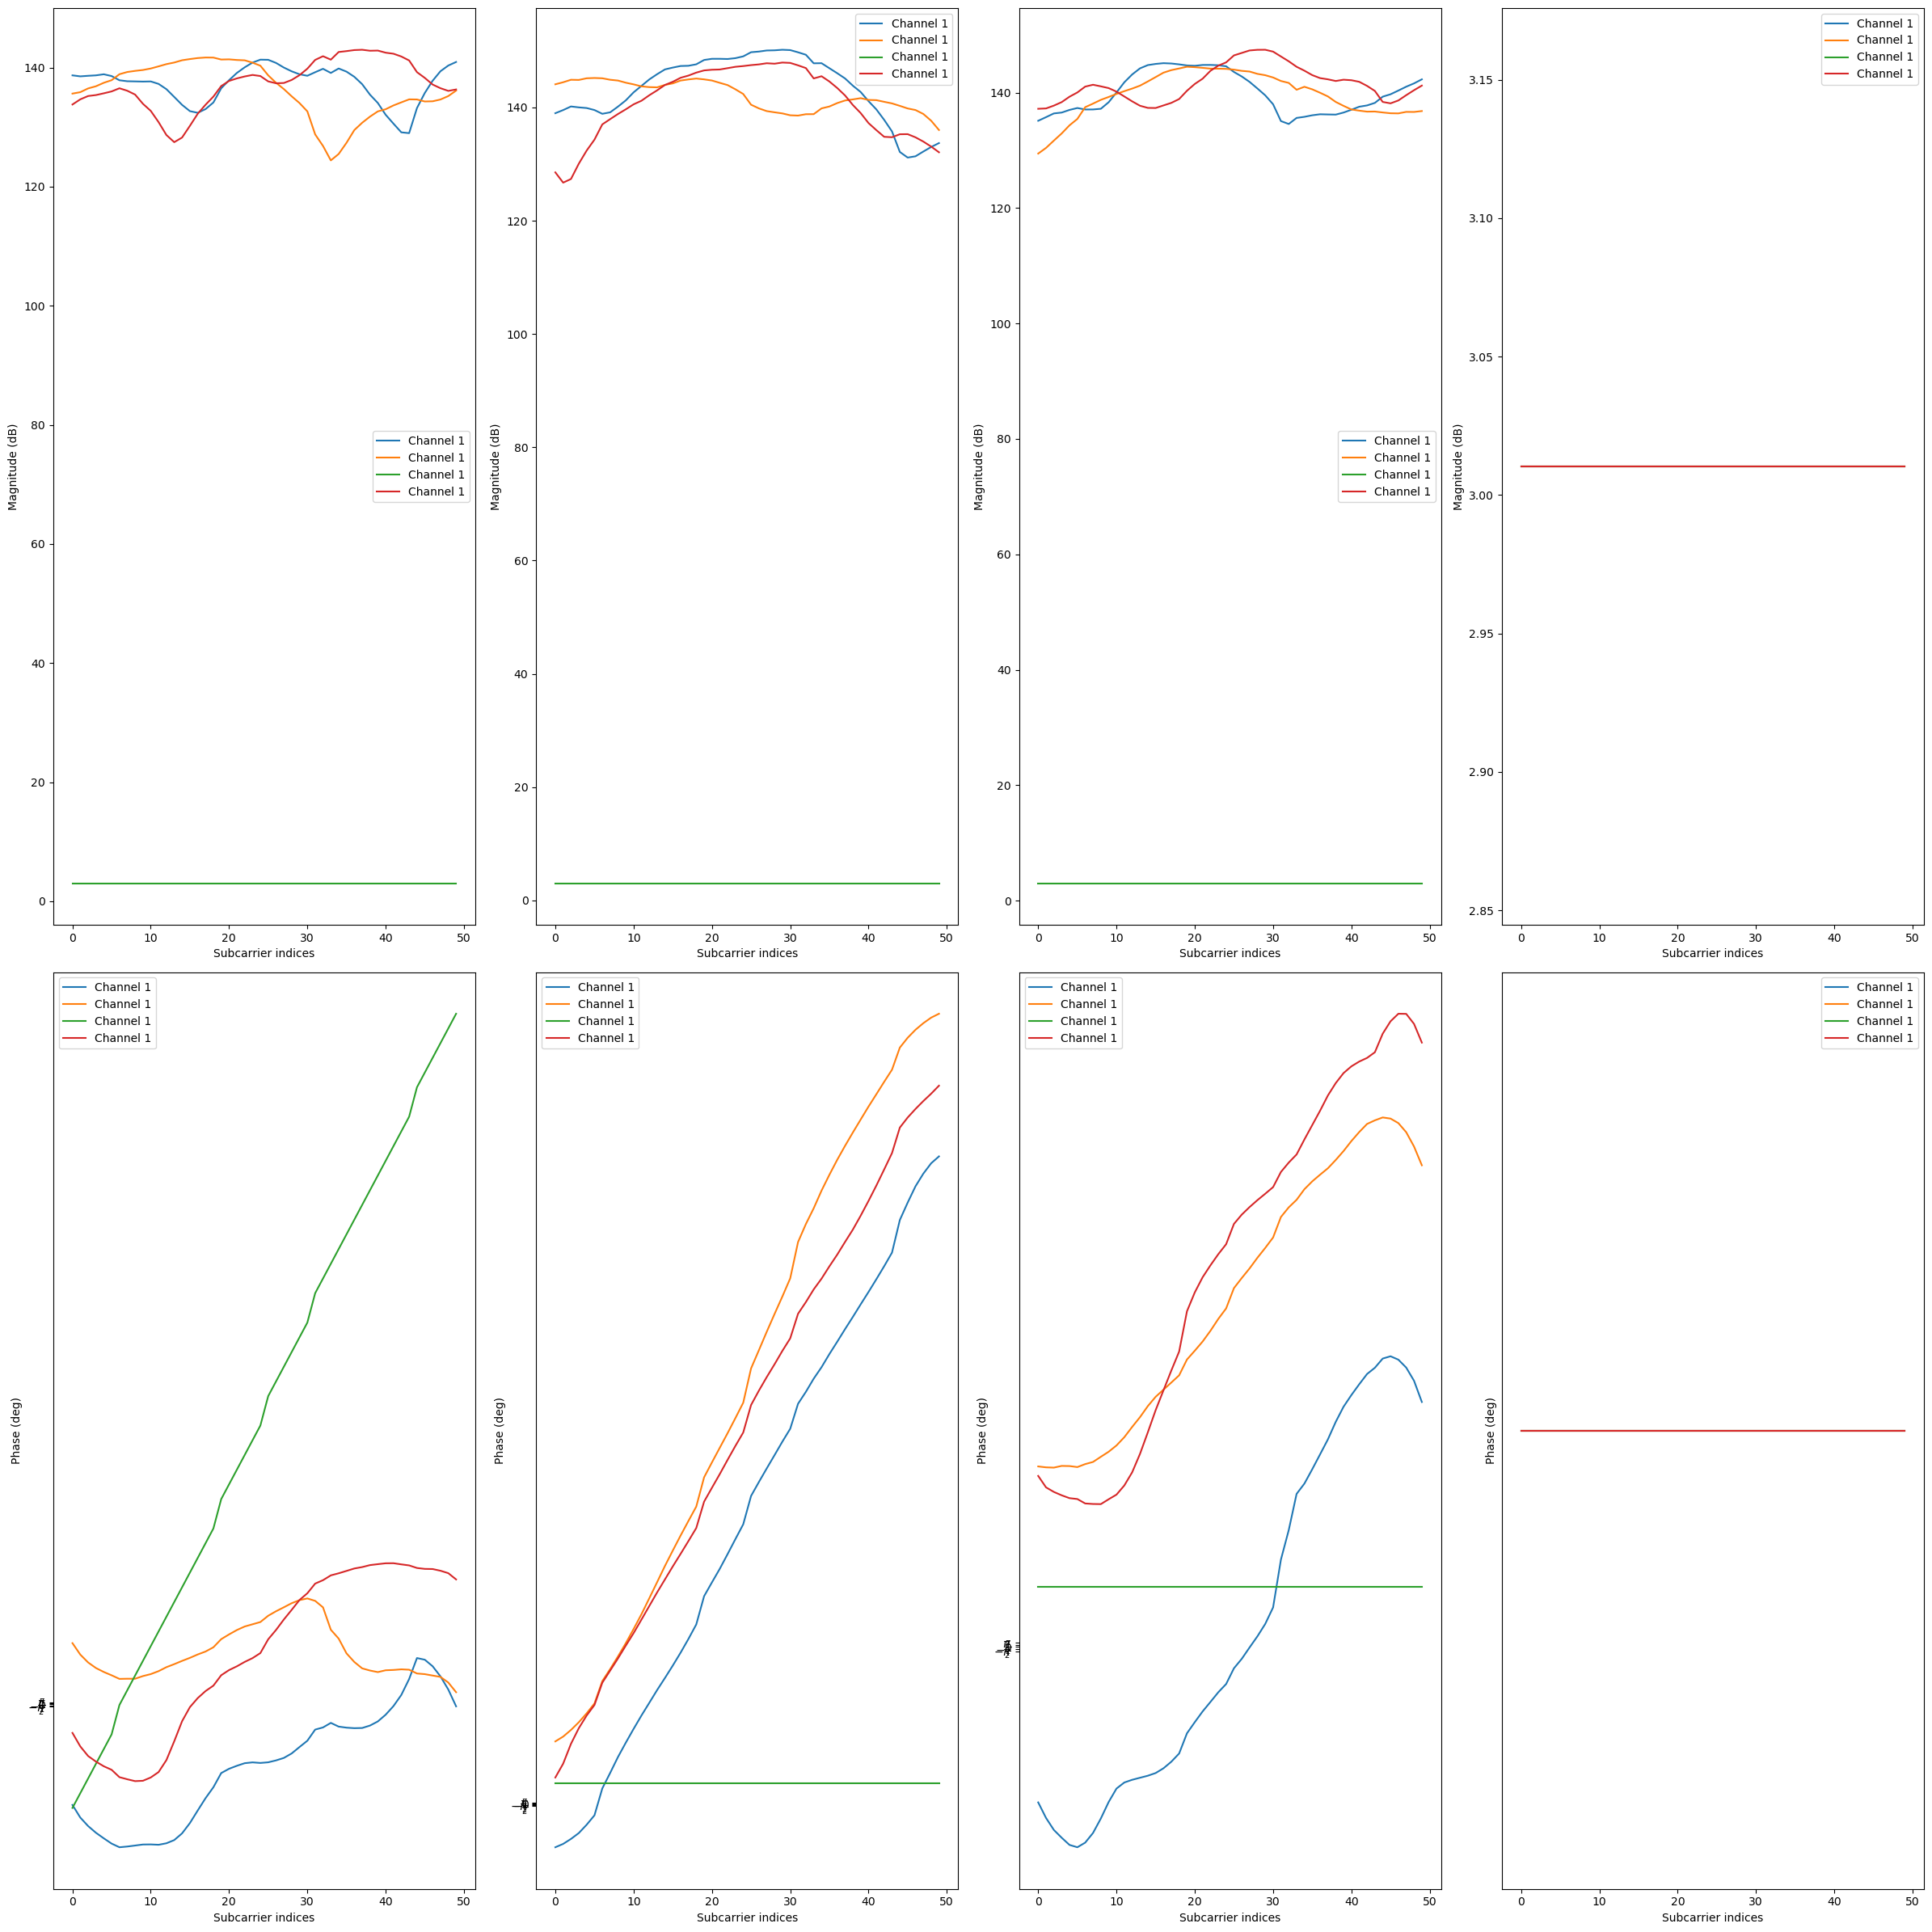

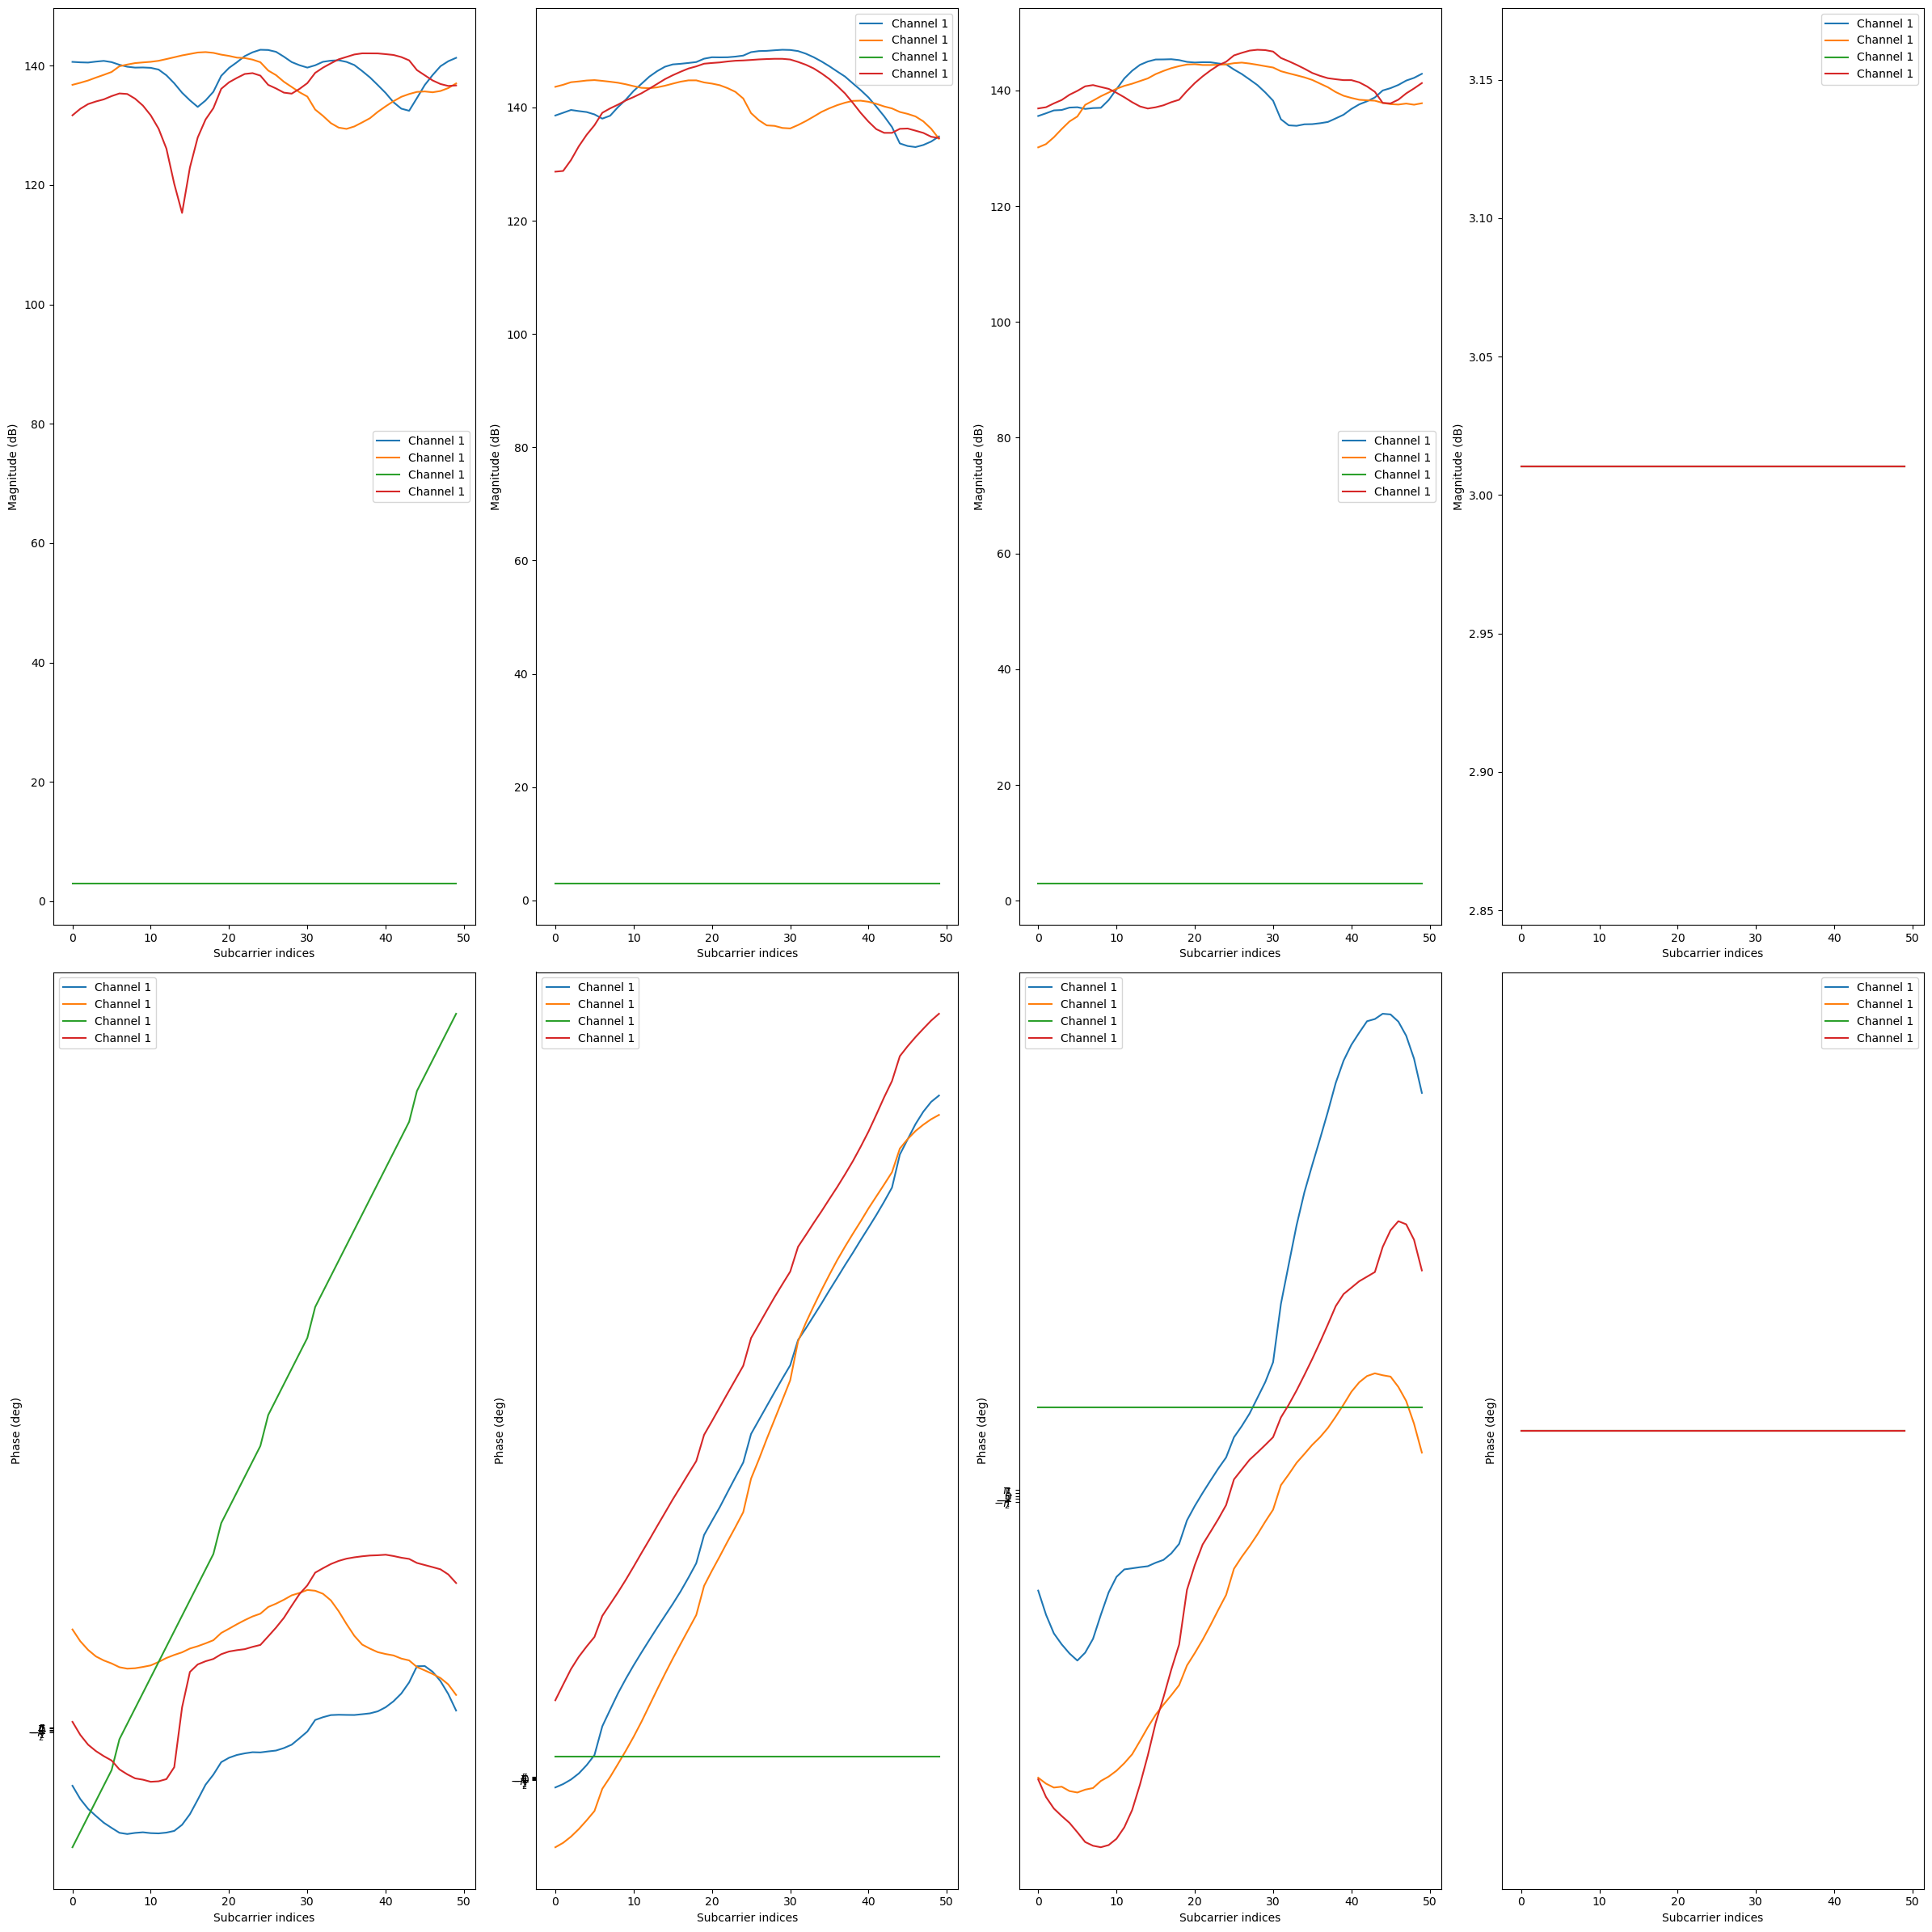

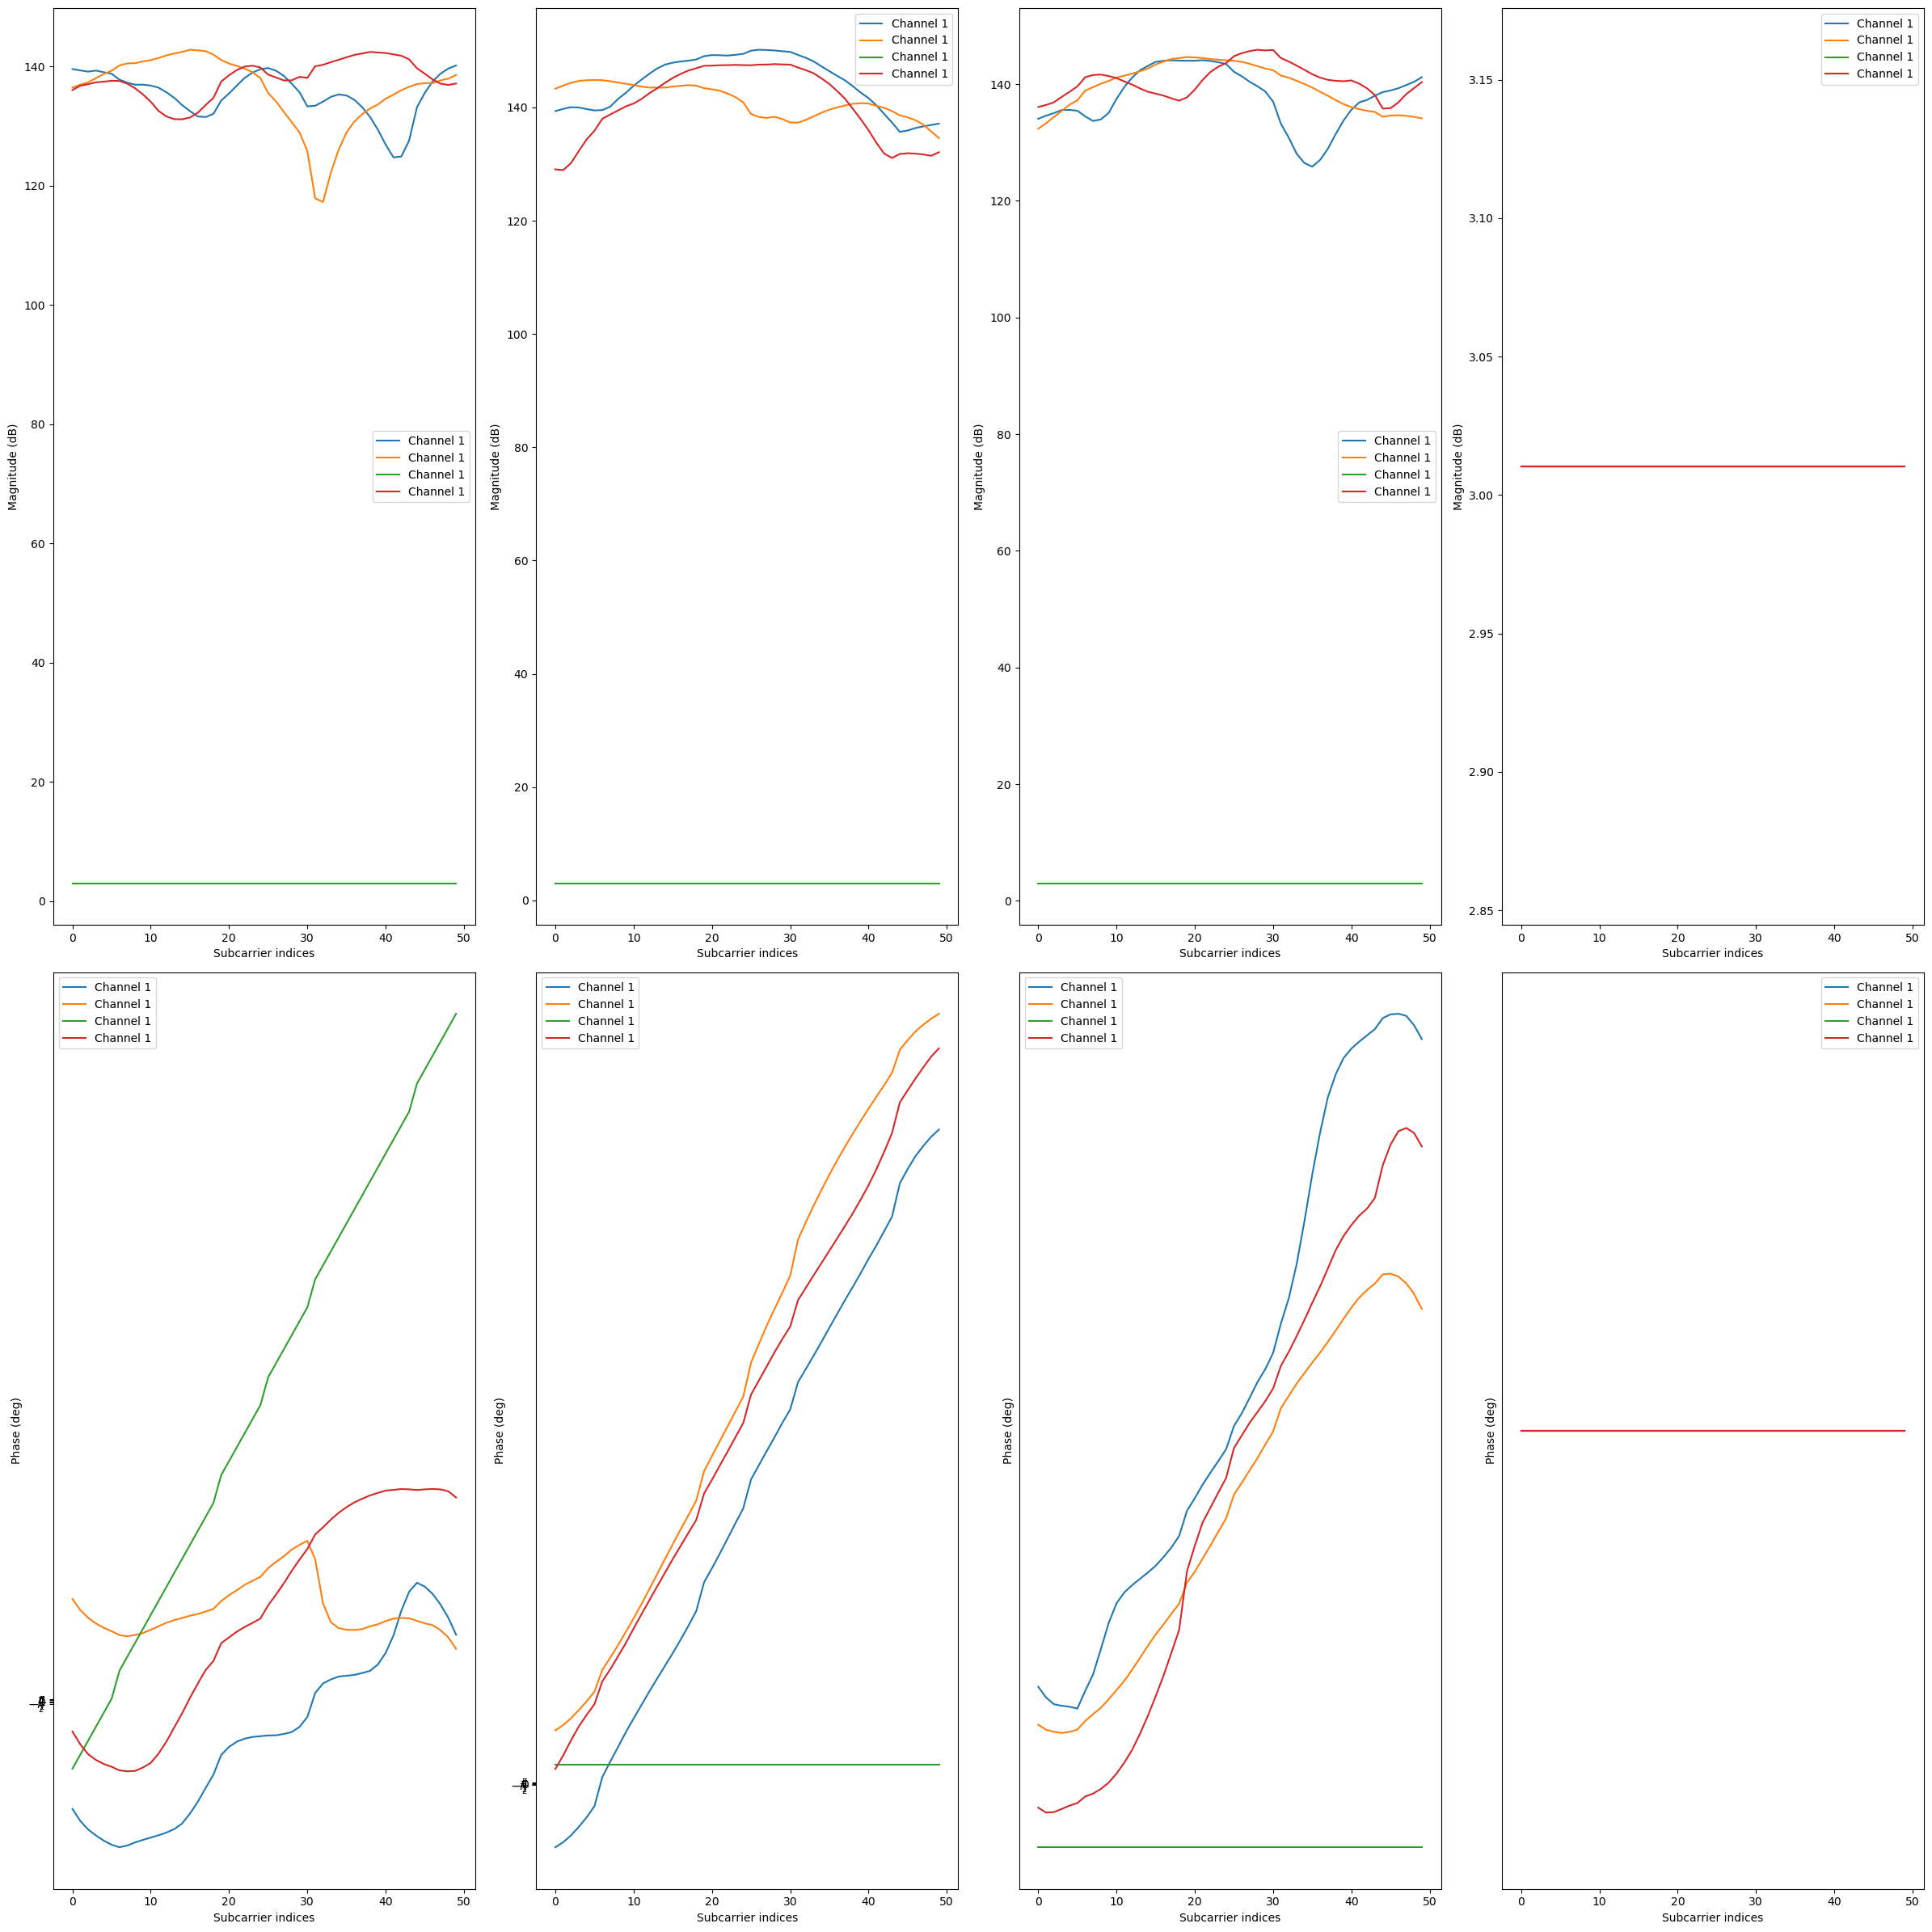

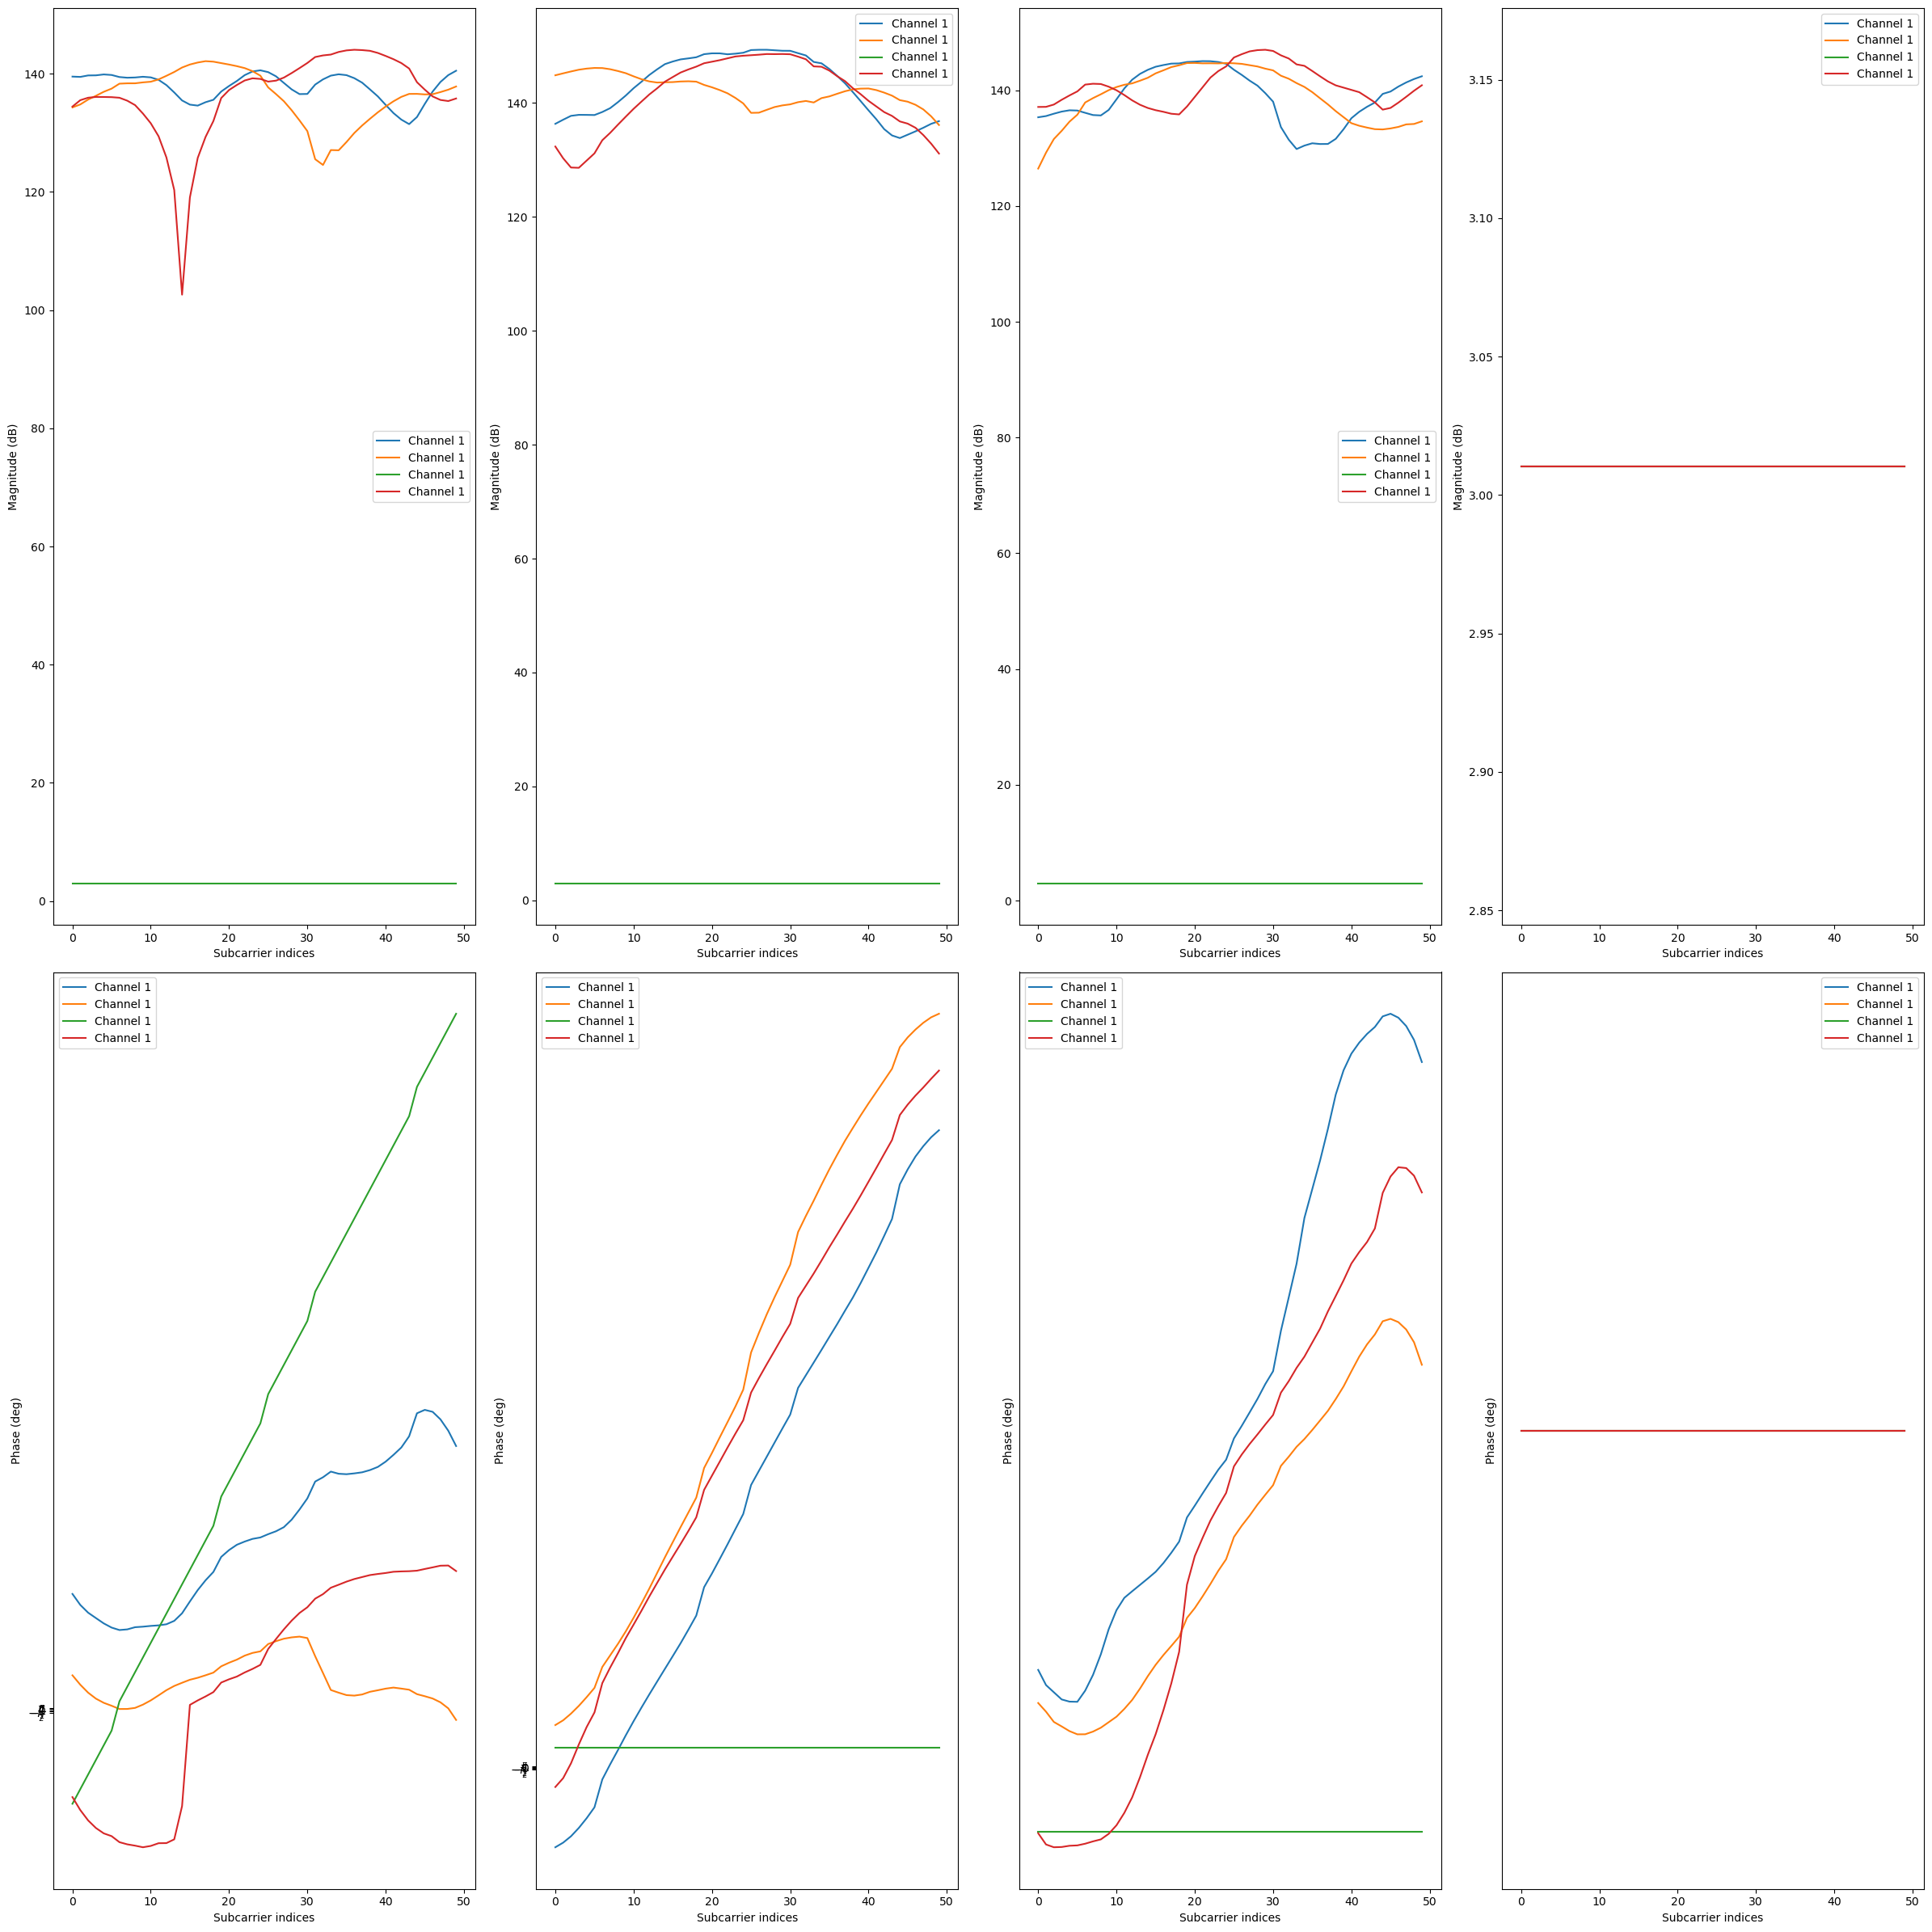

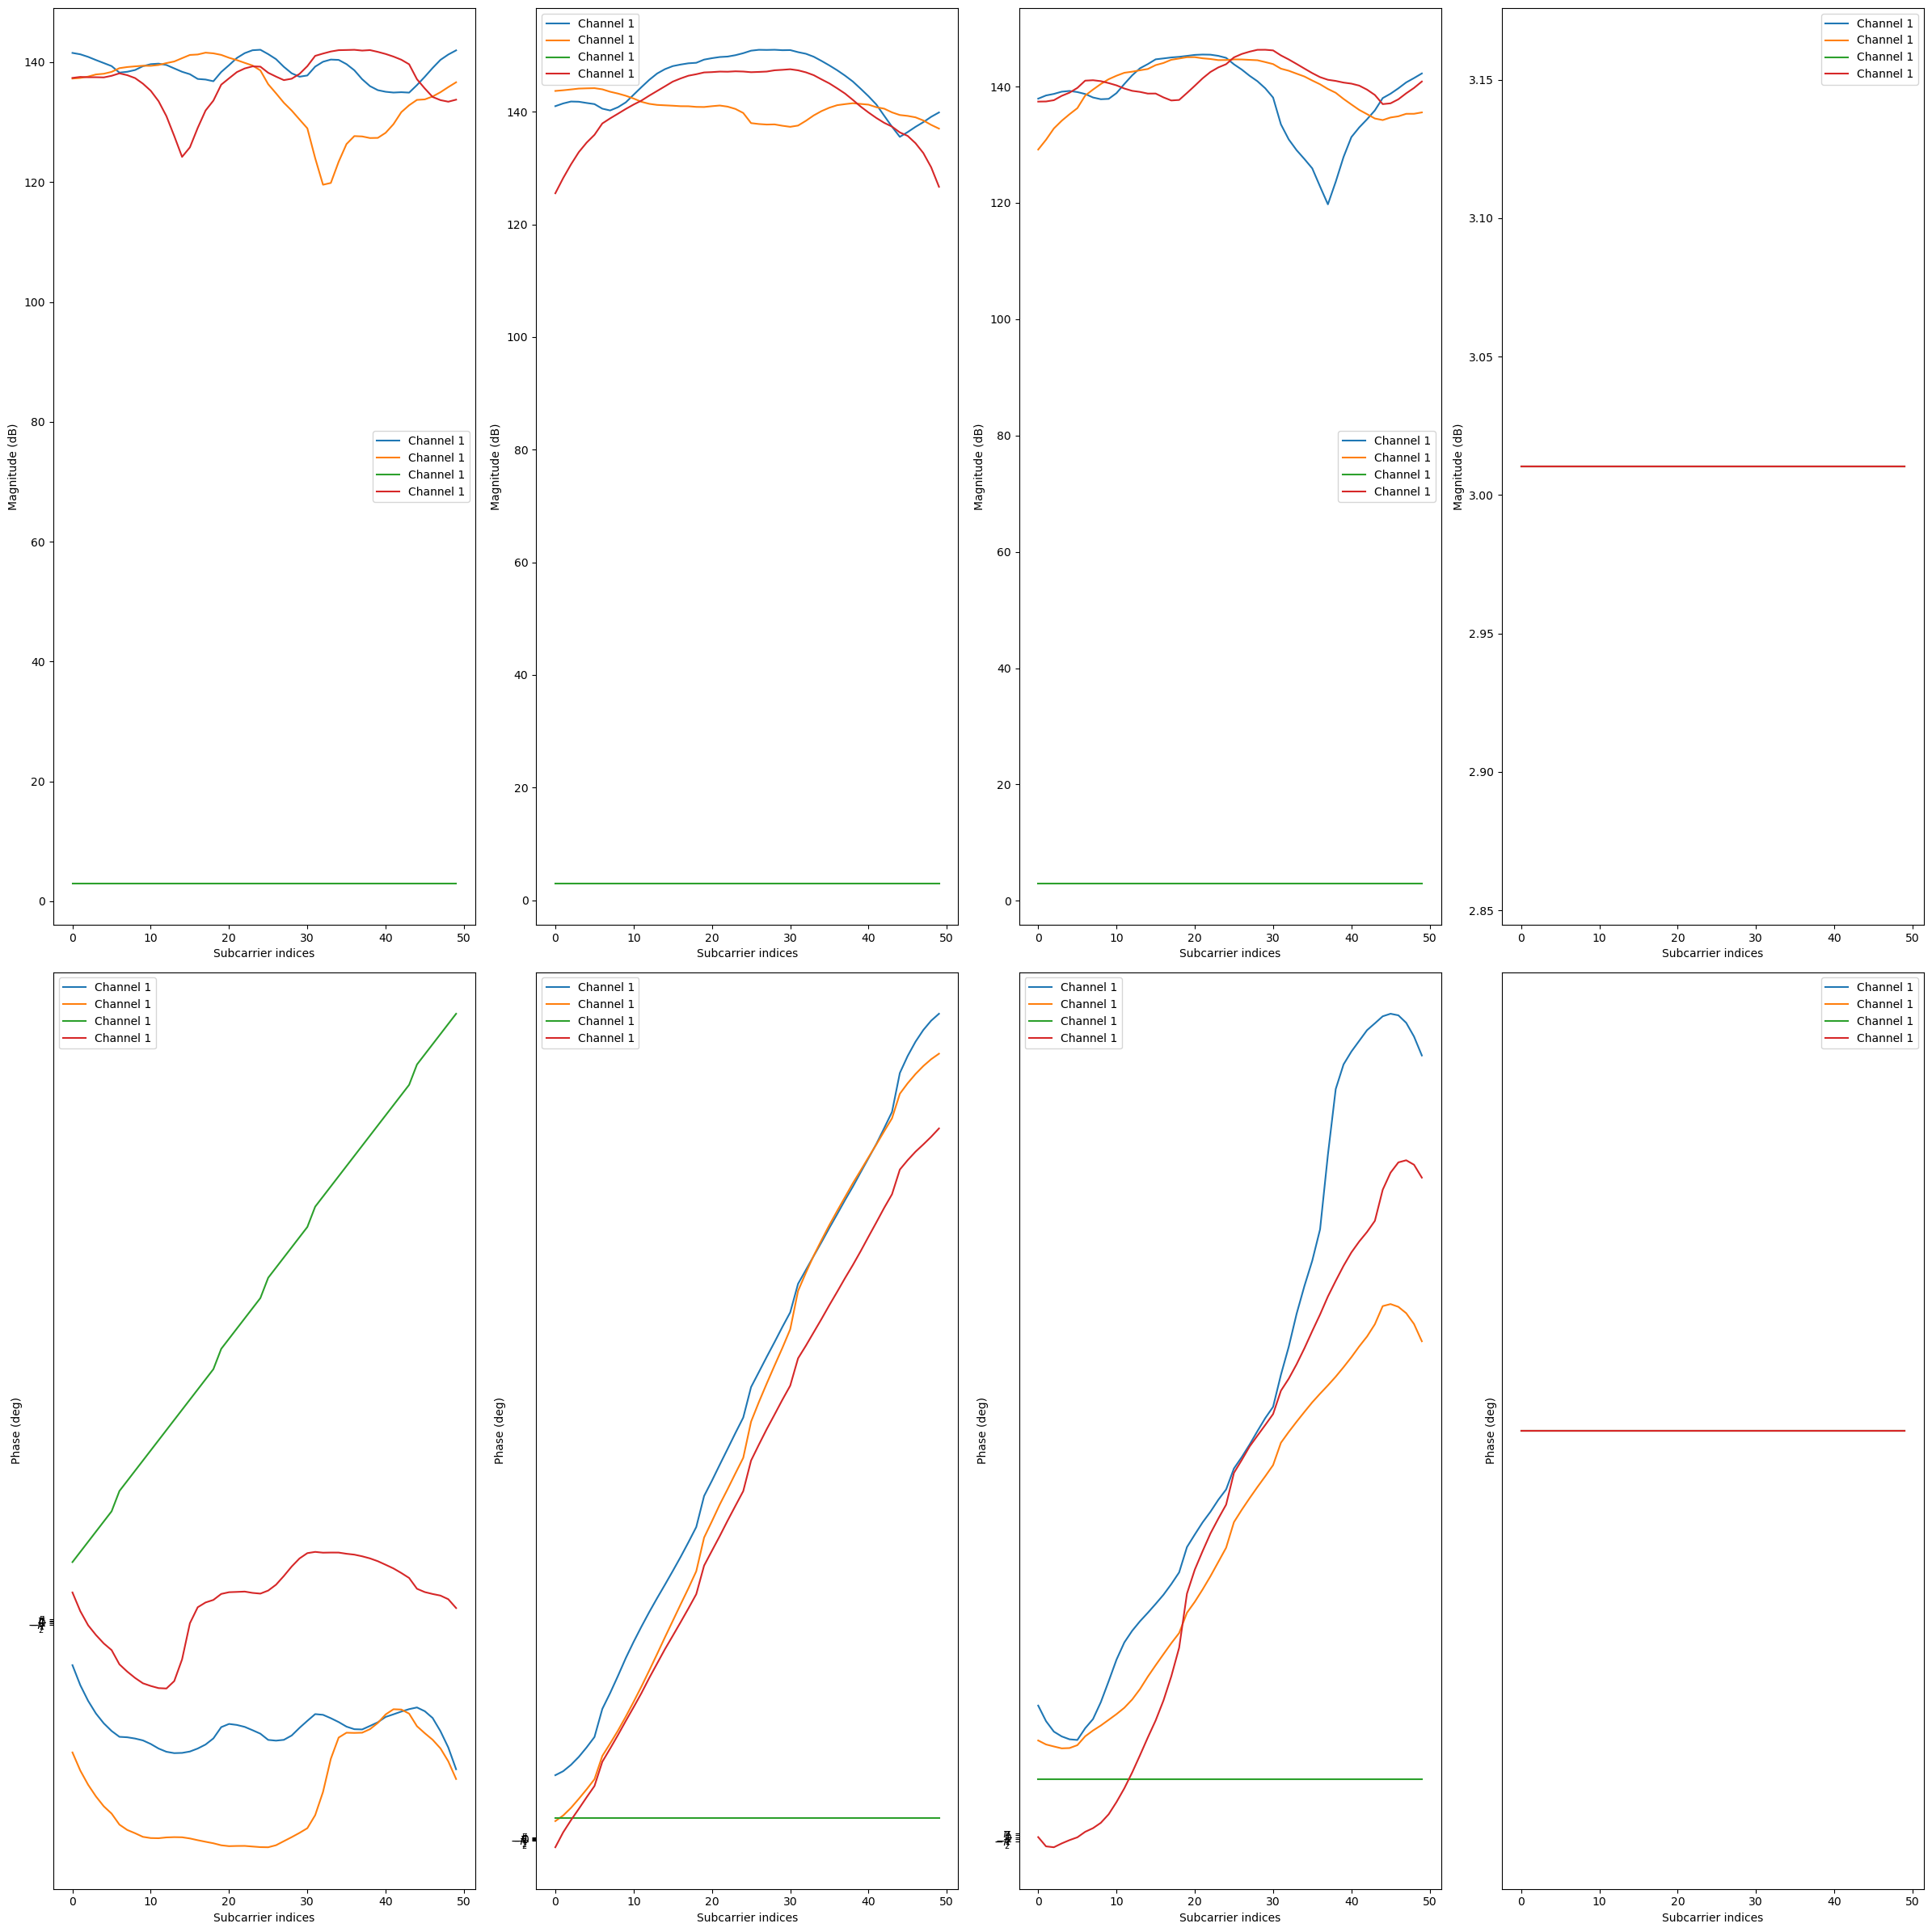

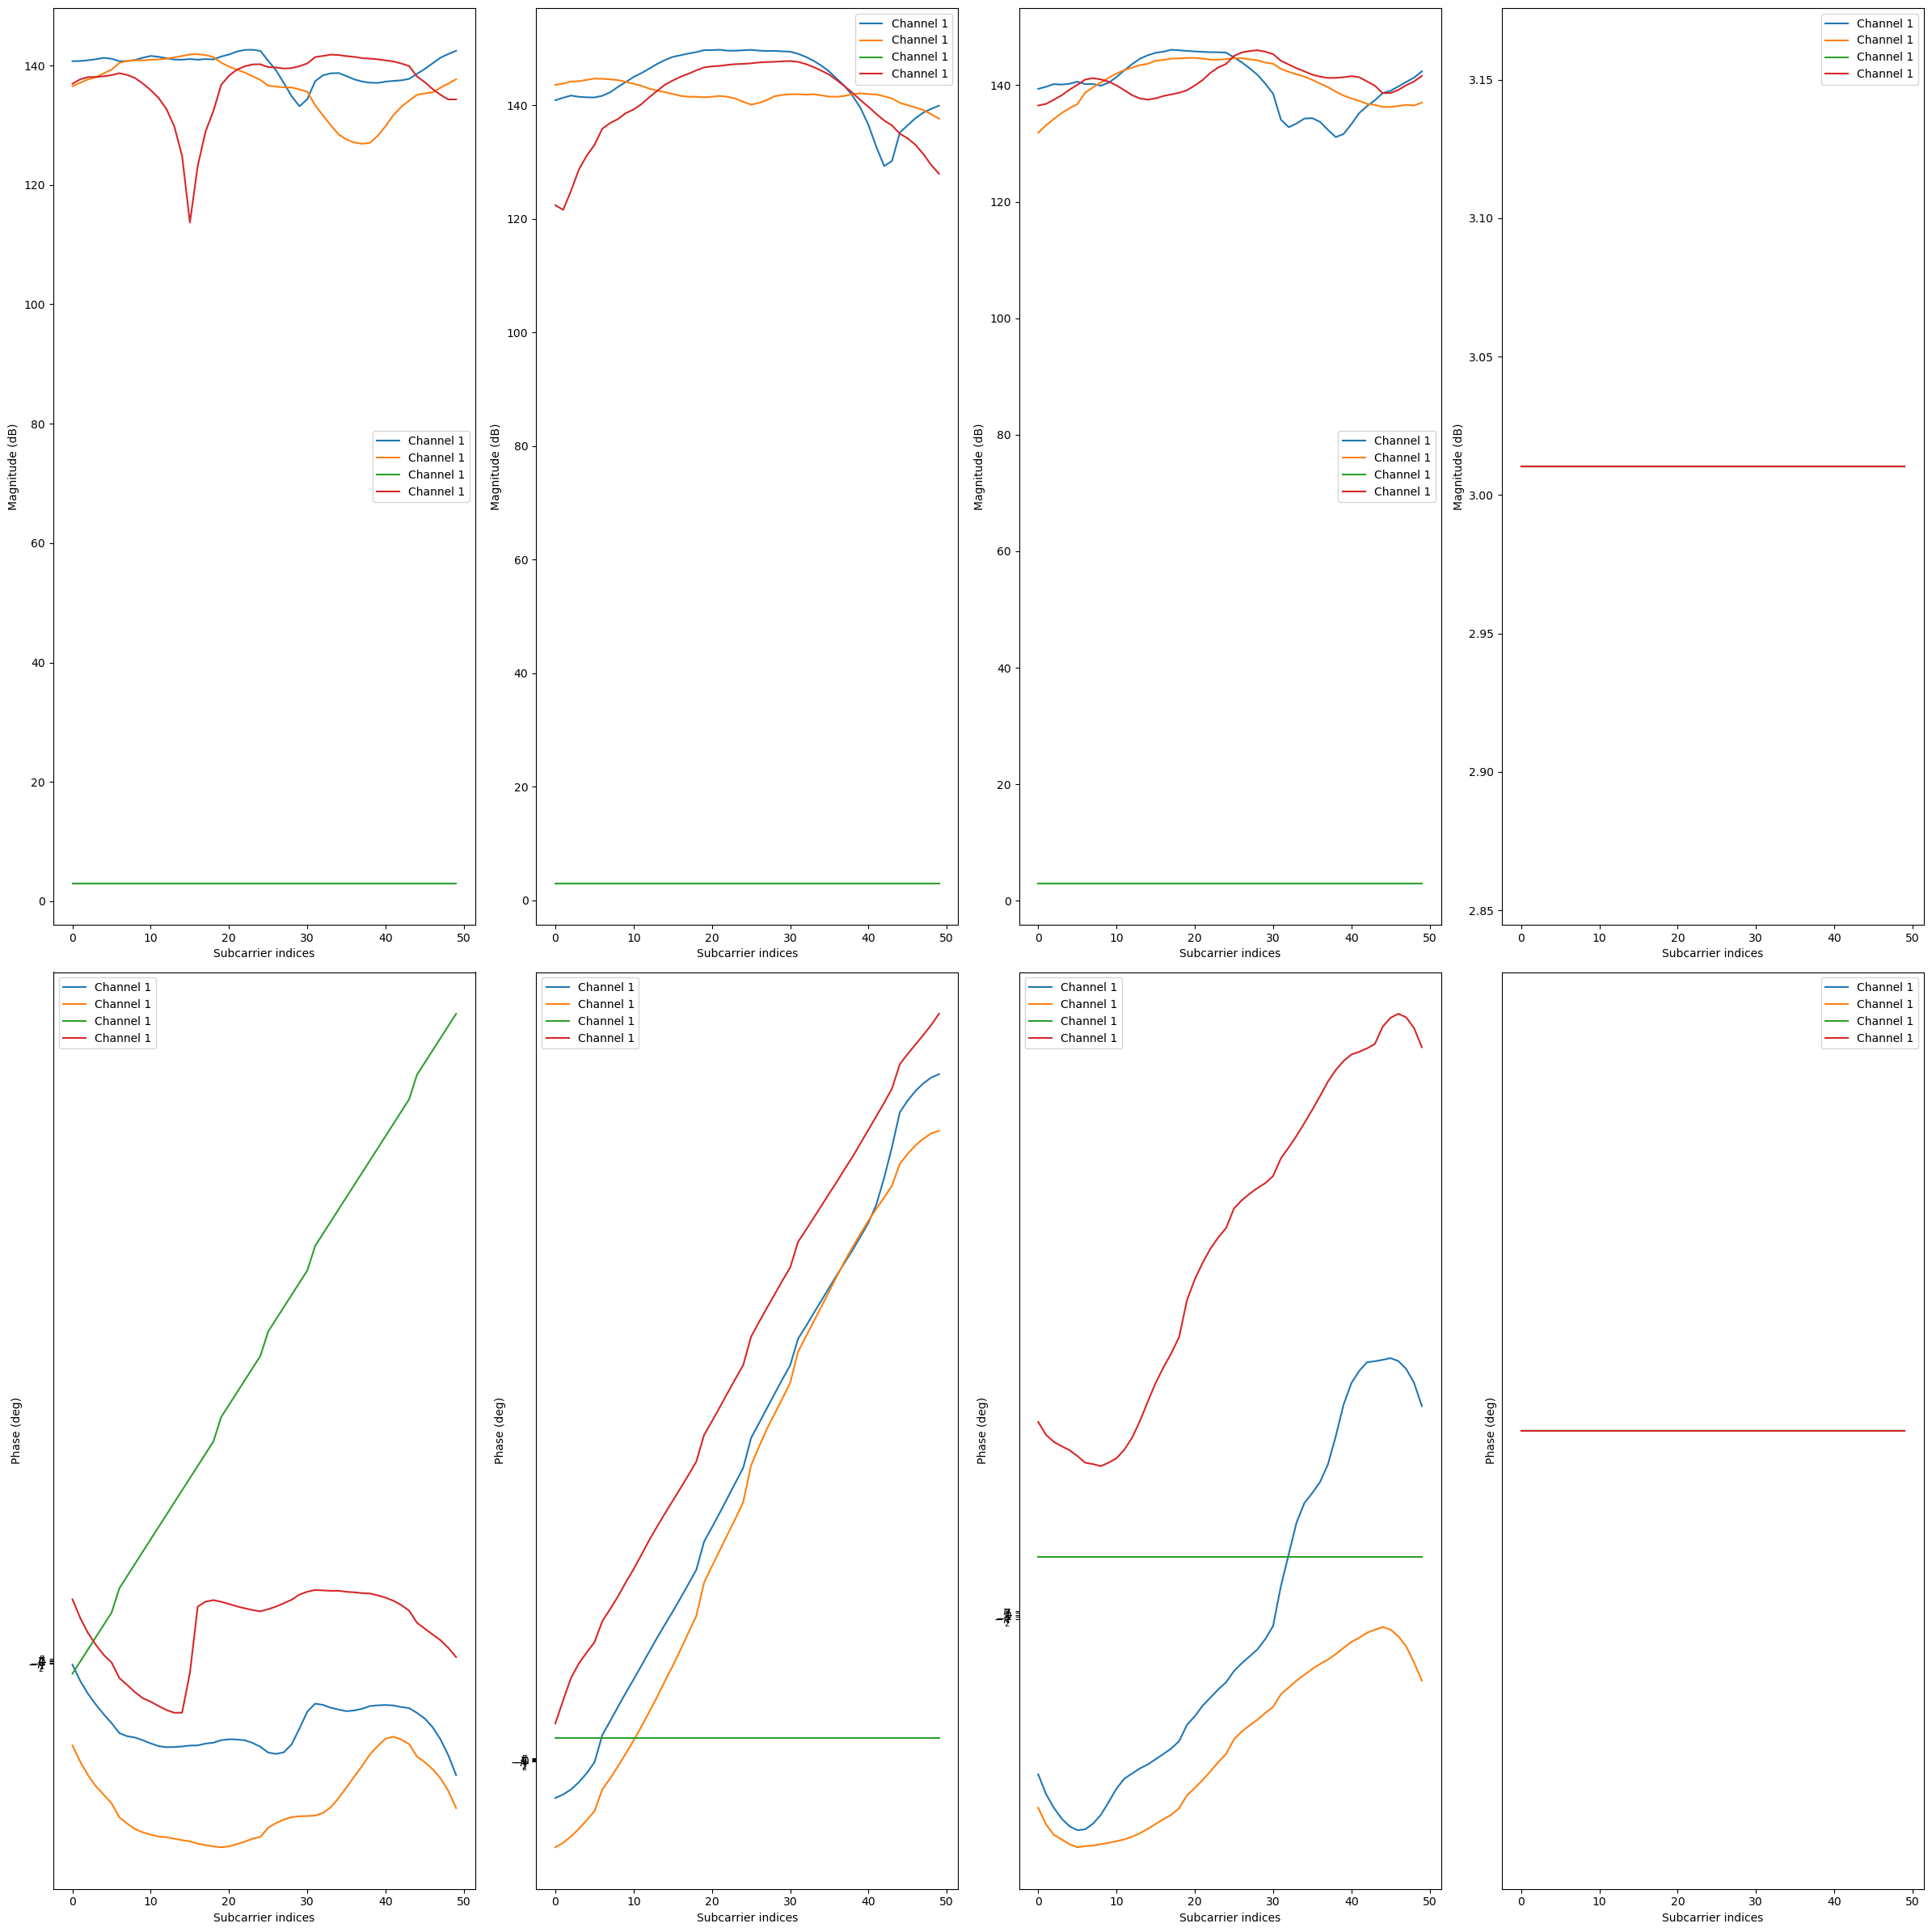

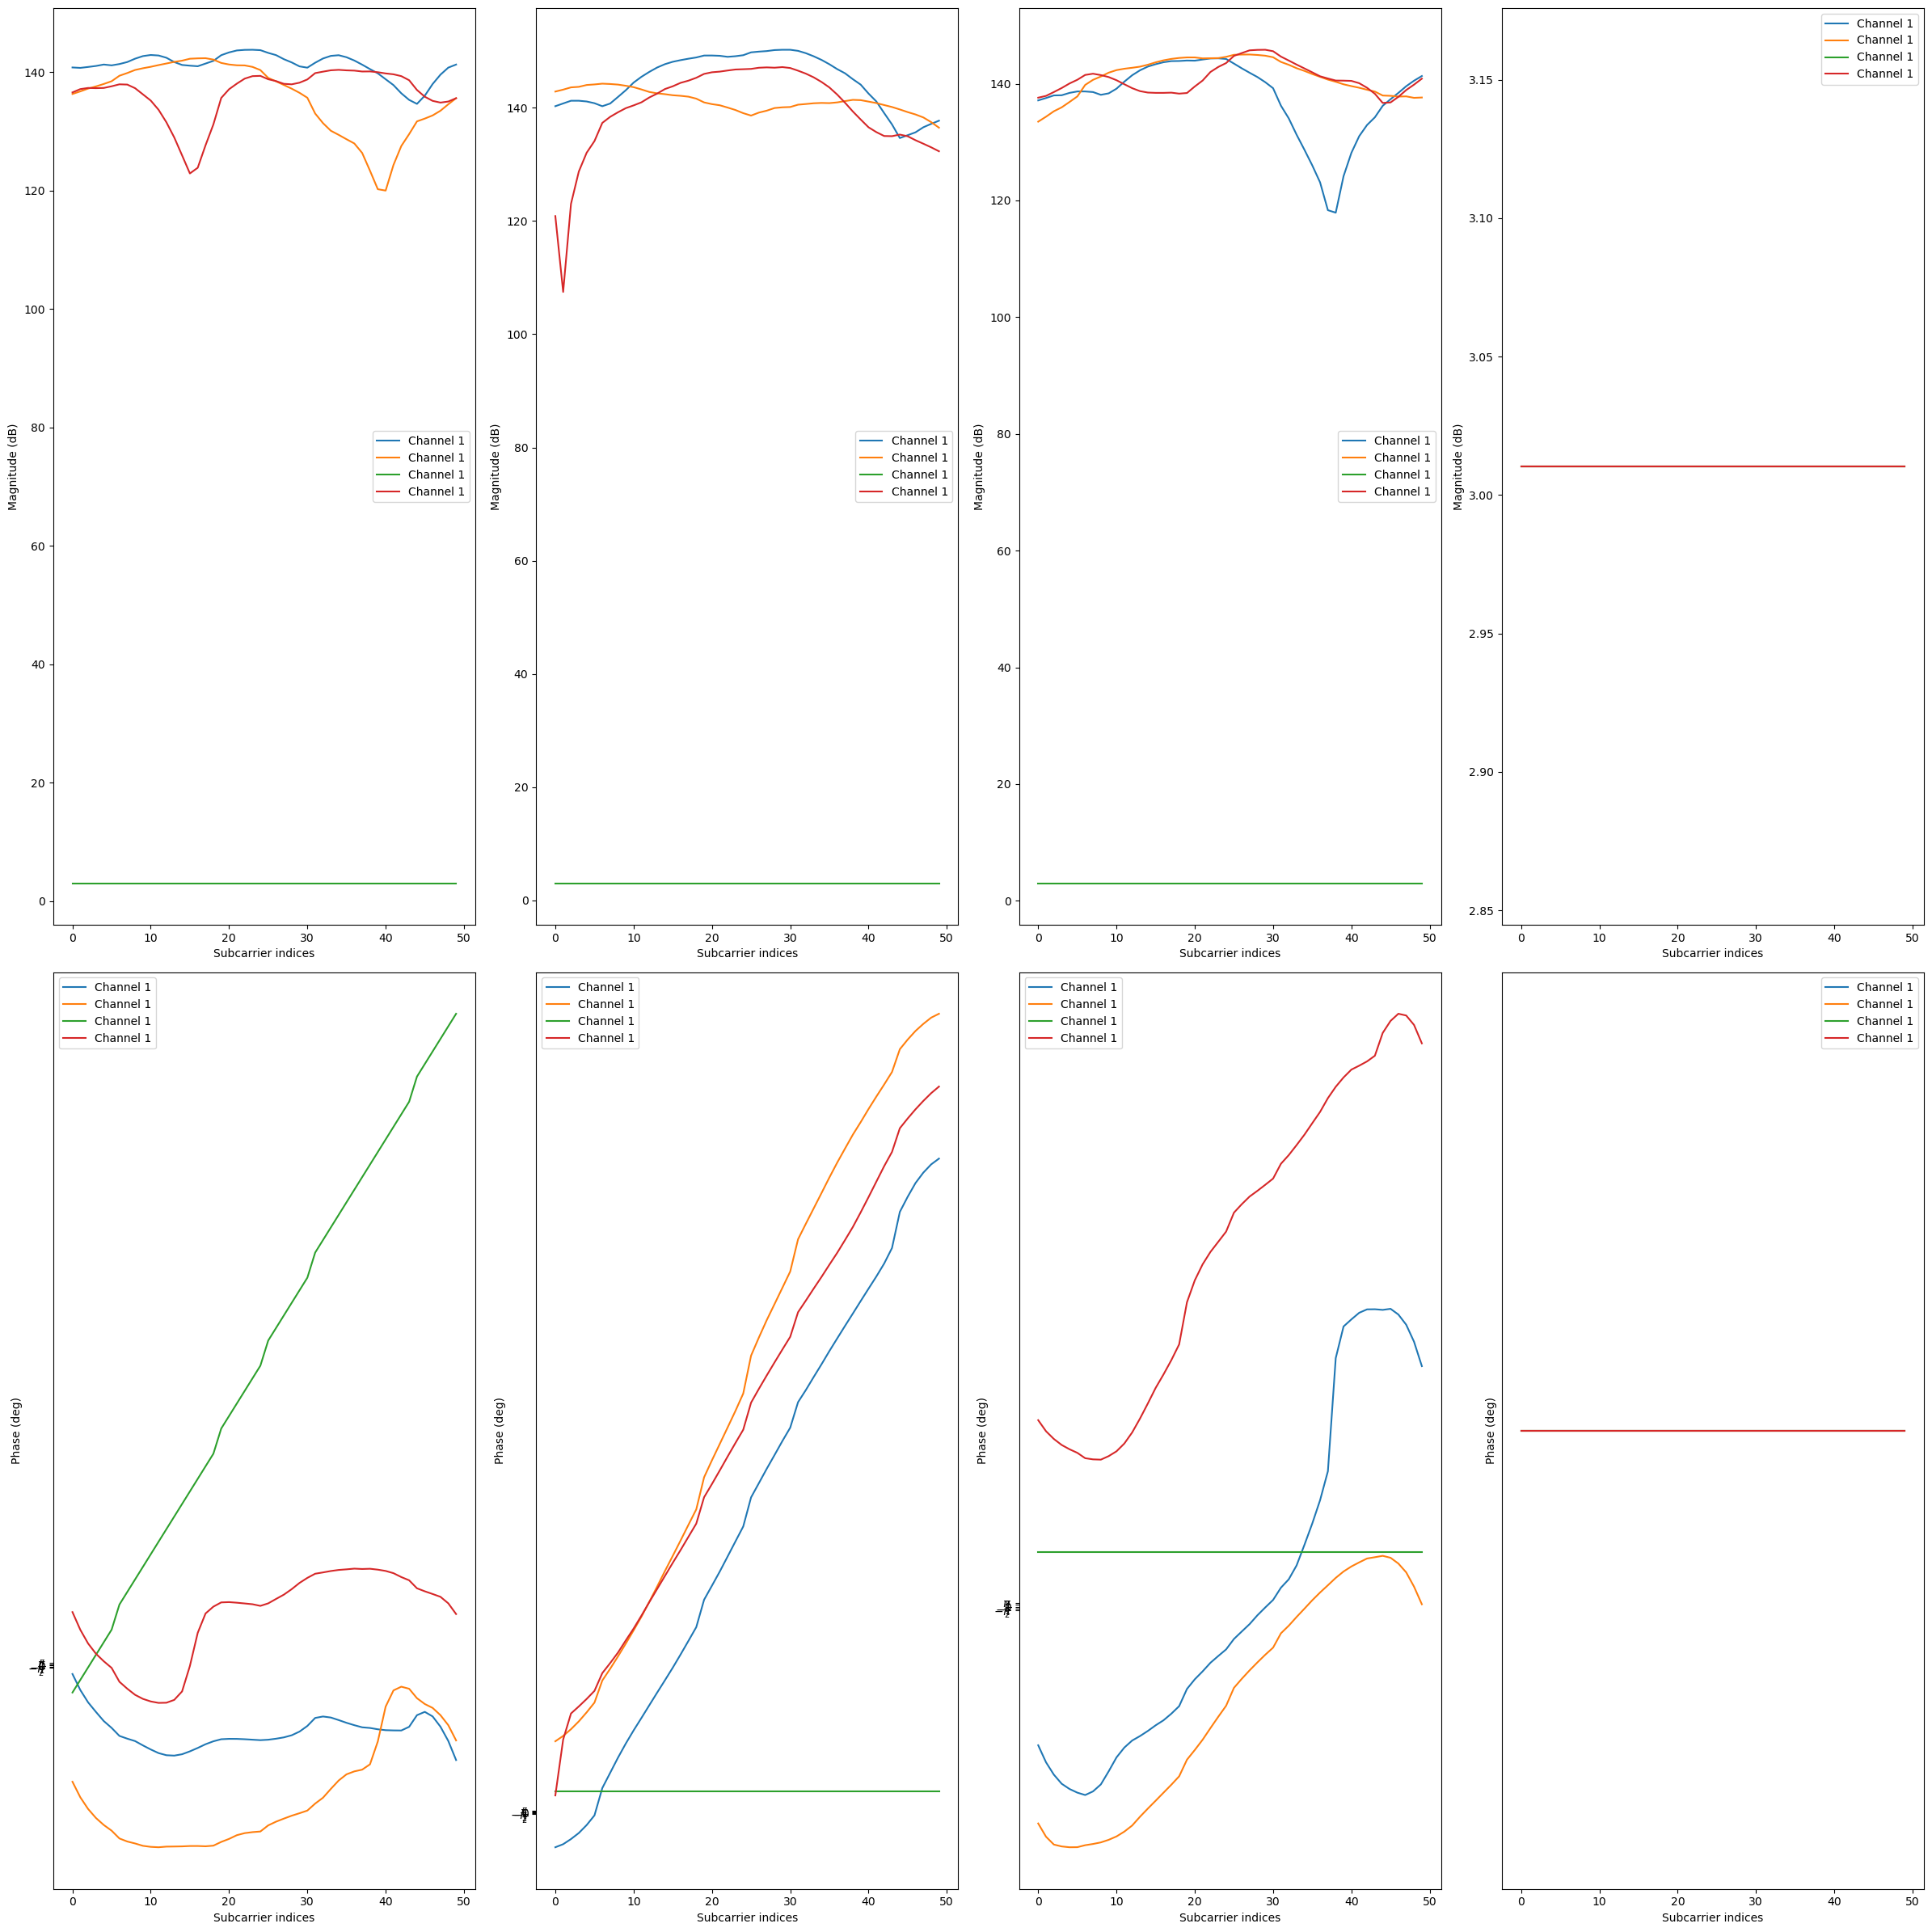

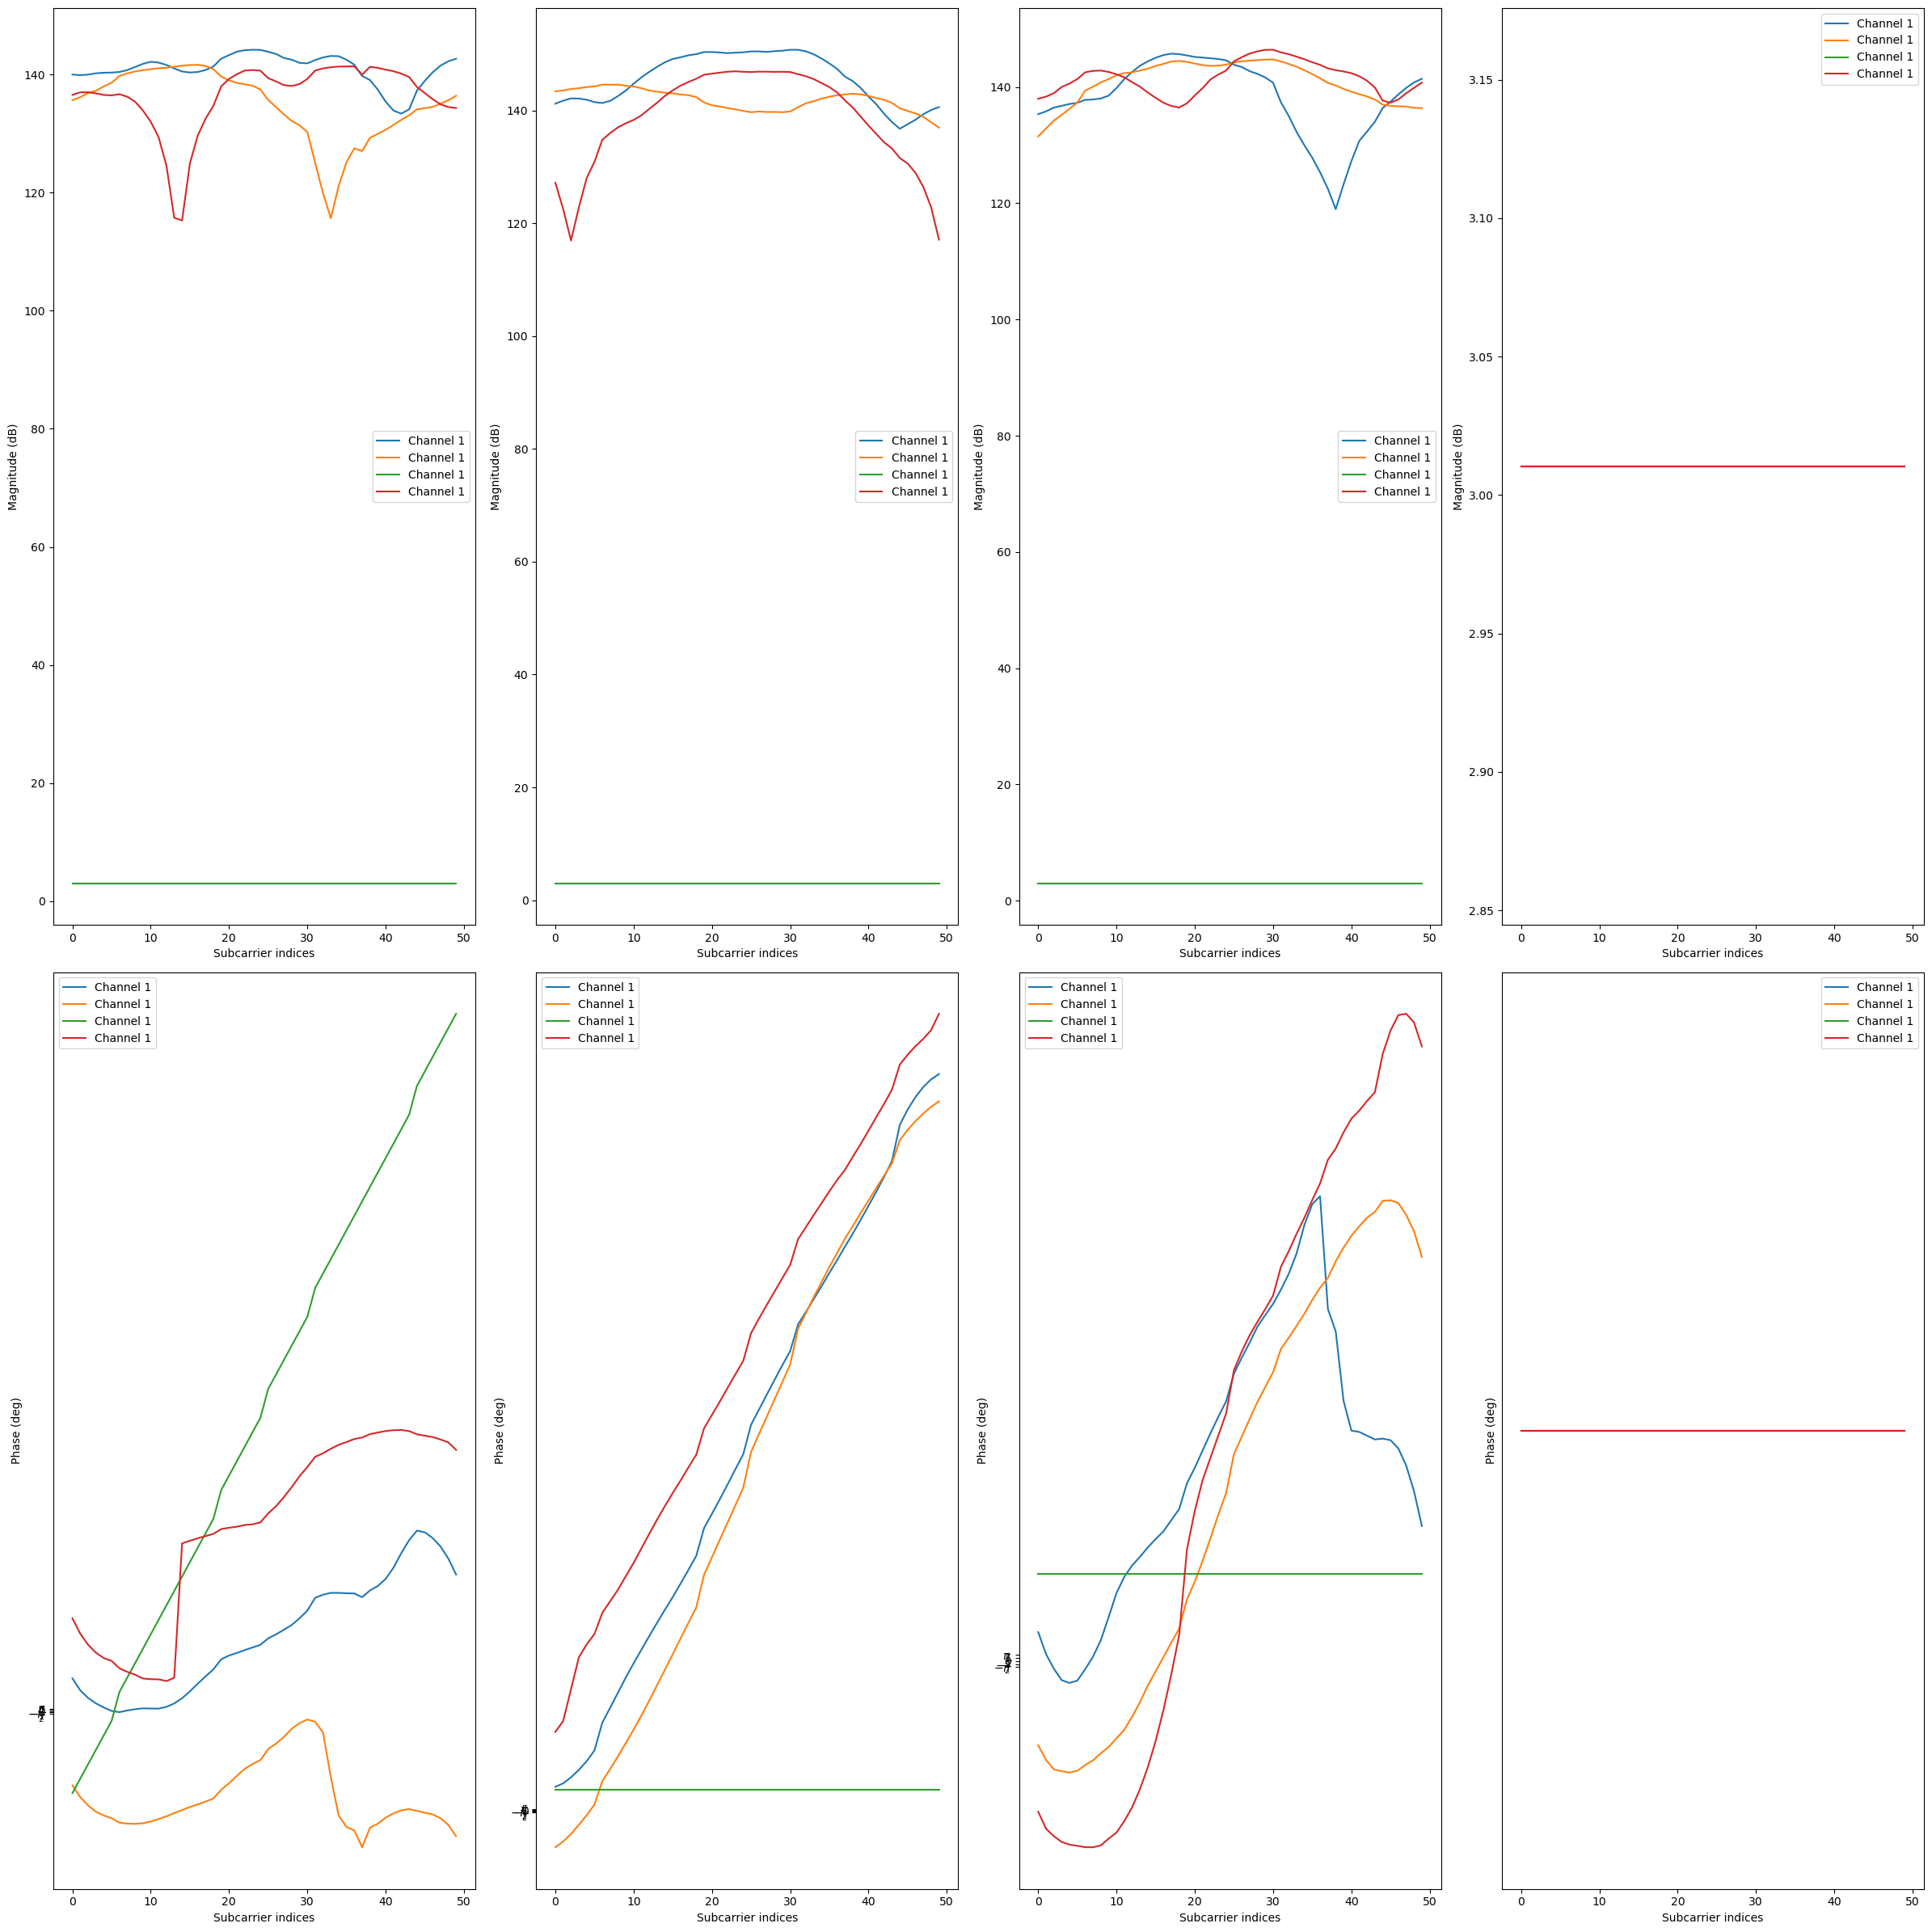

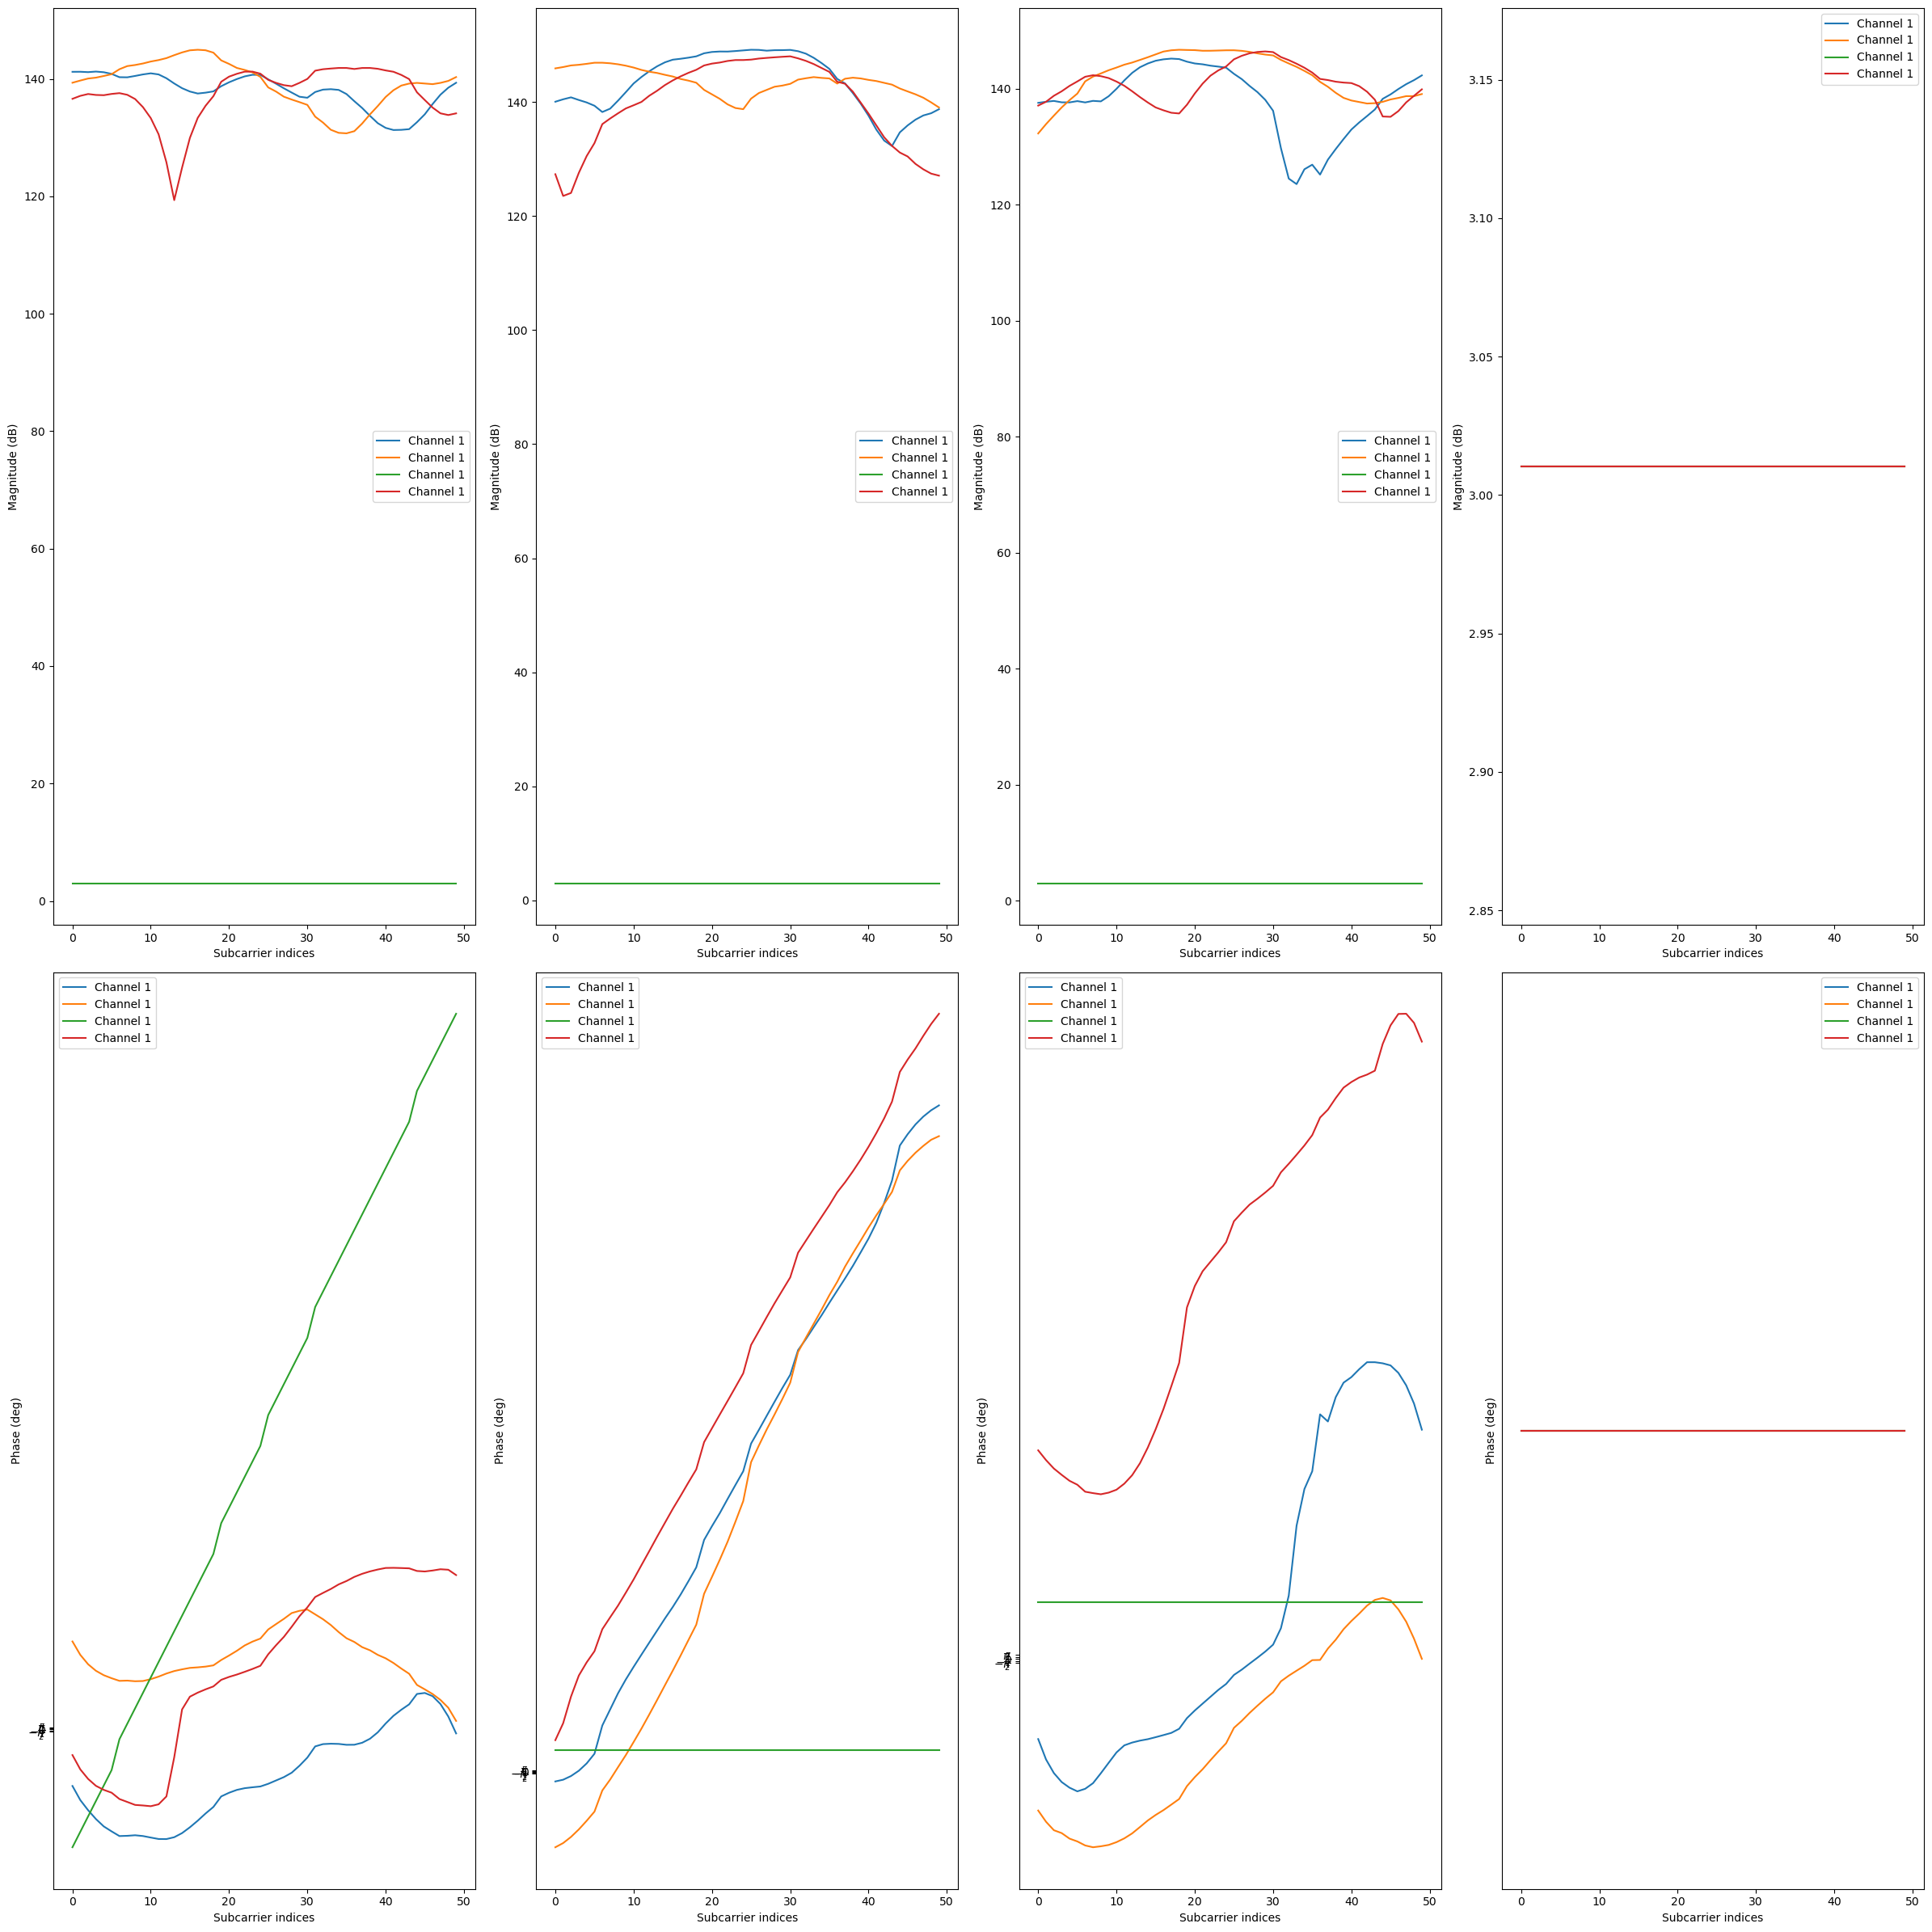

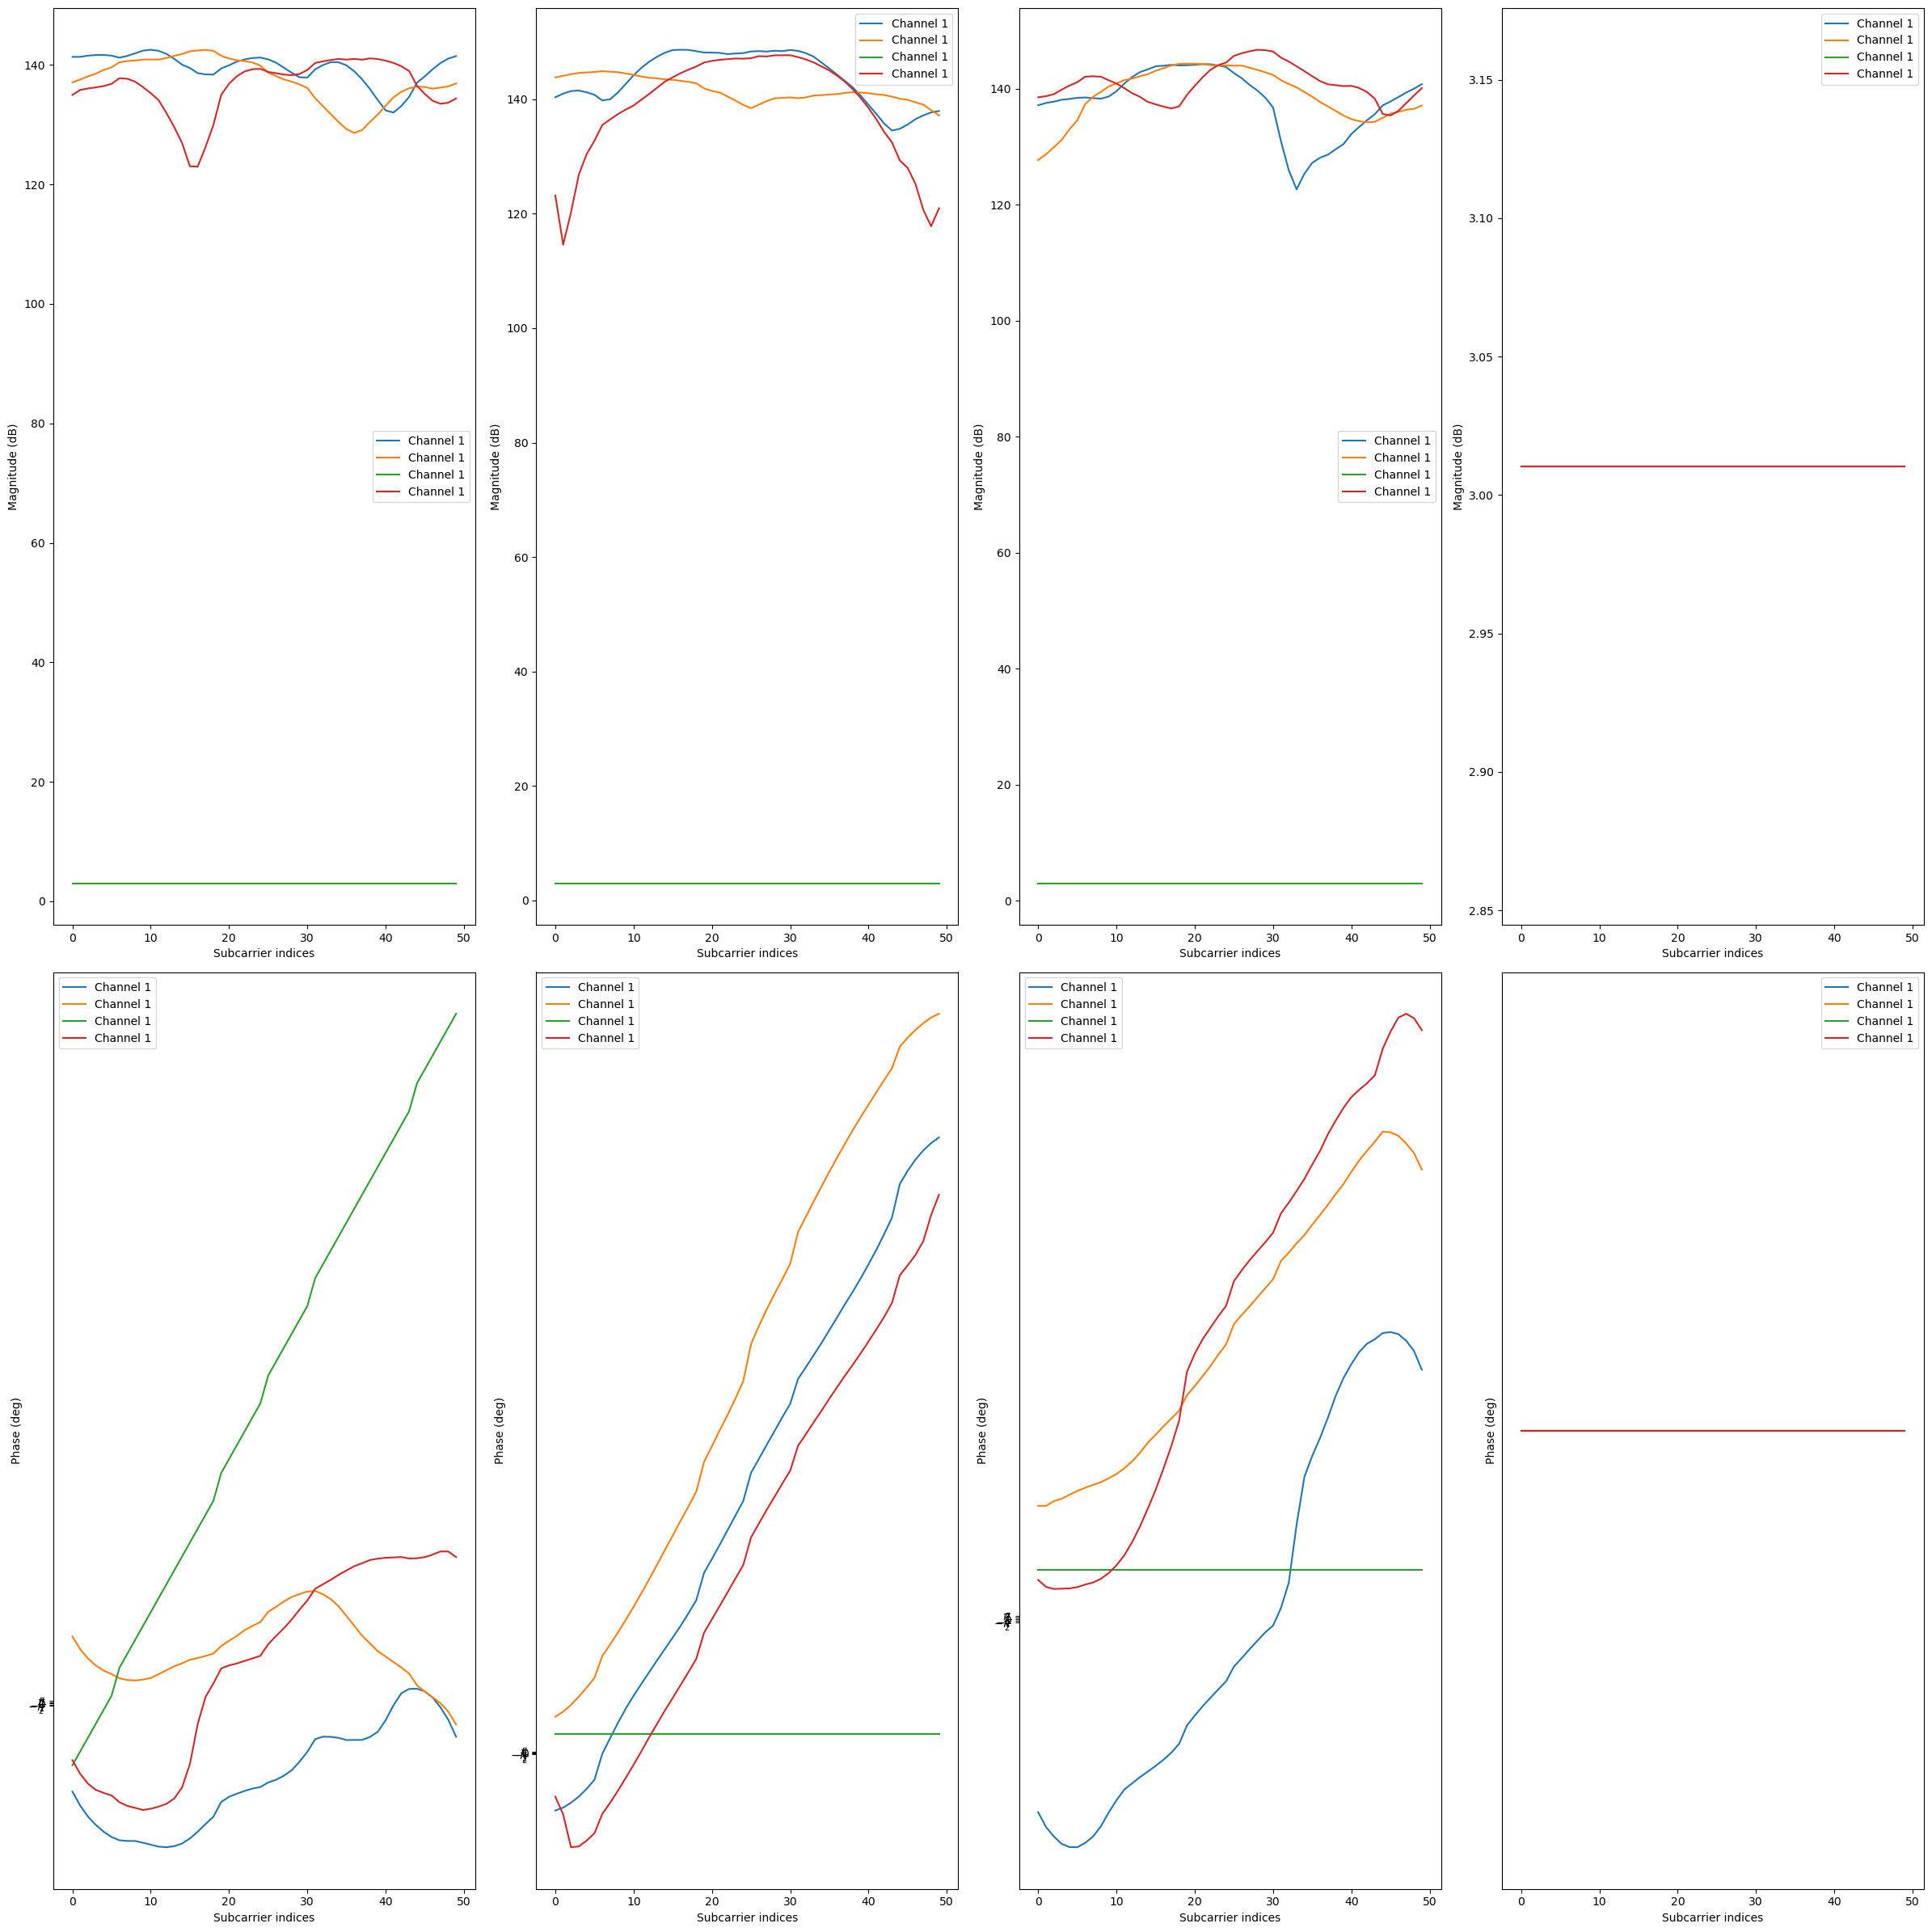

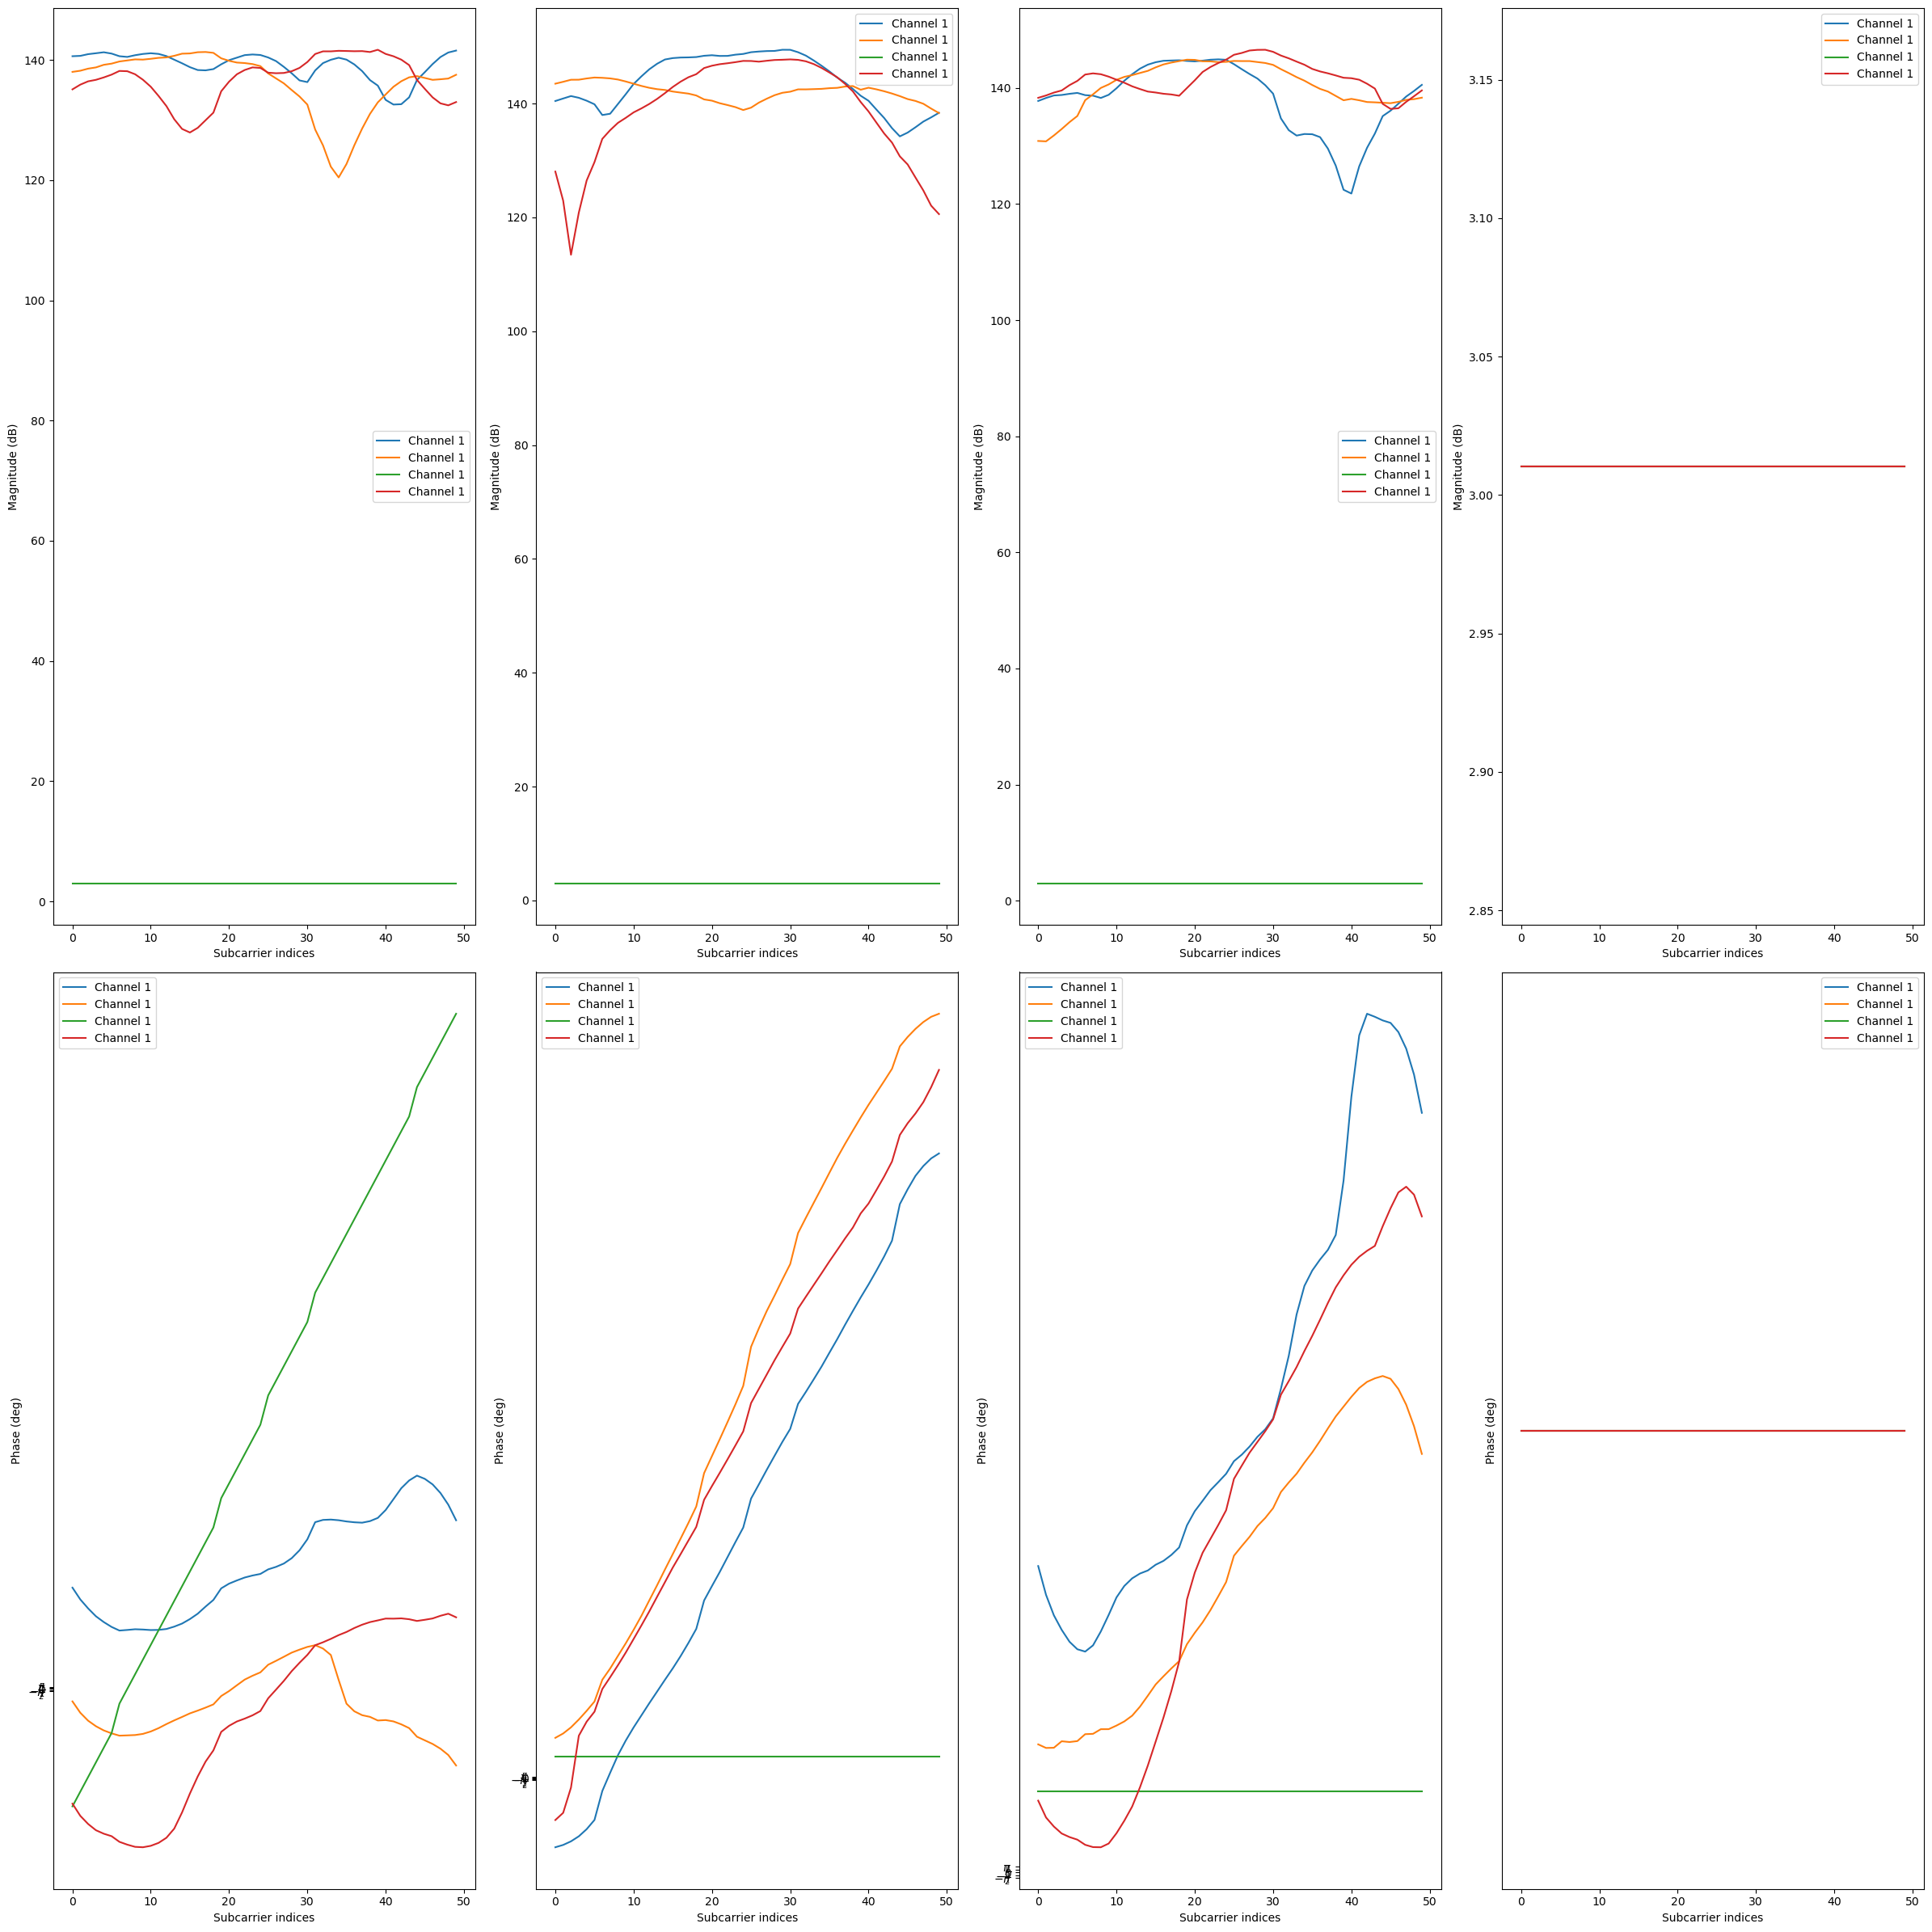

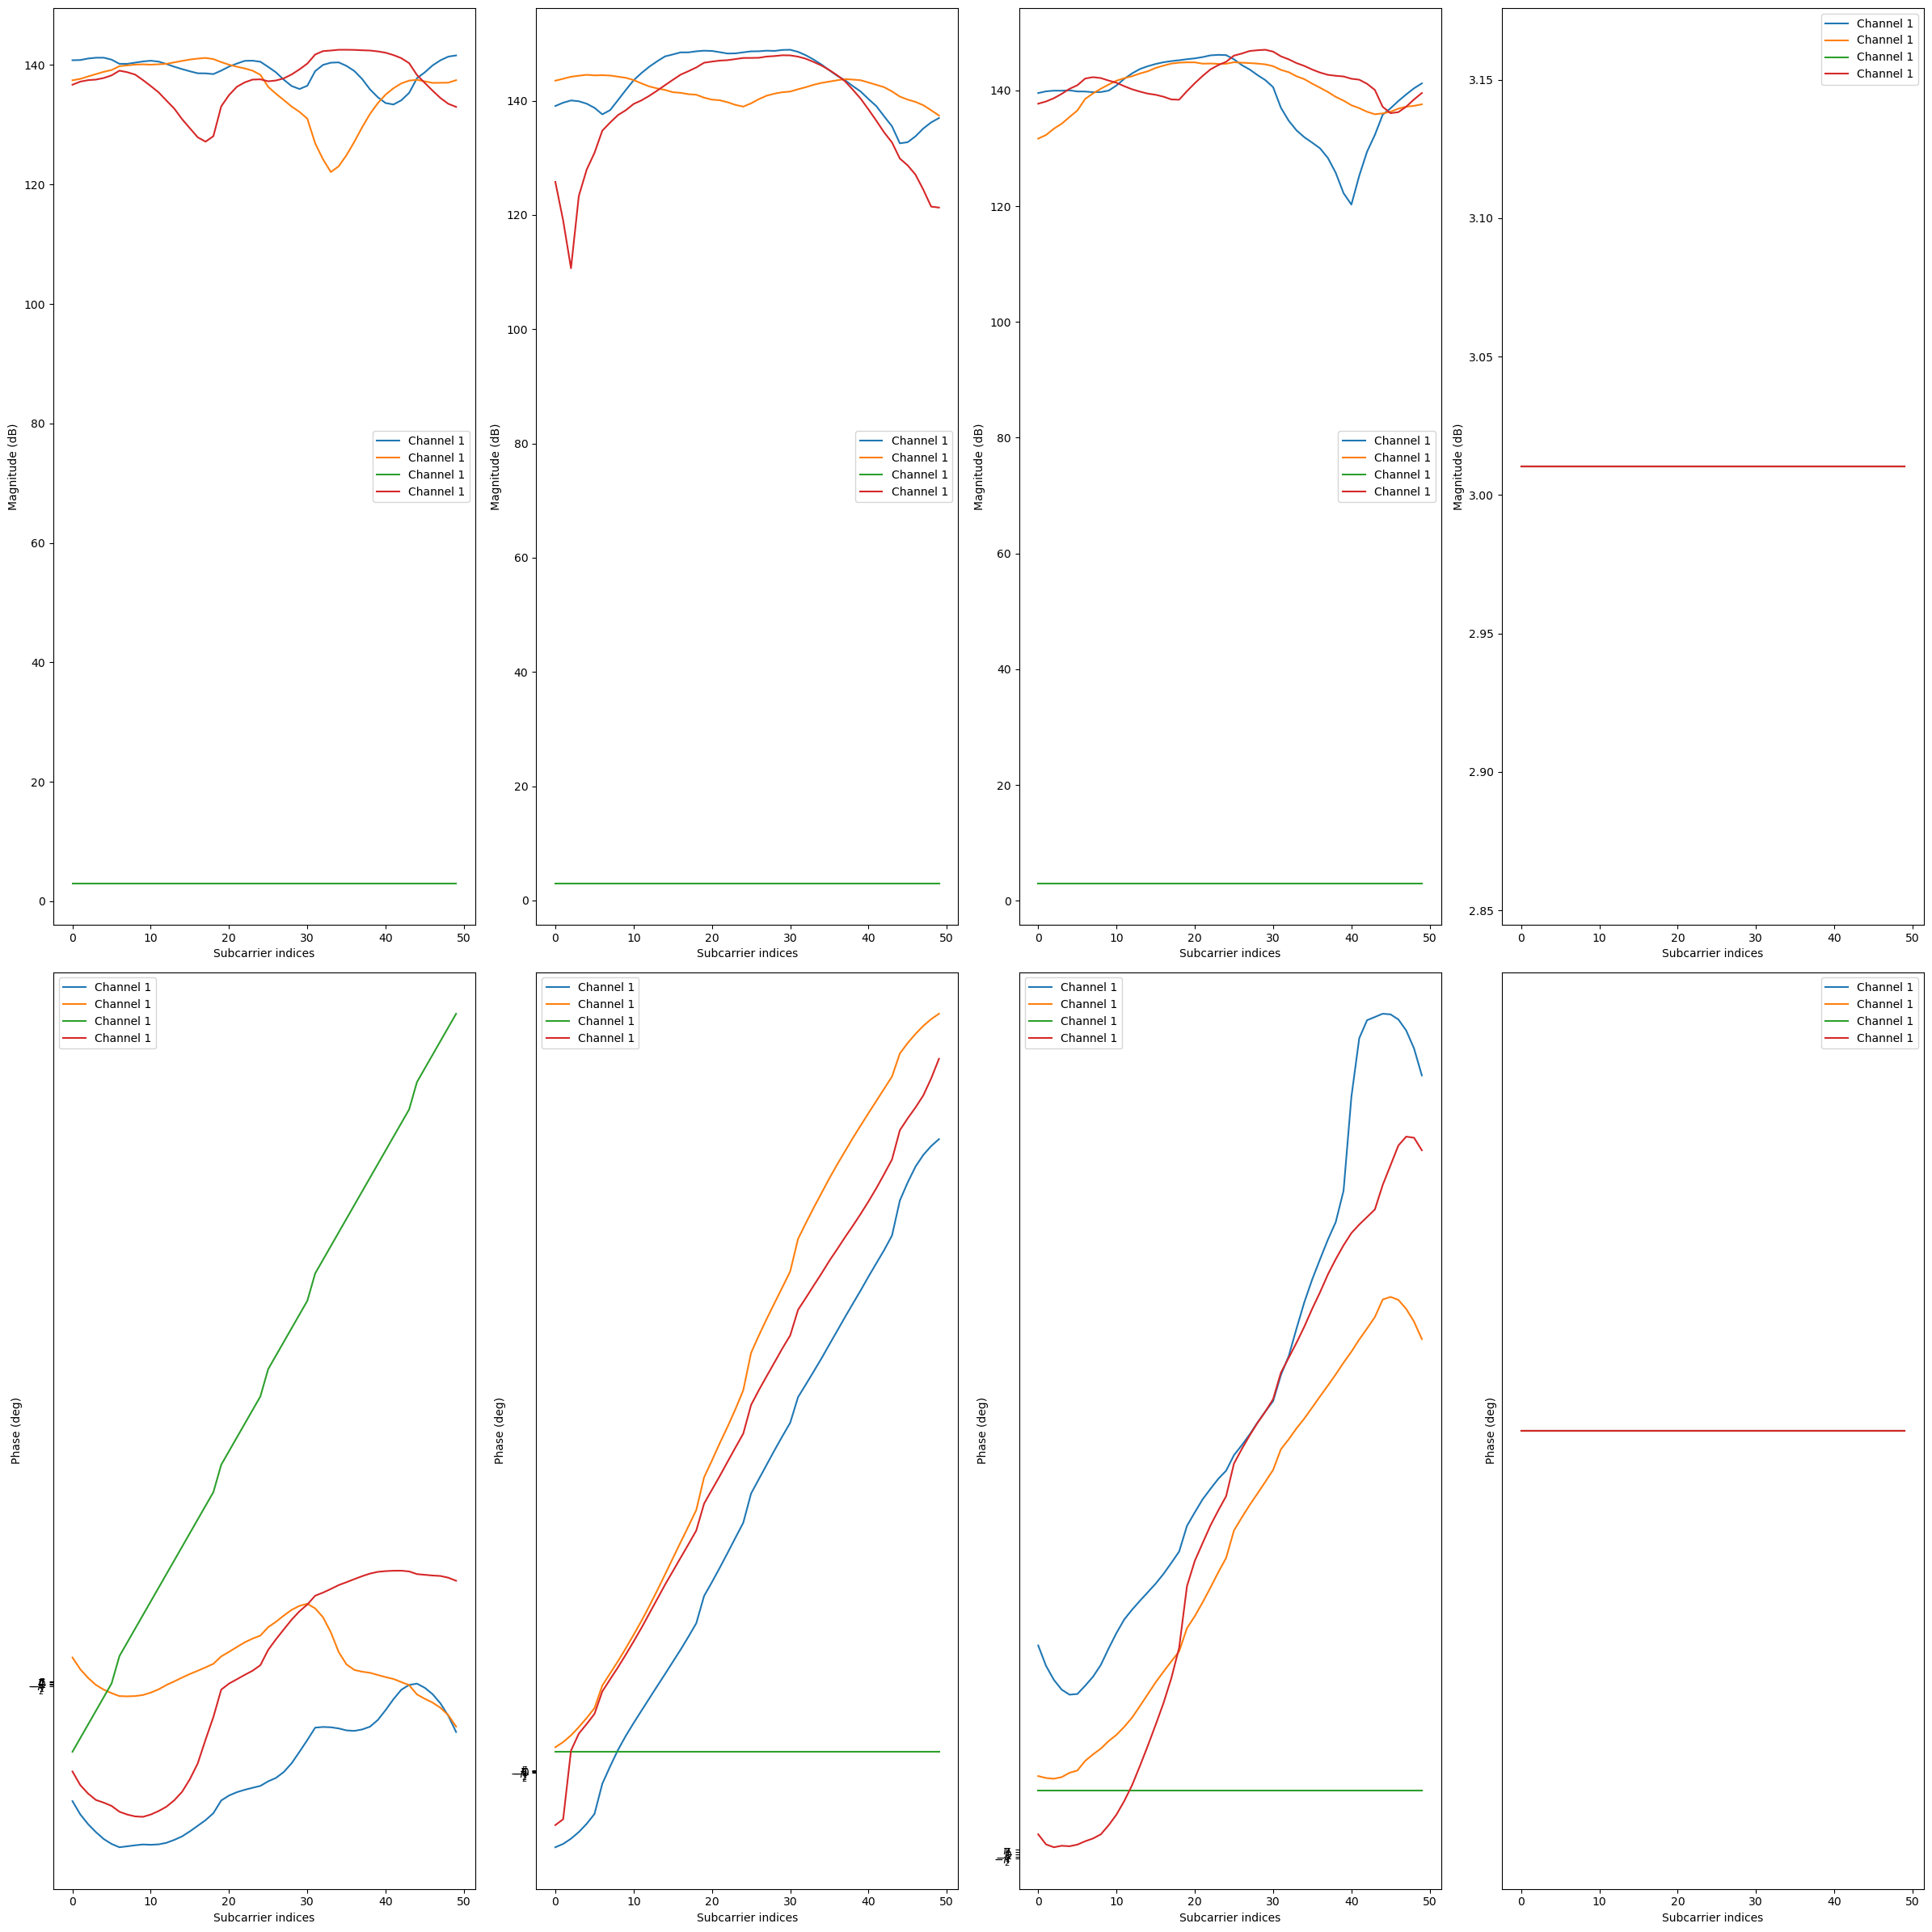

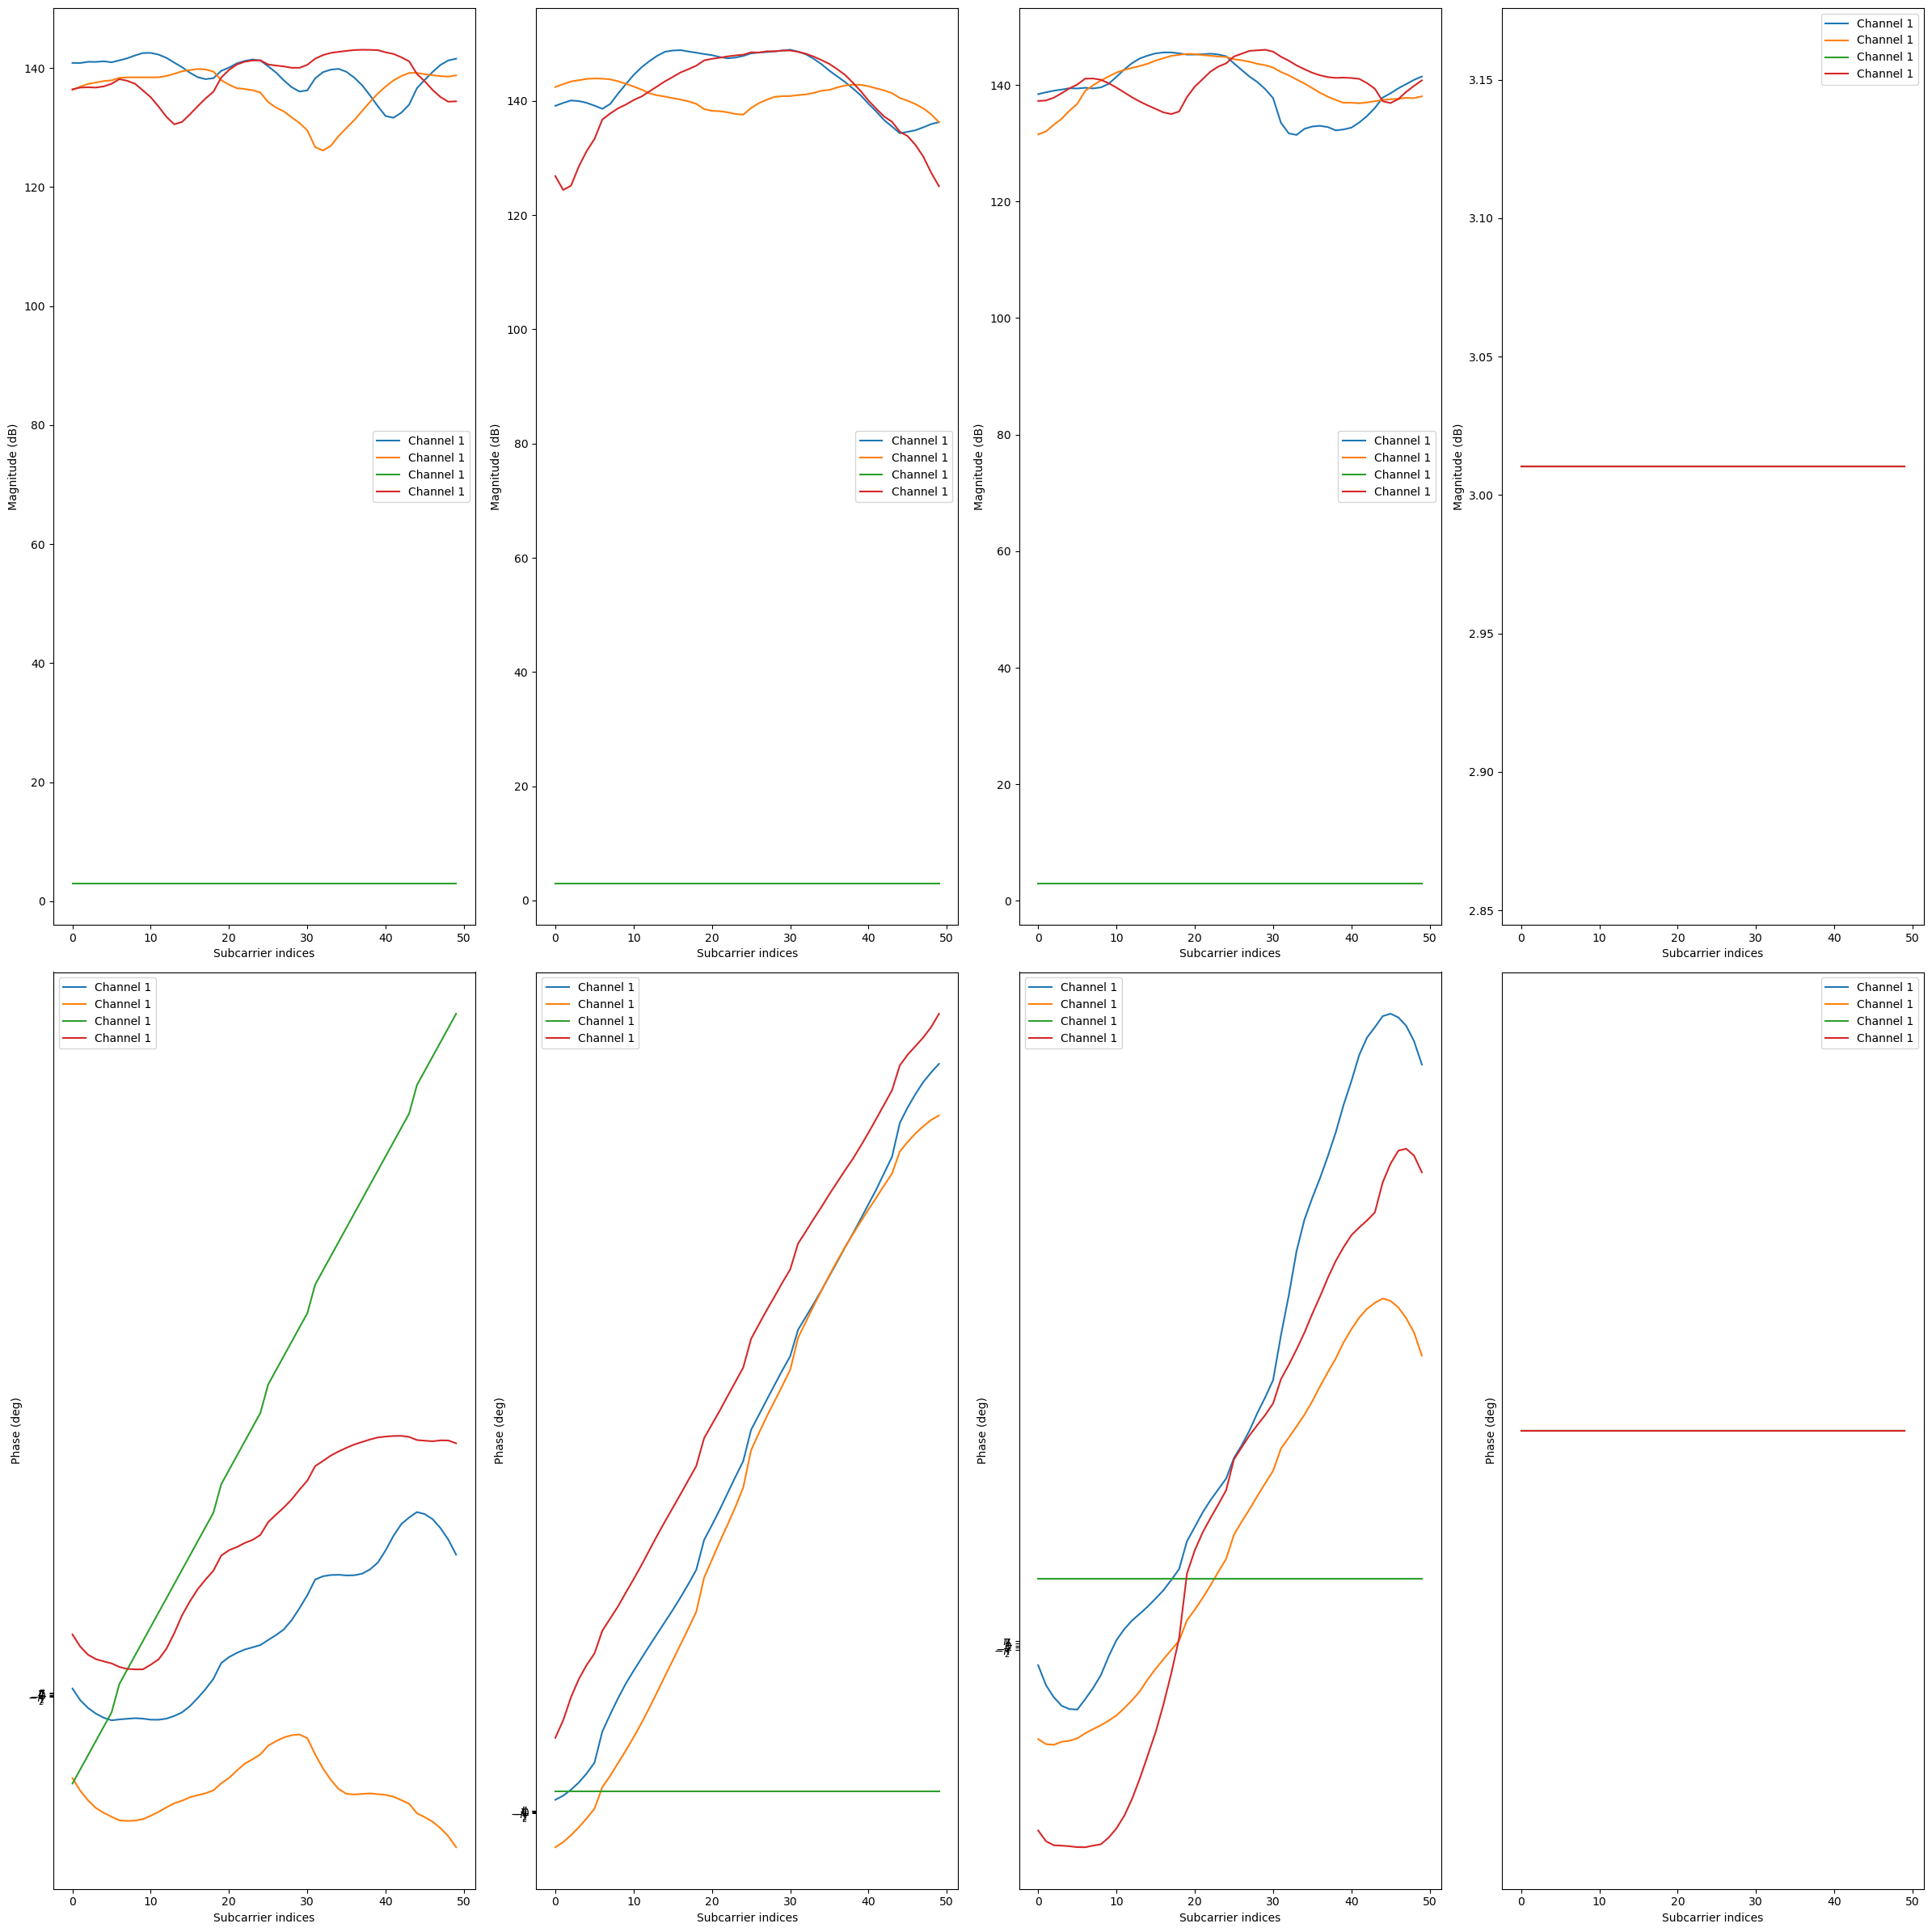

In [43]:
bag = rosbag.Bag('/home/sora/wifi_ws/rosbag_res/20 11 nlos.bag')
for topic, msg, t in bag.read_messages('/csi'):
    channel = pipeline_utils.extract_csi(msg, comp, apply_nts, valid_tx_ant)
    draw_channel_image(channel)
